In [11]:
import numpy as np
import os
import tensorflow as tf


In [23]:
a = np.array([0.01,0.02,0.44,0.05])

In [24]:
softmax = tf.keras.layers.Softmax()

In [25]:
softmax(a)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.21795425, 0.22014475, 0.33505183, 0.22684915], dtype=float32)>

In [26]:
softmax(a/2)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.23446241, 0.23563766, 0.290701  , 0.23919888], dtype=float32)>

In [27]:
softmax(softmax(a)/2)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.24595104, 0.24622056, 0.26078108, 0.24704732], dtype=float32)>

In [2]:
f = open("/home/euiseokjeong/Desktop/IMLAB/2022_ABAW_imlab/data/2022/annotation/MTL_Challenge/validation_set.txt", 'r')
valid_txt = f.readlines()

In [61]:
valid_txt[1:]

['341/00001.jpg,-0.00233333333333,0.0,7,0,0,0,0,0,0,0,0,0,0,0,0\n',
 '341/00002.jpg,-0.00233333333333,0.0276666666667,7,0,0,0,0,0,0,0,0,0,0,0,0\n',
 '341/00008.jpg,-0.00233333333333,0.062,7,0,0,0,0,1,0,0,0,0,0,0,0\n',
 '341/00066.jpg,0.07,0.041,-1,0,0,0,0,1,0,0,0,0,0,0,0\n',
 '341/00070.jpg,0.0646666666667,0.0356666666667,0,0,0,0,0,1,0,0,0,0,0,0,0\n',
 '341/00085.jpg,0.041,0.0173333333333,0,1,0,0,0,1,0,0,0,0,0,0,0\n',
 '341/00109.jpg,0.031,-0.0596666666667,0,0,0,0,0,0,0,0,0,0,0,0,0\n',
 '341/00113.jpg,0.031,-0.101,0,0,0,0,0,0,0,0,0,0,0,0,0\n',
 '341/00119.jpg,0.031,-0.0983333333333,0,0,0,0,0,0,0,0,0,0,0,0,0\n',
 '341/00130.jpg,0.031,-0.0363333333333,0,0,0,0,0,0,0,0,0,0,0,0,0\n',
 '341/00145.jpg,0.031,0.003,-1,0,0,0,0,0,0,0,0,0,0,0,0\n',
 '341/00151.jpg,0.0443333333333,0.003,0,0,0,0,0,0,0,0,0,0,0,0,0\n',
 '341/00182.jpg,0.0126666666667,0.0166666666667,-1,0,0,0,0,0,0,0,0,0,0,0,0\n',
 '341/00185.jpg,0.0126666666667,0.018,-1,0,0,0,0,0,0,0,0,0,0,0,0\n',
 '341/00195.jpg,0.0806666666667,0.06,

In [17]:
exList = [4, 10, 8, 32, 95]
values = 5.4213

In [18]:
minValue = min(exList, key=lambda x:abs(x-values))


In [19]:
minValue

4

In [71]:
image_feature_path = '/home/euiseokjeong/Desktop/IMLAB/2022_ABAW_imlab/data/2022/features/image_t(2)_s(10)'
audio_feature_path = '/home/euiseokjeong/Desktop/IMLAB/2022_ABAW_imlab/data/2022/features/audio'

softmax = tf.keras.layers.Softmax()


test_model = tf.keras.models.load_model('/home/euiseokjeong/Desktop/IMLAB/DA_ABAW/NAS/2022/result/keep/generation/2022_3_5_21_44_27(teacher_gen_0)/weight/epoch(28)model_gen_0')

have = 0
not_have = 0

for i, test_data in enumerate(valid_txt[1:]):
    image_name, image_num = test_data.split(',')[0].split('/')
    label = test_data.split(',')[1:]
    audio_name = image_name.replace('_left','').replace('_right','')
    image_num = int(image_num.replace('.jpg',''))
    if not os.path.isfile(os.path.join(image_feature_path, image_name, f"{image_num}.npy")):
        not_have += 1
        continue
    if not os.path.isfile(os.path.join(audio_feature_path, audio_name, f"{image_num}.npy")):
        not_have += 1
        continue
    va_out = list(np.array(result[1])[0])
    expr_out = [np.argmax(softmax(result[2]))]
    au_out = list(((np.array(result[3]) >= 0.5)*1)[0])
    img_feature = np.load(os.path.join(image_feature_path, image_name, f"{image_num}.npy"))
    aud_feature = np.load(os.path.join(audio_feature_path, audio_name, f"{image_num}.npy"))
    result = test_model([np.expand_dims(img_feature, axis=0), np.expand_dims(aud_feature, axis=0)])
    
    va_out = list(np.array(result[1])[0])
    expr_out = [np.argmax(softmax(result[2]))]
    au_out = list(((np.array(result[3]) >= 0.5)*1)[0])
    result_list = va_out + expr_out + au_out
#     print(result_list)
    print(image_name, image_num)`
    print('label', label)
    print('result', result_list)
    print()
    
    have += 1
print(f"{have}/{test_num}")

341 268
label ['0.0826666666667', '0.0826666666667', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.25494137, 0.1393433, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

341 331
label ['0.133', '0.027', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.18042995, 0.13400117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

341 333
label ['0.145666666667', '0.0843333333333', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.22457425, 0.11200389, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

341 358
label ['0.164', '0.129666666667', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.2823484, 0.1725672, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

341 365
label ['0.169333333333', '0.125', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.23935531, 0.16168982, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

341 392
label ['0.148333333333', '0.0833333333333', '0', '0', '0', '0', '0', '0',

341 1400
label ['0.550666666667', '0.632333333333', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.600484, 0.5809907, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

341 1403
label ['0.548', '0.612666666667', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.658852, 0.65892285, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

341 1406
label ['0.548', '0.552', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6647676, 0.6133906, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

341 1412
label ['0.572', '0.539666666667', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.62111914, 0.6533684, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

341 1413
label ['0.585', '0.583666666667', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6930043, 0.66595334, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

341 1416
label ['0.637666666667', '0.653333333333', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0

341 1803
label ['0.187666666667', '0.198333333333', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.16712233, 0.03156074, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

341 1805
label ['0.148333333333', '0.198333333333', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.17965092, 0.027919736, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

341 1888
label ['0.127666666667', '0.164', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.2441926, 0.10678328, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

341 1947
label ['0.127666666667', '0.123666666667', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.20819321, 0.053995427, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

341 1960
label ['0.112', '0.102333333333', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.17439975, 0.002440209, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

341 1973
label ['0.124666666667', '0.092', '-1', '0', '0', '0

341 2649
label ['0.422', '0.574333333333', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5634429, 0.55514747, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

341 2664
label ['0.353666666667', '0.550666666667', '4', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.61618143, 0.57626706, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

341 2677
label ['0.345666666667', '0.516333333333', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.44671214, 0.425619, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

341 2701
label ['0.356', '0.482', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.35619777, 0.37519875, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

341 2720
label ['0.356', '0.448', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3193407, 0.3298965, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]

341 2726
label ['0.348', '0.424333333333', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0',

139-14-720x480 404
label ['-0.187', '-0.124', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.5513992, -0.06247341, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 412
label ['-0.187', '-0.124', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.45002553, -0.062742464, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 420
label ['-0.187', '-0.124', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.4343307, -0.050465196, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 428
label ['-0.187', '-0.124', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.28873748, -0.034274004, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 436
label ['-0.187', '-0.124', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.33957985, -0.05088223, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 444
label ['-0.187', '-0.124', '5', '0', '0', '1'

139-14-720x480 881
label ['-0.002', '0.036', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.8646484, 0.03405935, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 889
label ['0.0', '0.03', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.81718343, 0.040939882, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 897
label ['0.0', '0.032', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.7793429, 0.052572798, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 905
label ['0.0', '0.048', '5', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.7625394, 0.11623635, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 913
label ['0.0', '0.051', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.6651576, 0.09372019, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 921
label ['0.0', '0.111', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0'

139-14-720x480 1329
label ['-0.105', '0.202', '5', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.9994773, 0.98383385, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 1337
label ['-0.104', '0.203', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.99957937, 0.9892834, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 1345
label ['-0.103', '0.195', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.99938846, 0.98761827, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 1353
label ['-0.103', '0.09', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.99951434, 0.98346895, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 1361
label ['-0.103', '0.054', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.9990899, 0.95939344, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 1369
label ['-0.103', '0.041', '5', '0', '0', '1', '1', '0'

139-14-720x480 1745
label ['-0.485', '0.58', '5', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.97082585, 0.28152525, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 1753
label ['-0.467', '0.533', '5', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.96498406, 0.23628546, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]

139-14-720x480 1761
label ['-0.466', '0.486', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.93878376, 0.31326768, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 1769
label ['-0.466', '0.457', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.8547861, 0.24406034, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]

139-14-720x480 1777
label ['-0.468', '0.417', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.606187, 0.25200143, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 1785
label ['-0.472', '0.396', '5', '0', '0', '1', '1', '1'

139-14-720x480 2201
label ['-0.536', '0.09', '5', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.52087414, 0.17638548, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 2209
label ['-0.536', '0.05', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.31843954, 0.26327658, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 2217
label ['-0.536', '0.062', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.2916135, 0.14586112, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 2225
label ['-0.536', '0.067', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.27043524, 0.31929454, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

139-14-720x480 2233
label ['-0.536', '0.004', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.37008685, 0.2935351, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

139-14-720x480 2241
label ['-0.536', '-0.006', '5', '0', '0', '1', '1', '0

139-14-720x480 2577
label ['-0.235', '0.188', '5', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.9919871, 0.8939741, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 2585
label ['-0.236', '0.21', '5', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.9915516, 0.89647436, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 2593
label ['-0.235', '0.214', '5', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.9915175, 0.86798215, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 2601
label ['-0.236', '0.214', '5', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.9946681, 0.8715943, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 2609
label ['-0.235', '0.215', '5', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.99616075, 0.8382607, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 2617
label ['-0.235', '0.216', '5', '1', '0', '1', '1', '1', '1

139-14-720x480 3009
label ['-0.294', '0.24', '5', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.9828066, 0.47031218, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 3017
label ['-0.295', '0.234', '5', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.97840214, 0.42337167, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 3025
label ['-0.287', '0.192', '5', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.99120677, 0.6907757, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 3033
label ['-0.271', '0.199', '5', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9882459, 0.5731119, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 3041
label ['-0.27', '0.201', '5', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9943641, 0.7570662, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 3049
label ['-0.27', '0.203', '5', '0', '0', '1', '1', '1', '1'

139-14-720x480 3433
label ['-0.763', '0.572', '5', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.9921216, 0.623404, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 3441
label ['-0.763', '0.55', '5', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.98702174, 0.5915489, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 3449
label ['-0.764', '0.574', '5', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9956993, 0.7811654, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 3457
label ['-0.765', '0.648', '5', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.99467593, 0.86128616, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 3465
label ['-0.789', '0.914', '5', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.99775255, 0.9350583, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 3473
label ['-0.894', '1.0', '5', '0', '0', '1', '1', '1', '1',

139-14-720x480 3889
label ['-0.833', '0.63', '5', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9830084, 0.631184, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 3897
label ['-0.835', '0.632', '5', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9643064, 0.56771994, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 3905
label ['-0.836', '0.631', '5', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.90607387, 0.40073502, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 3913
label ['-0.84', '0.631', '5', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9768943, 0.5220721, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 3921
label ['-0.84', '0.572', '5', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.966825, 0.6649551, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 3929
label ['-0.838', '0.507', '5', '1', '0', '1', '1', '1', '1', '

139-14-720x480 4329
label ['-0.739', '0.456', '5', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.88915163, 0.5240893, 5, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 4337
label ['-0.739', '0.462', '5', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.83743525, 0.31440225, 5, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 4345
label ['-0.739', '0.468', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.77625984, 0.48177373, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 4353
label ['-0.74', '0.471', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.6056305, 0.28958407, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 4361
label ['-0.739', '0.475', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.5290853, 0.2145915, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 4369
label ['-0.739', '0.472', '5', '0', '0', '1', '1', '0',

139-14-720x480 4689
label ['-0.677', '0.372', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.48650628, 0.23179199, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 4697
label ['-0.678', '0.372', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.60535735, 0.25674647, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 4705
label ['-0.678', '0.372', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.40872717, 0.2268576, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

139-14-720x480 4713
label ['-0.674', '0.43', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.382015, 0.22637285, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

139-14-720x480 4721
label ['-0.691', '0.473', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.43520066, 0.2357689, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

139-14-720x480 4729
label ['-0.697', '0.477', '5', '0', '0', '1', '1', '0',

139-14-720x480 5121
label ['-0.7', '0.791', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.9961529, 0.94246924, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 5129
label ['-0.746', '0.863', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.99378884, 0.8939146, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 5137
label ['-0.781', '0.858', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.9943944, 0.964727, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 5145
label ['-0.83', '0.837', '5', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.9939449, 0.9344281, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 5153
label ['-0.84', '0.807', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9976083, 0.9851755, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 5161
label ['-0.833', '0.792', '5', '0', '0', '1', '1', '1', '0', '0

139-14-720x480 5577
label ['-0.525', '0.464', '5', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9955462, 0.9825655, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 5585
label ['-0.53', '0.465', '5', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.98095703, 0.90061814, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 5593
label ['-0.537', '0.465', '5', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9679661, 0.90038204, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 5601
label ['-0.539', '0.466', '5', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9795396, 0.9587072, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 5609
label ['-0.541', '0.466', '5', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.99324524, 0.96352524, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 5617
label ['-0.533', '0.466', '5', '1', '0', '1', '1', '1', 

139-14-720x480 6219
label ['-0.2', '0.142', '5', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9524142, 0.3323171, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

139-14-720x480 6227
label ['-0.168', '0.141', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.92898667, 0.21672451, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 6235
label ['-0.147', '0.141', '5', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.900794, 0.22067614, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 6243
label ['-0.157', '0.143', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.83442026, 0.1973443, 5, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0]

139-14-720x480 6251
label ['-0.165', '0.138', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.8237909, 0.1876874, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

139-14-720x480 6259
label ['-0.169', '0.135', '5', '0', '0', '1', '1', '0', '0'

430 243
label ['0.227', '0.432', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.41430068, 0.4277851, 7, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

430 251
label ['0.204', '0.448', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.40677807, 0.41813132, 7, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

430 252
label ['0.204', '0.342', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.40416992, 0.42400703, 7, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

430 253
label ['0.204', '0.282', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.40882042, 0.42663953, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

430 258
label ['0.227', '0.156', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.425222, 0.4536429, 7, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

430 268
label ['0.117', '0.156', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.41527098, 0.42149955, 7, 0, 

430 580
label ['0.164', '0.196', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.6412466, 0.6289861, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

430 587
label ['0.164', '0.156', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.66729623, 0.5807955, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

430 603
label ['0.204', '0.133', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.5744663, 0.48067874, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

430 644
label ['0.204', '0.172', '-1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0\n']
result [0.34963426, 0.27455565, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

430 650
label ['0.204', '0.251', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.3391675, 0.27272215, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

430 661
label ['0.188', '0.251', '-1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0\n']
result [0.43526742, 0.3544948, 4, 0, 0, 0

430 969
label ['0.59', '0.606', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5974615, 0.54085696, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

430 973
label ['0.645', '0.63', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6396802, 0.5853428, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

430 976
label ['0.653', '0.669', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.62069535, 0.56234086, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

430 986
label ['0.653', '0.685', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6717001, 0.6352982, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

430 990
label ['0.732', '0.685', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.72120255, 0.6899814, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

430 1003
label ['0.795', '0.685', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.67615473, 0.64350986, 7, 0, 0, 0, 1, 

430 1258
label ['0.014', '0.077', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.40777555, 0.3850361, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

430 1271
label ['0.062', '0.093', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.37892336, 0.3276165, 7, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

430 1286
label ['0.062', '0.093', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.2887565, 0.20881297, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

430 1314
label ['0.0', '0.117', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.2807624, 0.45480978, 7, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

430 1316
label ['0.062', '0.156', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.40504104, 0.49397352, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

430 1317
label ['0.109', '0.211', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.43232587, 0.4815343, 7, 0, 0, 

430 1578
label ['0.48', '0.211', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.53497744, 0.57929933, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

430 1592
label ['0.543', '0.093', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.5027757, 0.5658991, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

430 1593
label ['0.519', '0.093', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.49859077, 0.58740056, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

430 1594
label ['0.48', '0.093', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.5131896, 0.62389493, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

430 1608
label ['0.385', '0.054', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.7125673, 0.5746424, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

430 1609
label ['0.432', '0.054', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.7040462, 0.6022336, 7, 0, 0, 0,

346 1543
label ['0.0456666666667', '-0.184333333333', '7', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0\n']
result [0.16662422, -0.19795382, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

346 1545
label ['0.064', '-0.13', '7', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0\n']
result [0.17709176, -0.19930632, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

346 1549
label ['0.0563333333333', '-0.074', '7', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0\n']
result [0.1341622, -0.18384905, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

346 1552
label ['0.0806666666667', '-0.0173333333333', '7', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0\n']
result [0.15632854, -0.18929625, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

346 1562
label ['0.140333333333', '0.006', '7', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.17550084, -0.18817063, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

346 1570
label ['0.161666666667', '0.0233333333333', '7', '0', '0', '0

346 2748
label ['0.0773333333333', '-0.0346666666667', '7', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.15085422, -0.21774192, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

346 2764
label ['0.049', '-0.0793333333333', '7', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.1666117, -0.18977907, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

346 2770
label ['0.0753333333333', '-0.092', '7', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.14442971, -0.2842352, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

346 2772
label ['0.0753333333333', '-0.134333333333', '7', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.1519194, -0.310285, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

346 2775
label ['0.0753333333333', '-0.185666666667', '7', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.1393356, -0.25758526, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

346 2839
label ['0.0436666666667', '-0.225333333333',

346 3297
label ['0.201', '0.390333333333', '7', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.34134808, 0.04878539, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

346 3303
label ['0.214333333333', '0.433333333333', '7', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.37438846, 0.08909089, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

346 3312
label ['0.227333333333', '0.484333333333', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.38113865, 0.11456202, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

346 3318
label ['0.227333333333', '0.461333333333', '7', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0\n']
result [0.40918294, 0.15757026, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

346 3323
label ['0.227333333333', '0.435', '7', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0\n']
result [0.37689695, 0.12280246, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

346 3327
label ['0.232666666667', '0.387666666667', '7', '0', '

346 4214
label ['0.245666666667', '0.290333333333', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.17551169, -0.14365916, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

346 4258
label ['0.256333333333', '0.303666666667', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.18547073, 0.0002487898, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

346 4261
label ['0.297', '0.311333333333', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.184436, 0.084946275, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

346 4265
label ['0.361333333333', '0.316666666667', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.23540586, -0.0362942, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

346 4267
label ['0.382333333333', '0.340333333333', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.3118859, 0.15480901, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

346 4271
label ['0.414', '0.387666666667', '-1',

346 4510
label ['0.777', '0.619', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.21413845, 0.089933105, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

346 4512
label ['0.720666666667', '0.619', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.1516189, 0.11389026, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

346 4515
label ['0.690333333333', '0.619', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.29875296, 0.16028377, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

346 4517
label ['0.629666666667', '0.619', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.2541693, 0.18541756, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

346 4519
label ['0.577', '0.619', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.18049103, 0.17818181, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

346 4521
label ['0.516666666667', '0.619', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']

346 5020
label ['0.222', '0.28', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.28327295, 0.17344555, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

346 5053
label ['0.287666666667', '0.238', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.3326524, 0.042593412, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

346 5081
label ['0.272', '0.227333333333', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.33247307, 0.042931776, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

346 5086
label ['0.253666666667', '0.193333333333', '7', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0\n']
result [0.2932393, -0.0429534, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

346 5097
label ['0.250333333333', '0.143333333333', '7', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0\n']
result [0.28596613, -0.03663273, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

346 5101
label ['0.23', '0.13', '7', '0', '0', '0', '0', '1', '0', '1', '0', '1',

334 1564
label ['0.20575', '0.25175', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.35951263, 0.25800872, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

334 1569
label ['0.2255', '0.28225', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.38602468, 0.2729634, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

334 1576
label ['0.2135', '0.3325', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.4942598, 0.3864553, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

334 1580
label ['0.26475', '0.32975', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5055993, 0.37111405, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

334 1585
label ['0.324', '0.3455', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.55135244, 0.42352363, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

334 1588
label ['0.3635', '0.3725', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.57557917, 0.

334 2107
label ['0.33575', '0.3515', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5614968, 0.4472352, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

334 2121
label ['0.36075', '0.3455', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5307483, 0.43068734, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

334 2134
label ['0.39475', '0.3455', '7', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.65695375, 0.57683855, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

334 2141
label ['0.389', '0.39275', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5641115, 0.5409372, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

334 2143
label ['0.43425', '0.4085', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.60310125, 0.5664681, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

334 2152
label ['0.399', '0.48175', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.4608134, 0.48

334 2415
label ['0.25075', '0.2385', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5232945, 0.44919866, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

334 2421
label ['0.25075', '0.304', '-1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.4531995, 0.3776518, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

334 2423
label ['0.27625', '0.371', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.47664183, 0.45648336, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

334 2428
label ['0.3', '0.4105', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.44946098, 0.39348498, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

334 2442
label ['0.304', '0.40075', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.4596163, 0.40795416, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

334 2446
label ['0.28425', '0.36525', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.51491636, 

334 2917
label ['0.13075', '0.19775', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.118716724, 0.060819276, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

334 2930
label ['0.13075', '0.16425', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.06962542, -0.021721251, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

334 2937
label ['0.13075', '0.16425', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.06238434, -0.16679178, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

334 2954
label ['0.0915', '0.15825', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.06158512, -0.19394171, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

334 2970
label ['0.092', '0.126', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.047721982, -0.23176816, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

334 2983
label ['0.09775', '0.05525', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result

399 433
label ['0.211333333333', '0.393', '-1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.37360626, 0.402129, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 438
label ['0.201', '0.359333333333', '-1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [0.39108887, 0.4358989, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 441
label ['0.156', '0.328', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [0.44966254, 0.49724072, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 450
label ['0.177333333333', '0.265333333333', '-1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0\n']
result [0.4021684, 0.46234176, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 453
label ['0.177333333333', '0.229666666667', '-1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [0.36800045, 0.38452893, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 462
label ['0.148666666667', '0.248333333333', '-1', '0', '0', '0', '0', '0', '0'

399 1195
label ['0.33', '0.477', '7', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.47749966, 0.48029998, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 1206
label ['0.366333333333', '0.487666666667', '7', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.42855966, 0.41184714, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 1214
label ['0.366333333333', '0.474333333333', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.49370447, 0.43362606, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 1215
label ['0.341', '0.461', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.49507692, 0.4372521, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 1217
label ['0.304', '0.461', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.4656712, 0.40053552, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 1221
label ['0.363666666667', '0.456', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1',

399 1668
label ['0.190333333333', '0.251', '7', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.27767727, 0.3670498, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

399 1671
label ['0.212666666667', '0.203666666667', '7', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.28259438, 0.3332477, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

399 1674
label ['0.227333333333', '0.246333333333', '7', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0\n']
result [0.2934458, 0.32621297, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

399 1681
label ['0.224666666667', '0.314', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.3556708, 0.3499263, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 1685
label ['0.248333333333', '0.332333333333', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.33334383, 0.32212386, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

399 1687
label ['0.259', '0.413666666667', '-1', '0', '0', '0', '1

399 1978
label ['0.251', '0.233', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.12634213, 0.014484673, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

399 1985
label ['0.251', '0.203666666667', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.13357721, -0.02222647, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

399 1991
label ['0.245666666667', '0.190666666667', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.09006055, -0.03679567, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

399 2028
label ['0.232333333333', '0.211666666667', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.09250658, 0.031033171, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

399 2029
label ['0.232333333333', '0.245666666667', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.08532804, 0.029101986, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

399 2030
label ['0.220666666667', '0.306', '7', '0', '0', '0', '0',

399 2427
label ['0.765', '0.685', '-1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.4570662, 0.47292396, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 2429
label ['0.745333333333', '0.661', '-1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.55590796, 0.5941677, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 2431
label ['0.714', '0.624666666667', '-1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.3890451, 0.4957095, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 2438
label ['0.705666666667', '0.579666666667', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.5608035, 0.6085758, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 2440
label ['0.687333333333', '0.574333333333', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.53308845, 0.5650855, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 2451
label ['0.608666666667', '0.579666666667', '-1', '0', '0', '0', '1', '0', 

399 3010
label ['0.475666666667', '0.54', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.58426404, 0.61172724, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 3012
label ['0.487666666667', '0.558666666667', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.57433367, 0.56861544, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 3014
label ['0.483666666667', '0.558666666667', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.46224725, 0.5129608, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

399 3033
label ['0.592666666667', '0.504666666667', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.40667027, 0.46368796, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

399 3033
label ['0.592666666667', '0.504666666667', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.40667027, 0.46368796, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

399 3083
label ['0.565', '0.532333333333', '-1', '1', 

348 1084
label ['0.216666666667', '0.114333333333', '7', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.23500296, 0.1570057, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 1094
label ['0.227333333333', '0.153666666667', '7', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.23001571, 0.128112, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 1102
label ['0.227333333333', '0.198666666667', '7', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0\n']
result [0.23409283, 0.09026259, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 1105
label ['0.227333333333', '0.272666666667', '7', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0\n']
result [0.19761473, 0.082418434, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 1118
label ['0.264', '0.283', '7', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0\n']
result [0.2116212, 0.16275795, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 1130
label ['0.345666666667', '0.269333333333', '7', '0', '0',

348 1413
label ['0.79', '0.850666666667', '7', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.57110846, 0.4291024, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

348 1422
label ['0.79', '0.814', '7', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.58176947, 0.45307332, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

348 1432
label ['0.771666666667', '0.848', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6513241, 0.48945808, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

348 1436
label ['0.763666666667', '0.775666666667', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.583382, 0.4867132, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

348 1439
label ['0.774333333333', '0.713666666667', '7', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.64358145, 0.57835734, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

348 1440
label ['0.774333333333', '0.679333333333', '7', '0', '0', '0', '1', '1', '1', '

348 1788
label ['0.08', '0.377', '7', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0\n']
result [0.380871, 0.3123386, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

348 1792
label ['0.132333333333', '0.403333333333', '7', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0\n']
result [0.39841676, 0.329114, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

348 1801
label ['0.193', '0.411333333333', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.4493372, 0.2989103, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]

348 1802
label ['0.174666666667', '0.369', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.42721117, 0.26583812, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

348 1804
label ['0.190666666667', '0.427333333333', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5253236, 0.36480913, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

348 1806
label ['0.211666666667', '0.437666666667', '7', '0', '0', '0', '1', '1', '1', '1'

348 2408
label ['0.222333333333', '0.138', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.15557414, 0.046371154, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

348 2419
label ['0.186', '0.159', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.06554931, -0.038842954, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 2422
label ['0.162333333333', '0.140666666667', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.0075326716, -0.117566995, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 2430
label ['0.120333333333', '0.109', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.108054265, -0.09723148, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 2436
label ['0.0936666666667', '0.140333333333', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.09056529, -0.20133153, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 2438
label ['0.109666666667', '0.156333333333', '7', '0', '0', '0'

348 2906
label ['0.117333333333', '0.101333333333', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.117575094, -0.037036378, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 2920
label ['0.0963333333333', '0.0606666666667', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.06672054, -0.015298319, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 3006
label ['0.0963333333333', '-0.0923333333333', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.32041082, 0.18162562, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 3050
label ['0.101', '-0.136333333333', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.19804947, 0.10337436, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 3068
label ['0.174666666667', '0.0543333333333', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.12053817, 0.09747851, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 3070
label ['0.209', '0.126666666667',

348 3835
label ['0.167', '0.175666666667', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.26173583, 0.15603697, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 3843
label ['0.177333333333', '0.224333333333', '7', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0\n']
result [0.233333, 0.11902919, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 3846
label ['0.182666666667', '0.237666666667', '7', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.21850525, 0.104667604, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 3851
label ['0.203666666667', '0.293', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.1955755, 0.1315247, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 3860
label ['0.264333333333', '0.293', '7', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1\n']
result [0.22352162, 0.16033238, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

348 3864
label ['0.285', '0.319333333333', '7', '0', '0', '0', '1', '0', '0

348 4177
label ['0.529666666667', '0.824666666667', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6337247, 0.43704903, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

348 4182
label ['0.516666666667', '0.795333333333', '7', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0\n']
result [0.5948971, 0.44477212, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

348 4188
label ['0.511333333333', '0.755666666667', '7', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6062105, 0.50297594, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

348 4208
label ['0.474333333333', '0.79', '7', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.5009545, 0.45660976, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

348 4213
label ['0.537333333333', '0.800666666667', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5633727, 0.45754305, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

348 4221
label ['0.555666666667', '0.845', '7', '0', '0', '0

107 517
label ['0.693', '0.693', '7', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5639025, 0.7933651, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

107 520
label ['0.78', '0.701', '7', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6895072, 0.80071163, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

107 523
label ['0.803', '0.724', '7', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.5946321, 0.75610584, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

107 529
label ['0.835', '0.677', '7', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.65563995, 0.76400477, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

107 537
label ['0.851', '0.582', '7', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.76201653, 0.7940446, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

107 542
label ['0.851', '0.535', '7', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.73292005, 0.66278553, 7, 0, 0, 0, 1,

107 851
label ['0.401', '0.535', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.1415769, 0.67555565, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 852
label ['0.401', '0.511', '7', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.21607003, 0.65974754, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

107 855
label ['0.44', '0.424', '7', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.10928343, 0.61924964, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 857
label ['0.527', '0.417', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.02314942, 0.5392649, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

107 868
label ['0.574', '0.432', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.0045682504, 0.5146771, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

107 869
label ['0.574', '0.535', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.02666431, 0.51757216, 7, 0, 

107 1203
label ['0.567', '0.361', '7', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0\n']
result [0.13811414, 0.23217991, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

107 1207
label ['0.503', '0.361', '7', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.2353397, 0.24191867, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

107 1209
label ['0.472', '0.338', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.27874854, 0.24511859, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

107 1210
label ['0.472', '0.314', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.2769254, 0.26447392, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

107 1211
label ['0.432', '0.29', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.1956271, 0.31417722, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

107 1214
label ['0.393', '0.188', '7', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.31715283, 0.31554943, 7, 0, 

107 1547
label ['-0.095', '0.353', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.25633398, 0.40165922, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

107 1548
label ['-0.135', '0.353', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.3480261, 0.3840441, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

107 1554
label ['-0.279', '0.353', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.18022963, 0.5166645, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

107 1569
label ['-0.159', '0.417', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.22801103, 0.3576773, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

107 1571
label ['-0.119', '0.432', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.32579383, 0.3625935, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

107 1595
label ['-0.167', '0.456', '7', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.17641996, 0.37906

107 1889
label ['-0.695', '0.701', '-1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0\n']
result [-0.5537688, 0.7592758, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 1891
label ['-0.695', '0.795', '-1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0\n']
result [-0.40709913, 0.79022074, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 1893
label ['-0.695', '0.843', '-1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.4040252, 0.8395579, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 1895
label ['-0.711', '0.914', '-1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.7861246, 0.8959527, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 1897
label ['-0.719', '0.953', '-1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.6479587, 0.85805905, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 1914
label ['-0.719', '0.993', '-1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.23221362, 0.5

107 2352
label ['-0.807', '0.606', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.35291022, 0.787742, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 2353
label ['-0.807', '0.574', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.5500199, 0.89387697, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 2357
label ['-0.743', '0.582', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.7364305, 0.91815233, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 2358
label ['-0.743', '0.653', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.74214613, 0.9177741, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 2359
label ['-0.743', '0.772', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.5211959, 0.89104635, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 2360
label ['-0.855', '0.985', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.46494964, 0.904087

107 2724
label ['-0.647', '0.993', '7', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.11843975, 0.6364043, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

107 2728
label ['-0.599', '0.993', '7', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.072831705, 0.5299942, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

107 2730
label ['-0.535', '0.993', '7', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.12069408, 0.51439214, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

107 2743
label ['-0.503', '0.977', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.27159578, 0.5733483, 7, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

107 2746
label ['-0.479', '0.89', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.18015271, 0.70182854, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 2748
label ['-0.479', '0.874', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.19965947, 0.597

107 2939
label ['-0.855', '0.945', '7', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.8514181, 0.9171756, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 2942
label ['-0.855', '0.843', '7', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0\n']
result [-0.84351933, 0.91033304, 7, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

107 2943
label ['-0.831', '0.827', '7', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0\n']
result [-0.90384746, 0.9327923, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 2945
label ['-0.743', '0.795', '7', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0\n']
result [-0.88357306, 0.92943275, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 2947
label ['-0.719', '0.803', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9205133, 0.92095864, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 2950
label ['-0.639', '0.803', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.8954053, 0.93118

107 3349
label ['-0.623', '0.993', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.13637038, 0.96149457, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 3350
label ['-0.767', '0.993', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.30444995, 0.9593669, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 3351
label ['-0.871', '0.993', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.0019587325, 0.93598324, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 3357
label ['-1.0', '0.993', '7', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.34687164, 0.90106165, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 3358
label ['-0.943', '0.993', '7', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3592445, 0.92002535, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 3359
label ['-0.823', '0.993', '7', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6750409, 0.945257

107 3592
label ['-0.879', '0.922', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9808751, 0.9914663, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 3598
label ['-0.871', '0.993', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9870032, 0.9945826, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 3599
label ['-0.943', '0.993', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.96899575, 0.9875812, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 3629
label ['-0.967', '0.993', '7', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.48954326, 0.9437537, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 3631
label ['-0.903', '0.914', '7', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.5340774, 0.9436305, 7, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

107 3632
label ['-0.855', '0.906', '7', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.41069394, 0.9473595,

107 3931
label ['0.527', '0.582', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.464161, 0.455726, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

107 3933
label ['0.567', '0.614', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.39657053, 0.4278296, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

107 3935
label ['0.622', '0.638', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.34942025, 0.41831037, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

107 3939
label ['0.661', '0.645', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.1941983, 0.28087518, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

107 3947
label ['0.701', '0.574', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.21664317, 0.064152636, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

107 3951
label ['0.724', '0.503', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.41684482, 0.4495613, 7, 0, 0,

60-30-1920x1080 470
label ['0.223', '0.389', '-1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.17402874, 0.17831032, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 472
label ['0.223', '0.426', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.12489223, 0.197714, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 490
label ['0.24', '0.419', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.16861536, 0.19798309, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 493
label ['0.239', '0.355', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.18490961, 0.18412624, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 551
label ['0.264', '0.35', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.18263704, 0.23452745, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 567
label ['0.266', '0.384', '-1', '0', '0', '0', '0', '0', '0'

60-30-1920x1080 746
label ['0.408', '0.307', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.2757105, 0.33273986, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 752
label ['0.448', '0.298', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.22334123, 0.25061986, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 767
label ['0.448', '0.29', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.18644363, 0.22103374, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 776
label ['0.44', '0.29', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.26484746, 0.25724265, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 778
label ['0.365', '0.29', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.25234115, 0.22379723, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 783
label ['0.379', '0.289', '-1', '0', '0', '0', '0', '1', '1',

60-30-1920x1080 943
label ['0.298', '0.409', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.3231607, 0.25725603, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 944
label ['0.301', '0.448', '-1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3666701, 0.2877095, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 952
label ['0.352', '0.515', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.41716346, 0.3184456, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 956
label ['0.39', '0.514', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5805222, 0.49500212, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 969
label ['0.442', '0.529', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.48327896, 0.41910857, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 970
label ['0.441', '0.541', '-1', '0', '0', '0', '1', '1', '1', 

60-30-1920x1080 1107
label ['0.672', '0.616', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.6500315, 0.5542488, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1110
label ['0.597', '0.616', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.682797, 0.60386384, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1114
label ['0.569', '0.593', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.66464394, 0.5680801, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1116
label ['0.544', '0.582', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.62362754, 0.5430969, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1118
label ['0.507', '0.55', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6332373, 0.55088615, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1120
label ['0.501', '0.509', '-1', '0', '0', '0', '1', '1', '1'

60-30-1920x1080 1369
label ['0.809', '0.601', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.7624466, 0.6941764, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1370
label ['0.721', '0.597', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.78492814, 0.6917496, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1371
label ['0.674', '0.594', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.79638, 0.71039945, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1373
label ['0.575', '0.587', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.78551716, 0.6829716, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1380
label ['0.47', '0.689', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.80890137, 0.70796716, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1384
label ['0.464', '0.71', '4', '0', '0', '0', '1', '1', '1', '1'

60-30-1920x1080 1555
label ['0.475', '0.743', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.52743006, 0.47199637, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1557
label ['0.41', '0.725', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.5025683, 0.44018367, 4, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1558
label ['0.39', '0.642', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.4457619, 0.3873243, 4, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1559
label ['0.346', '0.526', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.43304768, 0.36974528, 4, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1560
label ['0.313', '0.432', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.3698646, 0.309485, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1562
label ['0.253', '0.375', '-1', '0', '0', '0', '0', '0', '

60-30-1920x1080 1798
label ['0.467', '0.725', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.48995844, 0.40289238, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1799
label ['0.452', '0.717', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.48250395, 0.40715778, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1801
label ['0.414', '0.694', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.51601595, 0.4236313, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1803
label ['0.396', '0.586', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5408178, 0.46333942, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1807
label ['0.434', '0.55', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5970678, 0.4913146, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 1808
label ['0.512', '0.555', '4', '0', '0', '0', '1', '1', '1',

60-30-1920x1080 1967
label ['0.19', '0.197', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.2585055, 0.25336418, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 1973
label ['0.156', '0.222', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.25019386, 0.23996924, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 1976
label ['0.101', '0.263', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.27713314, 0.2686471, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 1978
label ['0.283', '0.259', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.17962293, 0.30247325, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 1987
label ['0.315', '0.244', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.17237735, 0.2799, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 1990
label ['0.315', '0.187', '-1', '0', '0', '0', '0', '1', 

60-30-1920x1080 2146
label ['0.194', '0.207', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.021905476, 0.30962595, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 2149
label ['0.244', '0.238', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.07879563, 0.3272069, 5, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 2159
label ['0.165', '0.28', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.08844551, 0.30213735, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 2194
label ['0.193', '0.241', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.18417045, 0.29215845, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 2201
label ['0.186', '0.184', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.27699268, 0.3390419, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 2208
label ['0.191', '0.122', '-1', '0', '0', '0', '0'

60-30-1920x1080 2315
label ['0.177', '0.351', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6035321, 0.52713144, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 2317
label ['0.177', '0.387', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5567059, 0.46811706, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 2319
label ['0.149', '0.449', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.60842216, 0.53181595, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 2320
label ['0.438', '0.506', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.62607473, 0.5468857, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 2322
label ['0.537', '0.561', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5449779, 0.47357517, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 2324
label ['0.529', '0.642', '-1', '0', '0', '0', '0', '0

60-30-1920x1080 2518
label ['0.399', '0.402', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3088931, 0.3528744, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 2519
label ['0.387', '0.357', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.2561741, 0.3207119, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 2520
label ['0.335', '0.308', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.18026242, 0.27827066, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 2521
label ['0.281', '0.263', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.17347187, 0.25423107, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 2523
label ['0.211', '0.229', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.17368524, 0.2555783, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 2527
label ['0.134', '0.246', '-1', '0', '0', '0', '0', '0'

60-30-1920x1080 2700
label ['0.021', '0.29', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.30928057, 0.2545266, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 2709
label ['0.063', '0.274', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.2707528, 0.2907642, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 2714
label ['0.083', '0.291', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.17233102, 0.1890118, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 2715
label ['0.155', '0.291', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.22872081, 0.24112827, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 2717
label ['0.235', '0.306', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.25230652, 0.29121676, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 2719
label ['0.254', '0.345', '-1', '0', '0', '0', '0', '1'

60-30-1920x1080 2826
label ['0.684', '0.655', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.3593036, 0.34816432, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 2827
label ['0.674', '0.604', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.3924094, 0.37327135, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 2828
label ['0.664', '0.566', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.35630202, 0.36859664, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 2829
label ['0.655', '0.498', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.32507345, 0.34712523, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 2831
label ['0.607', '0.413', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.36990368, 0.4058712, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 2837
label ['0.642', '0.243', '4', '0', '0', '0', '1', '1', '1

60-30-1920x1080 3020
label ['0.272', '0.31', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.1259599, 0.17929956, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 3023
label ['0.24', '0.303', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.07406578, 0.18162933, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 3027
label ['0.193', '0.279', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.07826001, 0.14875314, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 3031
label ['0.175', '0.233', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.17179763, 0.23852687, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 3046
label ['0.163', '0.248', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.16391435, 0.15507263, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 3054
label ['0.207', '0.261', '-1', '0', '0', '0', '1', '

60-30-1920x1080 3119
label ['1.0', '0.853', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.71761745, 0.65769196, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3121
label ['1.0', '0.906', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.66958475, 0.6406881, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3126
label ['0.987', '0.975', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.71507895, 0.6352125, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3129
label ['0.878', '0.997', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.66928303, 0.6072673, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3154
label ['0.935', '0.869', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.53743625, 0.5580486, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3155
label ['0.969', '0.648', '4', '0', '0', '0', '1', '1', '1', '1

60-30-1920x1080 3356
label ['0.415', '0.454', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.1959012, 0.31045622, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 3359
label ['0.366', '0.485', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.18213539, 0.23172672, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 3363
label ['0.362', '0.48', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.30563357, 0.2907668, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 3367
label ['0.334', '0.48', '-1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.32190835, 0.35657373, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3371
label ['0.285', '0.471', '-1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3193205, 0.28472283, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 3372
label ['0.289', '0.434', '-1', '0', '0', '0', '0', '1'

60-30-1920x1080 3475
label ['0.688', '0.404', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.7987102, 0.7249253, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3476
label ['0.775', '0.43', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.79669994, 0.72155446, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3477
label ['0.914', '0.501', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.80802107, 0.72553945, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3478
label ['0.943', '0.633', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.8044579, 0.73819876, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3491
label ['0.927', '0.8', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.7849099, 0.69117326, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3492
label ['0.927', '0.847', '4', '0', '0', '0', '1', '1', '1', '

60-30-1920x1080 3655
label ['0.021', '0.211', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.21301046, 0.30033216, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 3656
label ['0.206', '0.221', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.27128834, 0.34316224, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 3665
label ['0.299', '0.253', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.16520062, 0.24574609, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 3666
label ['0.204', '0.252', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.1944082, 0.29686698, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 3667
label ['0.177', '0.228', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.20530759, 0.30401602, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 3668
label ['0.175', '0.286', '-1', '0', '0', '0', '0',

60-30-1920x1080 3841
label ['0.285', '0.922', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.34800255, 0.42933983, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3842
label ['0.287', '0.945', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.37630168, 0.43607628, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3849
label ['0.333', '1.0', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.33092874, 0.4482569, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3850
label ['0.334', '0.89', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.28559613, 0.37640563, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3852
label ['0.335', '0.761', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.3459892, 0.3878933, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 3854
label ['0.338', '0.648', '-1', '0', '0', '0', '1', '1',

60-30-1920x1080 3954
label ['0.139', '0.188', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.7931593, 0.67738456, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3956
label ['0.151', '0.155', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.75325584, 0.62804997, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3960
label ['0.114', '0.198', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.8233336, 0.7181971, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3963
label ['0.209', '0.2', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.80400634, 0.70461196, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3964
label ['0.252', '0.2', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.76749283, 0.6812551, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 3965
label ['0.389', '0.177', '-1', '0', '0', '0', '0', '1', '

60-30-1920x1080 4208
label ['0.304', '0.084', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.2615251, 0.28783602, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 4230
label ['0.23', '0.137', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3537836, 0.3497299, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 4233
label ['0.213', '0.124', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3249143, 0.35417804, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 4236
label ['0.161', '0.124', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.35710248, 0.32344908, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 4239
label ['0.159', '0.132', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.30460525, 0.30366942, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 4242
label ['0.156', '0.079', '-1', '0', '0', '0', '1', '1'

60-30-1920x1080 4422
label ['0.21', '0.167', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.28427765, 0.33352795, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 4429
label ['0.167', '0.266', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.38972172, 0.36877456, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 4436
label ['0.141', '0.267', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.35170466, 0.38036597, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 4439
label ['0.152', '0.251', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.38163024, 0.3845469, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

60-30-1920x1080 4441
label ['0.16', '0.163', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.33670875, 0.33634716, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

60-30-1920x1080 4447
label ['0.171', '0.135', '-1', '0', '0', '0', '1', '0', '

39-25-424x240 921
label ['-0.564', '0.078', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.37676418, 0.15885589, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 929
label ['-0.541', '0.131', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.62163013, 0.24683353, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 937
label ['-0.534', '0.132', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.52017266, 0.19090404, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 945
label ['-0.537', '0.124', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.6258384, 0.27711207, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]

39-25-424x240 953
label ['-0.539', '0.107', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.83942395, 0.46095204, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]

39-25-424x240 961
label ['-0.543', '0.107', '5', '0', '0', '1', '1', '0', '0', '0

39-25-424x240 1377
label ['-0.878', '0.584', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.805357, 0.4428323, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 1385
label ['-0.747', '0.569', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.67969984, 0.36511445, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 1393
label ['-0.73', '0.388', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.5502165, 0.30544502, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 1401
label ['-0.653', '0.238', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.3947134, 0.2189924, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 1409
label ['-0.676', '0.14', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.39410663, 0.24984352, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 1417
label ['-0.724', '0.113', '5', '0', '0', '1', '1', '0', '0', '0'

39-25-424x240 1825
label ['-0.769', '0.644', '5', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9733372, 0.74480504, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]

39-25-424x240 1833
label ['-0.769', '0.644', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.96398157, 0.78208333, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]

39-25-424x240 1841
label ['-0.761', '0.642', '5', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [-0.95660746, 0.7654704, 5, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]

39-25-424x240 1849
label ['-0.732', '0.642', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.96423167, 0.78165007, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]

39-25-424x240 1857
label ['-0.737', '0.655', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9816706, 0.8415709, 5, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]

39-25-424x240 1865
label ['-0.738', '0.664', '5', '0', '0', '1', '1', '0', '0',

39-25-424x240 2281
label ['-0.783', '0.693', '5', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.9606065, 0.9223201, 5, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]

39-25-424x240 2289
label ['-0.844', '0.818', '5', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9575425, 0.9194644, 5, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]

39-25-424x240 2297
label ['-0.902', '0.786', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.9628516, 0.91613823, 5, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]

39-25-424x240 2305
label ['-0.779', '0.585', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9710818, 0.9417056, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

39-25-424x240 2313
label ['-0.843', '0.62', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.98662126, 0.9731289, 5, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]

39-25-424x240 2321
label ['-0.843', '0.652', '5', '0', '0', '1', '1', '0', '0', '0',

39-25-424x240 2713
label ['-1.0', '1.0', '5', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.9351645, 0.8574181, 5, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]

39-25-424x240 2721
label ['-1.0', '1.0', '5', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [-0.9325737, 0.802355, 5, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]

39-25-424x240 2729
label ['-1.0', '1.0', '5', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.92446125, 0.7228774, 5, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]

39-25-424x240 2817
label ['-0.692', '0.703', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.74705994, 0.5811981, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 2825
label ['-0.638', '0.59', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.47645447, 0.46812397, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 2833
label ['-0.778', '0.522', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', 

39-25-424x240 3217
label ['-0.279', '0.232', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.34449598, 0.4000655, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 3225
label ['-0.259', '0.245', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.1711633, 0.37260526, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 3233
label ['-0.271', '0.25', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.4817881, 0.34592566, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 3241
label ['-0.271', '0.254', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.37140098, 0.29852328, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 3249
label ['-0.27', '0.258', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.39899188, 0.3319423, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 3257
label ['-0.277', '0.259', '5', '0', '0', '1', '1', '0', '0', '

39-25-424x240 3665
label ['-0.577', '0.399', '5', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0\n']
result [-0.8286442, 0.5688227, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 3673
label ['-0.577', '0.383', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.6965995, 0.44369996, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 3681
label ['-0.577', '0.396', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.84441406, 0.6010814, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 3689
label ['-0.578', '0.407', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.90108067, 0.6212891, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 3697
label ['-0.577', '0.539', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.91666836, 0.71079946, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]

39-25-424x240 3705
label ['-0.577', '0.537', '5', '0', '0', '1', '1', '1', '0', 

39-25-424x240 4113
label ['-0.598', '0.342', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.49856317, 0.38544568, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 4121
label ['-0.552', '0.381', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.21489796, 0.35398227, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]

39-25-424x240 4129
label ['-0.617', '0.4', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.32446352, 0.36871633, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 4137
label ['-0.605', '0.323', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.034977954, 0.21669053, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 4145
label ['-0.58', '0.261', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.03045783, 0.30894446, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

39-25-424x240 4153
label ['-0.545', '0.381', '5', '0', '0', '1', '1', '1', '0

117-25-1920x1080 318
label ['-0.094', '0.415', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.34624922, 0.36438686, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 319
label ['-0.166', '0.454', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.31003302, 0.3716317, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 320
label ['-0.229', '0.477', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.32702076, 0.33925334, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 321
label ['-0.26', '0.505', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.2414384, 0.3143063, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 324
label ['-0.351', '0.536', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1\n']
result [0.24756429, 0.30037782, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 331
label ['-0.352', '0.576', '-1', '0', '0', '0', '

117-25-1920x1080 544
label ['0.332', '0.328', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.23839377, 0.20028582, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 580
label ['0.25', '0.332', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.20374428, 0.2153052, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 581
label ['0.351', '0.408', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.2656805, 0.25421777, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 583
label ['0.368', '0.446', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.26660407, 0.25543234, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 585
label ['0.372', '0.538', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.26531845, 0.2755044, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 588
label ['0.358', '0.605', '4', '0', '0', '0', '1', '0', '0'

117-25-1920x1080 861
label ['-0.362', '0.353', '-1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5445548, 0.43031147, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 865
label ['-0.35', '0.317', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.55104744, 0.41232425, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 870
label ['-0.357', '0.325', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6375043, 0.48014075, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 872
label ['-0.361', '0.366', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.5486909, 0.41337252, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 873
label ['-0.361', '0.288', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.5358216, 0.39525327, 4, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 875
label ['-0.361', '0.441', '-1', '0', '0', '0', '1

117-25-1920x1080 1150
label ['-0.649', '0.723', '-1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.05191925, 0.34561473, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 1155
label ['-0.65', '0.724', '-1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [-0.12507199, 0.37629995, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

117-25-1920x1080 1156
label ['-0.686', '0.728', '-1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.0035003556, 0.32016873, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

117-25-1920x1080 1158
label ['-0.745', '0.743', '-1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.021513125, 0.34411672, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]

117-25-1920x1080 1162
label ['-0.818', '0.742', '-1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.03779193, 0.35857165, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

117-25-1920x1080 1164
label ['-0.849', '0.75', '-1', '0'

117-25-1920x1080 1408
label ['0.366', '0.374', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6125708, 0.42104197, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 1429
label ['0.428', '0.392', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.54215884, 0.3845474, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 1439
label ['0.453', '0.402', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.57347226, 0.3910609, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 1447
label ['0.494', '0.382', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.5950817, 0.4039103, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 1449
label ['0.492', '0.347', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.566449, 0.38799796, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 1451
label ['0.476', '0.276', '4', '0', '0', '0', '1', '1', 

117-25-1920x1080 2080
label ['0.265', '0.176', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.19366702, 0.20751205, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 2084
label ['0.122', '0.15', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.19930425, 0.2345458, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 2090
label ['0.137', '0.004', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.19096169, 0.225348, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 2120
label ['0.147', '0.084', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.39025548, 0.31836662, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 2123
label ['0.18', '0.083', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.33481842, 0.28093663, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 2132
label ['0.167', '0.061', '4', '0', '0', '0', '1', '1'

117-25-1920x1080 2710
label ['0.27', '0.314', '4', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.34776005, 0.2842501, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 2715
label ['0.282', '0.33', '4', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.38991222, 0.30589002, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 2737
label ['0.273', '0.347', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.38692436, 0.31739715, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 2752
label ['0.273', '0.323', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.31776235, 0.26501667, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

117-25-1920x1080 2828
label ['0.283', '0.349', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.5101863, 0.39250022, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 2846
label ['0.268', '0.163', '4', '0', '0', '0', '1', '1

117-25-1920x1080 3042
label ['0.21', '0.221', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.25910157, 0.32693067, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 3044
label ['0.212', '0.358', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.28337884, 0.36541307, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 3062
label ['0.217', '0.348', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.13786028, 0.27142733, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 3067
label ['0.227', '0.259', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.13800704, 0.33384794, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 3070
label ['0.232', '0.2', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.072471105, 0.28488103, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 3072
label ['0.232', '0.22', '4', '0', '0', '0', '1', '

117-25-1920x1080 3334
label ['0.179', '0.21', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.4087467, 0.34404963, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 3335
label ['0.179', '0.174', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.43005258, 0.3492302, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 3351
label ['0.173', '0.268', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.49056268, 0.36146554, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 3373
label ['0.178', '0.266', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.54976255, 0.41126412, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 3386
label ['0.193', '0.186', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.42357168, 0.28795263, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 3392
label ['0.192', '0.183', '4', '0', '0', '0', '1', '

117-25-1920x1080 3760
label ['0.221', '0.18', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.3131125, 0.22138591, 4, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 3763
label ['0.245', '0.193', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.32090122, 0.1747082, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 3767
label ['0.27', '0.244', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.36145687, 0.22486468, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 3776
label ['0.259', '0.312', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.2881316, 0.19923554, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 3785
label ['0.212', '0.325', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.27653006, 0.21752264, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

117-25-1920x1080 3799
label ['0.188', '0.297', '4', '0', '0', '0', '1', '1'

46-30-484x360_left 459
label ['0.265', '0.164', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.5478637, 0.5459068, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

46-30-484x360_left 461
label ['0.298', '0.243', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.46135938, 0.4738407, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

46-30-484x360_left 477
label ['0.322', '0.298', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.609207, 0.579902, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

46-30-484x360_left 491
label ['0.338', '0.298', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.78062093, 0.69350857, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

46-30-484x360_left 497
label ['0.338', '0.243', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.73345643, 0.652755, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

46-30-484x360_left 499
label ['0.282', '0.243', '-1', '0', '0', '0', 

46-30-484x360_left 706
label ['0.606', '0.385', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.5654022, 0.39471263, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]

46-30-484x360_left 709
label ['0.48', '0.385', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.5386508, 0.38247994, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

46-30-484x360_left 716
label ['0.361', '0.385', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.4958842, 0.33928466, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

46-30-484x360_left 717
label ['0.338', '0.361', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.4727516, 0.3268123, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

46-30-484x360_left 719
label ['0.322', '0.282', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.49523106, 0.33890906, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

46-30-484x360_left 724
label ['0.282', '0.243', '-1', '0', '0', '0

46-30-484x360_left 1259
label ['0.464', '0.18', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.62962455, 0.4568694, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

46-30-484x360_left 1264
label ['0.401', '0.18', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.7331125, 0.54664004, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

46-30-484x360_left 1270
label ['0.379', '0.14', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.7664418, 0.5633019, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

46-30-484x360_left 1274
label ['0.361', '0.038', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.8051747, 0.62376493, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

46-30-484x360_left 1277
label ['0.338', '0.038', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.76320523, 0.573262, 4, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

46-30-484x360_left 1283
label ['0.298', '0.038', '4', '0', '0', '0'

46-30-484x360_left 1460
label ['0.606', '0.606', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.75986785, 0.55145085, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

46-30-484x360_left 1463
label ['0.559', '0.559', '6', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.80032974, 0.58534, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

46-30-484x360_left 1469
label ['0.559', '0.543', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.8121606, 0.6099594, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

46-30-484x360_left 1475
label ['0.622', '0.543', '6', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.7771119, 0.5776431, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

46-30-484x360_left 1481
label ['0.661', '0.519', '6', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.80759984, 0.6265957, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

46-30-484x360_left 1487
label ['0.685', '0.503', '6', '1', '1', '0',

46-30-484x360_left 1705
label ['0.424', '0.401', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [0.055240788, 0.23164496, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

46-30-484x360_left 1708
label ['0.464', '0.385', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [-0.0031211087, 0.25376335, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

46-30-484x360_left 1711
label ['0.515', '0.385', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [-0.0069401, 0.27371693, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

46-30-484x360_left 1720
label ['0.537', '0.338', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [-0.046865575, 0.2296155, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

46-30-484x360_left 1723
label ['0.29', '0.432', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [-0.02250685, 0.267077, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

46-30-484x360_left 1726
label ['0.0', '0.582', '1', 

46-30-484x360_left 1896
label ['0.022', '0.74', '-1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0\n']
result [0.67488486, 0.56765366, 6, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

46-30-484x360_left 1898
label ['0.14', '0.752', '-1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0\n']
result [0.7354525, 0.6767168, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

46-30-484x360_left 1901
label ['0.367', '0.764', '-1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0\n']
result [0.68192226, 0.56659836, 6, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

46-30-484x360_left 1909
label ['0.424', '0.803', '-1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0\n']
result [0.5968867, 0.5486104, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

46-30-484x360_left 1915
label ['0.537', '0.803', '-1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0\n']
result [0.55230916, 0.54702336, 6, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

46-30-484x360_left 1918
label ['0.543', '0.803', '-1', '0', '

46-30-484x360_left 2089
label ['-0.606', '0.752', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0\n']
result [0.59651315, 0.6205344, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

46-30-484x360_left 2093
label ['-0.606', '0.685', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0\n']
result [0.61810225, 0.59569764, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

46-30-484x360_left 2097
label ['-0.566', '0.645', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [0.62037903, 0.63257766, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

46-30-484x360_left 2101
label ['-0.566', '0.606', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0\n']
result [0.5770565, 0.4940043, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

46-30-484x360_left 2109
label ['-0.511', '0.543', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0\n']
result [0.4127053, 0.33322245, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]

46-30-484x360_left 2117
label ['-0.487', '0.543', '1', '0',

46-30-484x360_left 2434
label ['-0.55', '0.464', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.48600763, 0.32322687, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

46-30-484x360_left 2435
label ['-0.465', '0.436', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.5165244, 0.36350793, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

46-30-484x360_left 2437
label ['-0.368', '0.385', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.7000707, 0.52768624, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

46-30-484x360_left 2451
label ['-0.147', '0.48', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0\n']
result [0.74627376, 0.5803917, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

46-30-484x360_left 2455
label ['-0.147', '0.543', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0\n']
result [0.724405, 0.5889613, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

46-30-484x360_left 2463
label ['0.095', '0.559', '-1', '0', 

17-24-1920x1080 644
label ['0.122', '0.135', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.028906003, -0.059834514, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 647
label ['0.12', '0.032', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.027036073, 0.002894736, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 649
label ['0.076', '0.051', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.052519653, 0.124118805, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 660
label ['0.152', '0.087', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.024963778, 0.014712029, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 702
label ['-0.184', '0.097', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.0070879944, -0.05349333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

17-24-1920x1080 703
label ['-0.052', '0.098', '0', '0', '0', '1',

17-24-1920x1080 902
label ['0.119', '0.083', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.046743203, 0.10525265, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

17-24-1920x1080 907
label ['0.036', '0.086', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.17081952, 0.08550715, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

17-24-1920x1080 912
label ['0.101', '0.092', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.08622707, 0.014044732, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

17-24-1920x1080 917
label ['0.18', '0.094', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.1569195, 0.05435087, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

17-24-1920x1080 974
label ['0.205', '0.108', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.11925442, 0.06845476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

17-24-1920x1080 1033
label ['0.199', '0.113', '0', '0', '0', '0', '0', '0'

17-24-1920x1080 1547
label ['0.109', '0.169', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.24249667, 0.260393, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 1557
label ['0.127', '0.202', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.37147632, 0.24943586, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 1580
label ['0.127', '0.23', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.36761022, 0.17888029, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 1583
label ['0.138', '0.269', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.3379396, 0.18345544, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 1605
label ['0.144', '0.295', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.31821492, 0.14028366, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

17-24-1920x1080 1608
label ['0.145', '0.34', '-1', '0', '0', '0', '0',

17-24-1920x1080 1829
label ['0.11', '0.141', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.10152778, 0.34499183, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 1836
label ['0.126', '0.143', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.0347427, 0.15386812, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 1838
label ['-0.036', '0.271', '-1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.052292794, 0.284398, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 1838
label ['-0.036', '0.271', '-1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.052292794, 0.284398, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 1841
label ['-0.131', '0.402', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.023606941, 0.30941656, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 1842
label ['-0.2', '0.387', '-1', '0', '0', '0', '0', 

17-24-1920x1080 2660
label ['0.104', '0.152', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.00660302, 0.016858097, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

17-24-1920x1080 2668
label ['0.105', '0.077', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.07164468, 0.033928774, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

17-24-1920x1080 2673
label ['0.105', '0.108', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.08113292, 0.038417496, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 2693
label ['0.105', '0.134', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.1416144, 0.063614845, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 2697
label ['0.107', '0.067', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.06761445, 0.06308807, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 2707
label ['0.027', '0.118', '0', '0', '0', '0', '0', '

17-24-1920x1080 3338
label ['0.118', '0.261', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.061802365, 0.09147212, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 3346
label ['0.123', '0.274', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.029713912, 0.04147598, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 3347
label ['0.122', '0.248', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.06826668, 0.10722945, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 3349
label ['0.124', '0.18', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.05897167, 0.08448229, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 3351
label ['0.124', '0.165', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.062460154, 0.058243804, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 3353
label ['0.124', '0.109', '0', '0', '0', '0', '0'

17-24-1920x1080 3798
label ['0.144', '0.011', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.048977282, 0.29305133, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 3806
label ['0.116', '0.011', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.059146803, 0.24447186, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 3844
label ['0.131', '0.025', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.071702614, 0.17526238, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

17-24-1920x1080 3850
label ['0.137', '0.078', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.041726664, 0.14423877, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

17-24-1920x1080 3855
label ['0.16', '0.106', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.025716467, 0.17994061, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

17-24-1920x1080 3885
label ['0.168', '0.161', '0', '0', '0', '0', '0', 

17-24-1920x1080 4724
label ['0.161', '0.245', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.0034986588, 0.077114925, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 4738
label ['0.161', '0.199', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.012225022, 0.0139700165, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 4748
label ['0.16', '0.163', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.007096305, -0.05385299, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

17-24-1920x1080 4764
label ['-0.095', '0.186', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.11027184, 0.15820137, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

17-24-1920x1080 4773
label ['0.028', '0.157', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.009007156, 0.2522005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 4786
label ['0.062', '0.148', '0', '0', '0', '0

17-24-1920x1080 5301
label ['0.16', '0.16', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.02440018, 0.1557562, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 5311
label ['0.161', '0.171', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.022453863, 0.15851864, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 5315
label ['0.158', '0.076', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.037547216, 0.13408667, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 5318
label ['0.194', '0.01', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.012931154, 0.13016693, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 5320
label ['0.201', '0.028', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.011991509, 0.16478847, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

17-24-1920x1080 5328
label ['0.193', '0.075', '0', '0', '0', '0', '0', '0

135 839
label ['0.732', '0.724', '7', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.318824, 0.30564836, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

135 842
label ['0.701', '0.622', '-1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.21273081, 0.29609853, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

135 842
label ['0.701', '0.622', '-1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.21273081, 0.29609853, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

135 843
label ['0.622', '0.622', '-1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.29987192, 0.31031963, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

135 846
label ['0.551', '0.574', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.36879683, 0.330527, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

135 848
label ['0.495', '0.543', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.3283265, 0.3015624, 7, 0, 0, 

135 1588
label ['-0.071', '0.054', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.013086495, 0.15354756, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

135 1595
label ['-0.135', '0.054', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.049124118, 0.10809036, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

135 1604
label ['-0.159', '0.054', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.008037809, 0.20260893, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

135 1609
label ['-0.191', '0.0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.029615892, 0.20477508, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

135 1611
label ['-0.207', '0.085', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.048126414, 0.20395273, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

135 1612
label ['-0.207', '0.172', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.0331380

135 2153
label ['0.503', '0.235', '6', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.1613496, 0.36234415, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

135 2159
label ['0.503', '0.235', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.30616686, 0.3800107, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

135 2165
label ['0.503', '0.314', '6', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.2068495, 0.3459157, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

135 2171
label ['0.503', '0.401', '6', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.23730913, 0.3725932, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

135 2177
label ['0.503', '0.393', '6', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.28068095, 0.35299486, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

135 2183
label ['0.503', '0.424', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.10553826, 0.33430725, 7, 0, 0

135 2756
label ['0.235', '0.267', '7', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.21967149, 0.31682497, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

135 2758
label ['0.267', '0.29', '7', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.27478307, 0.34879118, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

135 2760
label ['0.314', '0.282', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.32304427, 0.36233467, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

135 2762
label ['0.361', '0.306', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.34884253, 0.2934143, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

135 2766
label ['0.393', '0.29', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.27643174, 0.30241346, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

135 2767
label ['0.417', '0.353', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.2740824, 0.3140793, 7, 0, 0

135 3033
label ['0.196', '0.322', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.057634644, 0.14373298, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

135 3037
label ['0.188', '0.322', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.026189199, 0.13830978, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

135 3061
label ['0.188', '0.29', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.033708673, 0.12099177, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

135 3074
label ['0.188', '0.196', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.080167584, 0.15715343, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

135 3079
label ['0.188', '0.211', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.1310605, 0.14406592, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

135 3089
label ['0.188', '0.211', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.14197983, 0.1817104

149 536
label ['-0.125', '0.1285', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.3808722, 0.16071479, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

149 630
label ['-0.125', '0.105', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.4013001, 0.15921028, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

149 645
label ['-0.1375', '0.105', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.3722939, 0.18917553, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

149 743
label ['-0.1345', '0.0695', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.4599229, 0.19596358, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

149 861
label ['-0.1255', '0.105', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.31904536, 0.06964972, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

149 898
label ['-0.1175', '0.0895', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.31723836, 0.048

149 1853
label ['-0.2085', '0.353', '7', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.5321358, 0.56938595, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

149 1858
label ['-0.2205', '0.3885', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.5832595, 0.55839443, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 1879
label ['-0.2565', '0.3375', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.4487679, 0.5125052, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 1887
label ['-0.3005', '0.3375', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.47239575, 0.48828733, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 1892
label ['-0.3285', '0.381', '7', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.48951998, 0.4203903, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 1898
label ['-0.2765', '0.381', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.34264

149 3389
label ['-0.368', '0.428', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.8908712, 0.82886213, 7, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

149 3390
label ['-0.378', '0.452', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.88915837, 0.7874715, 7, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

149 3407
label ['-0.4315', '0.4125', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.87318414, 0.7490769, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

149 3424
label ['-0.4315', '0.33', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.77773327, 0.52313006, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 3428
label ['-0.404', '0.3105', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.7893822, 0.58549845, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 3436
label ['-0.36', '0.3105', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.87374336, 0.6

149 7028
label ['-0.288', '0.227', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.6260651, 0.40947112, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

149 7253
label ['-0.26', '0.247', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.6279121, 0.33786675, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

149 7260
label ['-0.2405', '0.219', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.57348657, 0.33932242, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

149 7269
label ['-0.189', '0.2785', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.6024475, 0.36029476, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

149 7293
label ['-0.2085', '0.302', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.5040139, 0.33406138, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

149 7325
label ['-0.2205', '0.2705', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.563781

149 8713
label ['-0.281', '0.4445', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.64995784, 0.37660828, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 8753
label ['-0.281', '0.401', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.70557475, 0.42043805, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 8770
label ['-0.269', '0.3655', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.6735544, 0.41699362, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 8858
label ['-0.3405', '0.326', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.57478124, 0.3333647, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 8979
label ['-0.2645', '0.393', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.35368195, 0.18932785, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

149 9019
label ['-0.2925', '0.3415', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.33

149 9809
label ['-0.803', '0.7165', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9254468, 0.91919166, 5, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

149 9956
label ['-0.7975', '0.6655', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.8269409, 0.8101598, 5, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

149 10183
label ['-0.7855', '0.6885', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.917164, 0.86072487, 5, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

149 10460
label ['-0.7775', '0.76', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.70310134, 0.76070493, 5, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

149 10483
label ['-0.7655', '0.748', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.7681686, 0.7032725, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 10487
label ['-0.718', '0.748', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.746

149 12521
label ['-0.722', '0.681', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.98626083, 0.9003187, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 12618
label ['-0.722', '0.7245', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.96688515, 0.83025277, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 12633
label ['-0.722', '0.697', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9331866, 0.75250846, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 12819
label ['-0.734', '0.6375', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.8997699, 0.8024953, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 12822
label ['-0.722', '0.594', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.8558432, 0.7347301, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 12843
label ['-0.654', '0.6055', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.783

149 14116
label ['-0.681', '0.657', '7', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.86616904, 0.8345181, 5, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

149 14119
label ['-0.6865', '0.732', '7', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.88513535, 0.8525976, 5, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

149 14144
label ['-0.6875', '0.7125', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9112385, 0.73519, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 14147
label ['-0.6905', '0.653', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9407808, 0.79095054, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 14170
label ['-0.685', '0.6255', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9734014, 0.79978794, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 14173
label ['-0.6875', '0.661', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.971559

149 14737
label ['-0.6945', '0.732', '5', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.99164754, 0.9226499, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 14745
label ['-0.6945', '0.732', '5', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9895549, 0.9261868, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 14753
label ['-0.6945', '0.6965', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.98537976, 0.91214466, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 14761
label ['-0.6945', '0.6885', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9735544, 0.86299676, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 14769
label ['-0.6745', '0.6885', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9551063, 0.7936815, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

149 14777
label ['-0.6705', '0.6885', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.96

149 15224
label ['-0.6975', '0.795', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9491674, 0.88094085, 5, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

149 15232
label ['-0.7095', '0.7715', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.8672574, 0.83640575, 5, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

149 15240
label ['-0.7095', '0.7715', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9180528, 0.87702006, 5, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

149 15248
label ['-0.7575', '0.7715', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.72512156, 0.69711405, 7, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

149 15256
label ['-0.7895', '0.7715', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.763209, 0.7170512, 7, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

149 15264
label ['-0.7895', '0.7715', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.8

89-30-1080x1920 393
label ['0.661', '0.478', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.025854535, 0.3500269, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

89-30-1080x1920 397
label ['0.606', '0.484', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.114871174, 0.29193202, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

89-30-1080x1920 398
label ['0.567', '0.472', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.08793887, 0.2828759, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

89-30-1080x1920 405
label ['0.511', '0.456', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.028665146, 0.21052143, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

89-30-1080x1920 411
label ['0.511', '0.417', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.0050441003, 0.24236572, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

89-30-1080x1920 438
label ['0.495', '0.369', '-1', '0', '0', '0', '0', 

198 452
label ['0.227', '0.275', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.127364, 0.24388637, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 463
label ['0.251', '0.314', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.15172473, 0.2907155, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 484
label ['0.282', '0.322', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.15510346, 0.25914654, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 498
label ['0.282', '0.298', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.111464195, 0.2049716, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 501
label ['0.251', '0.275', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.16357371, 0.26661035, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 505
label ['0.243', '0.227', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.13150069, 0.2434603, 6, 1, 1,

198 719
label ['-0.039', '0.401', '6', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.2758989, 0.42615378, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

198 725
label ['0.0', '0.472', '6', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.2599191, 0.36574706, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

198 731
label ['-0.231', '0.488', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.28981024, 0.39328298, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

198 739
label ['-0.247', '0.448', '-1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.32628816, 0.37409335, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 741
label ['-0.247', '0.417', '-1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.30504283, 0.35302606, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 743
label ['-0.183', '0.401', '-1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.2789021, 0.35034207, 6, 1

198 922
label ['-0.511', '0.969', '-1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.2366948, 0.32965404, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 926
label ['-0.575', '0.969', '-1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.24945216, 0.31545377, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 928
label ['-0.647', '0.969', '-1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.2686191, 0.32591692, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 939
label ['-0.647', '0.969', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.26968652, 0.30554983, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 942
label ['-0.583', '0.969', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.24097116, 0.3129312, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 944
label ['-0.511', '0.969', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1\n']
result [0.27527428, 0.3246345, 

198 1259
label ['-0.503', '1.0', '2', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.35679, 0.48151633, 6, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

198 1263
label ['-0.535', '1.0', '2', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.30637407, 0.43542698, 6, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

198 1267
label ['-0.575', '1.0', '2', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.3381651, 0.4925809, 6, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

198 1271
label ['-0.575', '1.0', '2', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.28384185, 0.4522003, 6, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

198 1275
label ['-0.575', '1.0', '2', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.21332887, 0.44449764, 6, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

198 1279
label ['-0.583', '1.0', '2', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.19971846, 0.46205556, 6, 0, 0, 0, 1,

198 1465
label ['-0.295', '0.385', '3', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.25903222, 0.34776676, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 1469
label ['-0.247', '0.361', '3', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.26791826, 0.3374811, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 1473
label ['-0.191', '0.385', '3', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.23528376, 0.32465628, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 1477
label ['-0.327', '0.535', '3', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.2423089, 0.3061675, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 1481
label ['-0.343', '0.567', '3', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.19135544, 0.29183847, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 1485
label ['-0.279', '0.59', '3', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.2212457, 0.30586743, 6

198 1793
label ['-0.583', '0.519', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.04607341, 0.22410882, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

198 1799
label ['-0.583', '0.417', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.2510108, 0.35352147, 6, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

198 1805
label ['-0.463', '0.693', '6', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.109409295, 0.27713704, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 1811
label ['-0.559', '0.969', '6', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.25836107, 0.35795873, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 1817
label ['-0.687', '1.0', '6', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.30710214, 0.38267338, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

198 1823
label ['-0.759', '0.969', '6', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.32615528, 0.38565966

122-60-1920x1080-1 381
label ['0.205', '0.375', '-1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.5123849, 0.97630924, 7, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 392
label ['0.167', '0.343', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.638513, 0.961763, 7, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 396
label ['0.171', '0.306', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.6351143, 0.97322077, 7, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 402
label ['0.173', '0.313', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.762953, 0.9900705, 6, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 405
label ['0.175', '0.367', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.5813122, 0.958429, 6, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 408
label ['0.174', '0.413', '-1', '1', '1', '0', '0'

122-60-1920x1080-1 757
label ['0.119', '0.437', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.08948803, 0.22325931, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 759
label ['0.12', '0.4', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.25141287, 0.32689765, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 779
label ['0.128', '0.389', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.13625117, 0.24212167, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 783
label ['0.172', '0.411', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.2076947, 0.37572, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 788
label ['0.177', '0.443', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.026910825, 0.27503392, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 855
label ['0.105', '0.444', '-1', '0', '0', '1

122-60-1920x1080-1 1124
label ['1.0', '0.696', '4', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0\n']
result [0.8267142, 0.97240984, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 1130
label ['1.0', '0.758', '4', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.86788523, 0.9696106, 4, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 1138
label ['1.0', '0.808', '4', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.9377487, 0.9889329, 4, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 1143
label ['1.0', '0.826', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.8429482, 0.91800576, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 1149
label ['0.955', '0.859', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.8435976, 0.94693613, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 1150
label ['0.914', '0.858', '-1', '0', '0', '0', '0

122-60-1920x1080-1 1317
label ['0.636', '0.278', '4', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.53636867, 0.3513487, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 1319
label ['0.628', '0.229', '4', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.7311658, 0.6791733, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 1323
label ['0.59', '0.212', '4', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.7155234, 0.6971769, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 1327
label ['0.631', '0.074', '4', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.79466265, 0.752745, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 1333
label ['0.673', '0.0', '4', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.8639361, 0.8805264, 4, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 1334
label ['0.746', '0.002', '4', '0', '0', '0', '0'

122-60-1920x1080-1 1487
label ['0.935', '0.832', '4', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1\n']
result [0.95248604, 0.99381495, 4, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 1500
label ['0.938', '0.802', '4', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.97135, 0.9980666, 4, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 1503
label ['0.939', '0.684', '6', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.9269314, 0.9883178, 4, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 1509
label ['1.0', '0.73', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.96668124, 0.9965893, 6, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 1515
label ['1.0', '0.72', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.9578611, 0.99838287, 6, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 1521
label ['0.796', '0.276', '6', '1', '1', '0', '0', 

122-60-1920x1080-1 1714
label ['1.0', '0.798', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1\n']
result [0.52289695, 0.89620113, 7, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 1715
label ['1.0', '0.798', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1\n']
result [0.4263195, 0.8489756, 7, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 1718
label ['0.914', '0.774', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.22175498, 0.5580862, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 1721
label ['0.915', '0.691', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.36679843, 0.6940382, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 1724
label ['0.874', '0.688', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.41400874, 0.91819, 7, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 1726
label ['0.768', '0.678', '-1', '0', '0', '

122-60-1920x1080-1 1875
label ['0.897', '1.0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.5069448, 0.6206323, 4, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 1880
label ['0.823', '1.0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.5490999, 0.73647773, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 1885
label ['0.824', '1.0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.50800866, 0.5055446, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 1887
label ['0.784', '0.839', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.4075124, 0.478649, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 1888
label ['0.77', '0.781', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.49929565, 0.6884878, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 1889
label ['0.691', '0.731', '0', '0', '0', '0', '0', 

122-60-1920x1080-1 2079
label ['0.857', '0.809', '4', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1\n']
result [0.95126426, 0.9980613, 4, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 2081
label ['0.81', '0.805', '4', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.9410337, 0.99744165, 4, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 2083
label ['0.716', '0.792', '4', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.96448004, 0.99782556, 4, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 2086
label ['0.732', '0.728', '4', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.9758113, 0.998542, 4, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]

122-60-1920x1080-1 2088
label ['0.815', '0.734', '4', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.98827654, 0.9995865, 4, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]

122-60-1920x1080-1 2090
label ['0.86', '0.753', '4', '1', '1', '0',

122-60-1920x1080-1 2321
label ['0.826', '0.627', '4', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.94840324, 0.9105428, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 2322
label ['0.818', '0.617', '4', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.94897753, 0.9121939, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 2323
label ['0.8', '0.576', '4', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.94917184, 0.904331, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 2324
label ['0.796', '0.527', '4', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.9337098, 0.8784205, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 2325
label ['0.8', '0.442', '4', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.92672443, 0.851142, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 2326
label ['0.799', '0.374', '4', '1', '1', '0', '0'

122-60-1920x1080-1 2489
label ['0.582', '0.45', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.7571749, 0.6081417, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 2491
label ['0.511', '0.448', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.7327761, 0.5662567, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 2492
label ['0.456', '0.424', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.66315, 0.5012127, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 2496
label ['0.407', '0.379', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.538802, 0.36277443, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 2501
label ['0.379', '0.378', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.6139106, 0.6311896, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 2502
label ['0.343', '0.378', '0', '0', '0', '0', '1',

122-60-1920x1080-1 2826
label ['-0.722', '1.0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.1757676, 0.9779015, 6, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 2828
label ['-0.875', '1.0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.42991656, 0.9951308, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 2869
label ['-1.0', '1.0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.16530266, 0.8119158, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 2870
label ['-0.907', '1.0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.16834156, 0.79832125, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 2871
label ['-0.729', '1.0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.074629545, 0.8101532, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 2872
label ['-0.359', '1.0', '-1', '0', '0', 

122-60-1920x1080-1 3076
label ['0.852', '0.895', '6', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.14931689, 0.9730483, 6, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 3082
label ['0.875', '0.895', '6', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.13459456, 0.7849006, 7, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 3088
label ['0.875', '0.892', '6', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.3384434, 0.9431087, 7, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 3094
label ['0.873', '0.89', '6', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.64770585, 0.7978722, 4, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]

122-60-1920x1080-1 3100
label ['0.869', '0.878', '6', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.7595438, 0.9409359, 4, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]

122-60-1920x1080-1 3102
label ['0.869', '0.877', '4', '1', '1', '0',

122-60-1920x1080-1 3336
label ['-1.0', '1.0', '-1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1\n']
result [-0.7514747, 0.9967595, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 3337
label ['-0.928', '1.0', '-1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1\n']
result [-0.87248635, 0.9935904, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 3340
label ['-0.828', '0.984', '-1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1\n']
result [-0.9456547, 0.9921248, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 3341
label ['-0.829', '0.938', '-1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1\n']
result [-0.9839875, 0.9975563, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 3346
label ['-1.0', '0.524', '-1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1\n']
result [-0.96161306, 0.9988183, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 3347
label ['-1.0', '0.888', '-1', '1', '1

122-60-1920x1080-1 3630
label ['-0.612', '0.267', '-1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.38340503, 0.67632264, 6, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

122-60-1920x1080-1 3637
label ['-0.614', '0.142', '-1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.64475614, 0.7142782, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

122-60-1920x1080-1 3654
label ['-0.608', '0.161', '-1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.7976307, 0.87515056, 6, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 3655
label ['-0.643', '0.184', '-1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.84155715, 0.88937014, 6, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 3657
label ['-0.664', '0.312', '-1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.56345564, 0.6137787, 6, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 3659
label ['-0.668', '0.374'

122-60-1920x1080-1 4026
label ['0.046', '0.165', '4', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.7318766, 0.60227567, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 4027
label ['0.199', '0.178', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.7427104, 0.6171212, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 4033
label ['0.321', '0.157', '4', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.7245138, 0.53207755, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 4042
label ['0.238', '0.193', '4', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.6410129, 0.40389454, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 4054
label ['0.188', '0.185', '4', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.5431982, 0.2932652, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 4059
label ['0.163', '0.169', '4', '0', '0', '0'

122-60-1920x1080-1 4322
label ['0.882', '0.76', '4', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0\n']
result [0.7327184, 0.6967747, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 4329
label ['0.925', '0.738', '4', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.70905066, 0.7118005, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 4331
label ['0.883', '0.738', '4', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.65799665, 0.8016573, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 4332
label ['0.768', '0.738', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.66193897, 0.55440223, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 4334
label ['0.677', '0.738', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.77134144, 0.7637092, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 4335
label ['0.644', '0.726', '4', '0', '0', '0

122-60-1920x1080-1 4566
label ['0.402', '0.654', '4', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.97063863, 0.9939645, 4, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 4567
label ['0.417', '0.712', '4', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.96714664, 0.99279624, 4, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 4568
label ['0.612', '0.792', '4', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.9639446, 0.98656905, 4, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 4569
label ['0.891', '0.838', '4', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.97815114, 0.99161845, 4, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 4570
label ['1.0', '0.853', '4', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.9876283, 0.99848074, 4, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 4622
label ['1.0', '0.907', '4', '1', '1', '0'

122-60-1920x1080-1 4808
label ['0.008', '0.345', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1\n']
result [0.05677634, 0.24606124, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 4811
label ['-0.098', '0.379', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0\n']
result [0.10248794, 0.34946787, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 4814
label ['-0.195', '0.377', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1\n']
result [0.11480494, 0.1315982, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 4827
label ['-0.292', '0.355', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1\n']
result [0.26812965, 0.24201743, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 4832
label ['-0.34', '0.333', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1\n']
result [0.3691235, 0.31315967, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 4834
label ['-0.315', '0.286', '0', '0',

122-60-1920x1080-1 5018
label ['0.628', '0.304', '-1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.2047412, 0.4074926, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5020
label ['0.563', '0.304', '-1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.33950663, 0.5300703, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5023
label ['0.503', '0.304', '-1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.33442238, 0.3121536, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5025
label ['0.453', '0.304', '-1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.087937705, 0.17554699, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5028
label ['0.369', '0.304', '-1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.17370886, 0.29420093, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5032
label ['0.384', '0.304', '-1', '1'

122-60-1920x1080-1 5200
label ['0.44', '0.491', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.78376716, 0.5724408, 4, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5206
label ['0.462', '0.402', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.8632516, 0.72097504, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5207
label ['0.517', '0.413', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.8592297, 0.7289358, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5208
label ['0.705', '0.569', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.7787322, 0.5960088, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5212
label ['0.663', '0.713', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.8346464, 0.68211645, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5225
label ['0.66', '0.694', '4', '0', '0', '0', 

122-60-1920x1080-1 5388
label ['-0.347', '0.787', '4', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.90447426, 0.9502593, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5389
label ['-0.514', '0.786', '4', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.88872033, 0.96032333, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5391
label ['-0.57', '0.826', '4', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.8822178, 0.9611337, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5398
label ['-0.587', '0.819', '4', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.79073286, 0.91363955, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5403
label ['-0.567', '0.792', '4', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.8371548, 0.9608877, 4, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5405
label ['-0.567', '0.747', '4', '0', '

result [0.6820005, 0.40125713, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5597
label ['0.224', '0.167', '4', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.6355135, 0.3603213, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5637
label ['0.244', '0.173', '4', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.62132716, 0.33375424, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5638
label ['0.261', '0.184', '4', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.6098209, 0.31927666, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5640
label ['0.271', '0.276', '4', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.57864344, 0.29815117, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5655
label ['0.287', '0.289', '4', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.7690823, 0.5095742, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1

122-60-1920x1080-1 5827
label ['0.586', '0.289', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.803764, 0.61845416, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5831
label ['0.589', '0.377', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.85675454, 0.6641866, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5833
label ['0.591', '0.431', '4', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.86077523, 0.6765587, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5836
label ['0.592', '0.475', '4', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.8336362, 0.6468209, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5842
label ['0.588', '0.552', '4', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.81789476, 0.58554804, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

122-60-1920x1080-1 5856
label ['0.589', '0.594', '4', '0', '0', '0

122-60-1920x1080-1 6064
label ['0.988', '0.857', '4', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.948332, 0.9948226, 4, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]

122-60-1920x1080-1 6066
label ['0.959', '1.0', '4', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.93877226, 0.99227273, 4, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]

122-60-1920x1080-1 6068
label ['0.908', '1.0', '4', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.9318208, 0.99485934, 4, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]

122-60-1920x1080-1 6072
label ['0.911', '1.0', '4', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.9362535, 0.9923205, 4, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]

122-60-1920x1080-1 6073
label ['0.95', '1.0', '4', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.96452326, 0.9958267, 4, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]

122-60-1920x1080-1 6085
label ['0.972', '1.0', '4', '1', '1', '0', '0', '1',

122-60-1920x1080-1 6375
label ['0.851', '0.631', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.7170083, 0.802752, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 6381
label ['0.852', '0.631', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.6909054, 0.6374431, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 6387
label ['0.833', '0.616', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.6474711, 0.6279911, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 6390
label ['0.817', '0.616', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.5376636, 0.5274522, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 6391
label ['0.802', '0.601', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.5094491, 0.45396426, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 6392
label ['0.755', '0.593', '0', '1', '1', '0', '

122-60-1920x1080-1 6624
label ['1.0', '1.0', '6', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.9276012, 0.99988365, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 6630
label ['1.0', '1.0', '6', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.9184336, 0.9998997, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 6636
label ['1.0', '1.0', '6', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.92940503, 0.99989134, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 6642
label ['1.0', '1.0', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.7450268, 0.99988824, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 6648
label ['1.0', '1.0', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.30638027, 0.99988526, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

122-60-1920x1080-1 6654
label ['1.0', '1.0', '6', '1', '1', '0', '0', '0', '0', '0',

122-60-1920x1080-1 6917
label ['0.635', '0.377', '4', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.7642895, 0.7160466, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 6918
label ['0.557', '0.37', '4', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.70565474, 0.6253188, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 6919
label ['0.522', '0.349', '4', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.6381633, 0.49797457, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 6920
label ['0.435', '0.331', '4', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.6921701, 0.5680626, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 6922
label ['0.401', '0.265', '4', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.6585954, 0.5238122, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 6924
label ['0.379', '0.229', '4', '1', '1', '0', 

122-60-1920x1080-1 7261
label ['0.385', '0.223', '4', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.35607243, 0.35848045, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 7263
label ['0.345', '0.203', '4', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.2979479, 0.2794506, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 7265
label ['0.3', '0.195', '4', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.3458825, 0.31855673, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 7266
label ['0.287', '0.191', '4', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.361445, 0.39617613, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 7268
label ['0.2', '0.173', '4', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.38452485, 0.46906528, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 7271
label ['0.133', '0.167', '4', '0', '0', '0', 

122-60-1920x1080-1 7703
label ['0.252', '0.343', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.047368538, 0.1956049, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 7709
label ['0.191', '0.347', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.1595607, 0.3400974, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 7712
label ['0.184', '0.37', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.03648577, 0.27597052, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 7714
label ['0.18', '0.42', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.028014181, 0.16593099, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 7719
label ['0.208', '0.452', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.036028493, 0.3142176, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

122-60-1920x1080-1 7740
label ['0.224', '0.43', '0', '0', '0', 

132 542
label ['0.74', '0.622', '7', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.7099256, 0.65215003, 6, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

132 546
label ['0.772', '0.622', '7', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.7752598, 0.68999165, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

132 555
label ['0.78', '0.701', '7', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.713775, 0.6139984, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

132 574
label ['0.827', '0.653', '7', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.79333895, 0.66286635, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

132 575
label ['0.835', '0.551', '7', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.80604833, 0.6571903, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

132 576
label ['0.835', '0.417', '7', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.7839202, 0.6184952, 4, 0, 0, 0, 1, 1, 

132 975
label ['0.235', '0.267', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.49200386, 0.40028965, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

132 976
label ['0.211', '0.235', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5046298, 0.41514888, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

132 977
label ['0.227', '0.267', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.47770637, 0.40656233, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

132 980
label ['0.211', '0.204', '-1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.46615437, 0.4145435, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

132 989
label ['0.196', '0.196', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.47188538, 0.43840152, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

132 993
label ['0.164', '0.188', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.46551538, 0.32957384, 4, 0, 

132 2076
label ['0.14', '0.085', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.23568228, 0.1375181, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

132 2441
label ['0.077', '0.085', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.13018313, 0.14201696, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

132 2521
label ['0.062', '0.046', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.17420557, 0.1161114, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

132 2670
label ['0.093', '0.038', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.017443795, 0.11118954, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

132 2672
label ['0.156', '0.038', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.04825157, 0.11330205, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

132 2692
label ['0.235', '0.038', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.06711769, 0.088505544, 0,

132 3060
label ['0.677', '0.716', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.050872765, 0.5061031, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

132 3062
label ['0.582', '0.716', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.14968312, 0.46024486, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

132 3063
label ['0.44', '0.716', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.10698724, 0.40085286, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

132 3065
label ['0.401', '0.661', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.10806751, 0.43014646, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

132 3066
label ['0.361', '0.622', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.14160597, 0.5195256, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

132 3068
label ['0.306', '0.59', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.5659818, 0.54739773, 

132 3370
label ['0.227', '0.243', '-1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.22606422, 0.1582167, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

132 3384
label ['0.204', '0.204', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.20178592, 0.12987709, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

132 3390
label ['0.188', '0.235', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.1506658, 0.11433195, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

132 3393
label ['0.188', '0.29', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.16066211, 0.12572503, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

132 3394
label ['0.227', '0.306', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.15104353, 0.10832718, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

132 3399
label ['0.29', '0.353', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.081665836, 0.10045149,

132 4221
label ['0.574', '0.361', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.45994103, 0.41683382, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

132 4223
label ['0.606', '0.44', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.4412766, 0.4551259, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

132 4223
label ['0.606', '0.44', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.4412766, 0.4551259, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

132 4224
label ['0.614', '0.511', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3452644, 0.39773563, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

132 4226
label ['0.677', '0.582', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.4501953, 0.3818952, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

132 4227
label ['0.701', '0.574', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.4549043, 0.40107283, 4, 0, 0, 0,

132 4483
label ['0.756', '0.59', '7', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.24984929, 0.2955995, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

132 4488
label ['0.803', '0.59', '7', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.23568755, 0.26765174, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

132 4493
label ['0.803', '0.661', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.27765507, 0.3026255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

132 4495
label ['0.811', '0.701', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.18072303, 0.27638152, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

132 4497
label ['0.803', '0.756', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.22476782, 0.2507428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

132 4514
label ['0.827', '0.803', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.31237352, 0.311019, 0, 0, 0, 

132 4746
label ['0.811', '0.78', '7', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.37058756, 0.39780322, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

132 4750
label ['0.74', '0.78', '7', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.3846426, 0.42661166, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

132 4751
label ['0.701', '0.78', '7', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.44213173, 0.45943773, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

132 4754
label ['0.614', '0.772', '7', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.48163727, 0.4288594, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

132 4761
label ['0.535', '0.764', '7', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.4438902, 0.4574541, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

132 4764
label ['0.472', '0.764', '-1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.52809685, 0.4650442, 4, 0, 0, 0

132 5072
label ['0.74', '0.511', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.14963779, 0.33165702, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

132 5077
label ['0.74', '0.543', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.06928564, 0.38310546, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

132 5122
label ['0.772', '0.574', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.34844452, 0.49911925, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

132 5125
label ['0.843', '0.574', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.4343896, 0.53519607, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

132 5148
label ['0.851', '0.622', '-1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.7106136, 0.63607186, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

132 5151
label ['0.851', '0.701', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.62423027, 0.64652216, 

132 5402
label ['0.511', '0.677', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.41536444, 0.56960833, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

132 5403
label ['0.503', '0.622', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.45236632, 0.54593456, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

132 5405
label ['0.472', '0.567', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.447062, 0.5379952, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

132 5406
label ['0.432', '0.543', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.38043067, 0.5137052, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

132 5409
label ['0.353', '0.511', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.40590253, 0.5066739, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

132 5419
label ['0.338', '0.472', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.44935137, 0.51551706, 7

225 707
label ['0.156', '0.505', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.54572004, 0.36025998, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

225 708
label ['0.156', '0.44', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.49091718, 0.3568207, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

225 709
label ['0.156', '0.393', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.4509017, 0.29525524, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

225 710
label ['0.156', '0.29', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.5093883, 0.349907, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

225 711
label ['0.156', '0.251', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.46781272, 0.3257176, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

225 713
label ['0.156', '0.172', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.51511264, 0.35493237, 4, 0, 0, 0, 1, 0

104-17-720x480 560
label ['0.219', '0.275', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.19089168, 0.15221234, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 562
label ['0.219', '0.314', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.17705575, 0.16329145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 563
label ['0.219', '0.353', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.19039479, 0.16998516, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 585
label ['0.133', '0.424', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.27288175, 0.19531912, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 592
label ['0.188', '0.353', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.2609623, 0.18628605, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 594
label ['0.219', '0.424', '-1', '1', '1', '0', '0', '0', '1', '

104-17-720x480 1194
label ['0.219', '0.243', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.22575021, 0.08745977, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 1202
label ['0.219', '0.188', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.24201477, 0.124311425, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 1209
label ['0.219', '0.204', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.24191956, 0.1064282, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 1247
label ['0.219', '0.275', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.17179708, 0.06486272, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 1250
label ['0.275', '0.275', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.17547145, 0.10413689, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 1254
label ['0.292', '0.314', '-1', '0', '0', '0', '0', '0',

104-17-720x480 1670
label ['0.302', '0.298', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.25687274, 0.14359882, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 1673
label ['0.32', '0.353', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.25975153, 0.18822345, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 1683
label ['0.338', '0.353', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.27483463, 0.18623722, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 1684
label ['0.338', '0.298', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.25324783, 0.16023462, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 1692
label ['0.338', '0.267', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.2668426, 0.14538121, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 1694
label ['0.353', '0.314', '-1', '0', '0', '0', '0', '0', '

104-17-720x480 2380
label ['0.338', '0.259', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.16214149, 0.06712709, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 2382
label ['0.353', '0.32', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.14460036, 0.056026235, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 2383
label ['0.393', '0.353', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.13193764, 0.041677114, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

104-17-720x480 2384
label ['0.436', '0.369', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.14894167, 0.0567814, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140 300
label ['0.1405', '0.025', '7', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0\n']
result [-0.010926838, 0.10155444, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140 384
label ['0.184', '-0.0385', '7', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',

140 810
label ['0.4405', '0.381', '-1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1\n']
result [0.24239677, 0.3133698, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

140 818
label ['0.4325', '0.3455', '-1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.34201923, 0.30307582, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

140 830
label ['0.4325', '0.294', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.37617737, 0.3139066, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

140 967
label ['0.314', '0.3295', '-1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0\n']
result [0.45075455, 0.35966417, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

140 970
label ['0.314', '0.282', '-1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0\n']
result [0.39338943, 0.32645464, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

140 973
label ['0.263', '0.2465', '7', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0\n']
result [0.386023, 0.32665408, 4

140 1935
label ['0.292', '0.1175', '7', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.23065077, 0.19736134, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

140 1946
label ['0.2565', '0.1175', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.21268128, 0.18357347, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

140 1980
label ['0.219', '0.1285', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0\n']
result [0.3764948, 0.20111237, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

140 1984
label ['0.219', '0.176', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0\n']
result [0.40221548, 0.20749526, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

140 1987
label ['0.2745', '0.1455', '-1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0\n']
result [0.43617883, 0.22465605, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

140 1992
label ['0.318', '0.184', '-1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0\n']
result [0.3968724, 0.2009

140 3164
label ['-0.28', '0.4325', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.581886, 0.4869087, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140 3191
label ['-0.2125', '0.4245', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.39989755, 0.31632662, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140 3200
label ['-0.1885', '0.405', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.33566463, 0.2252113, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140 3206
label ['-0.1885', '0.3535', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.41502237, 0.27346066, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140 3207
label ['-0.2005', '0.345', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.42202345, 0.28644753, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140 3210
label ['-0.2005', '0.2625', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.3329459,

373 718
label ['0.0963333333333', '-0.124', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.036125414, -0.13145731, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

373 729
label ['0.0653333333333', '-0.161333333333', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.06028421, -0.16110511, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

373 735
label ['0.0653333333333', '-0.161333333333', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.12020446, -0.112879954, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

373 736
label ['0.0653333333333', '-0.161333333333', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.12279442, -0.08743955, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

373 738
label ['0.0653333333333', '-0.145333333333', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.10548308, -0.09635393, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

373 739
label ['0.0653333333333', '-0.03

373 992
label ['0.385333333333', '0.601', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.34435558, 0.17099997, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

373 1000
label ['0.403333333333', '0.545666666667', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.31604958, 0.16637507, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

373 1001
label ['0.424666666667', '0.590333333333', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.34677258, 0.17758913, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

373 1002
label ['0.456333333333', '0.621666666667', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.34724262, 0.17505535, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

373 1004
label ['0.482333333333', '0.654666666667', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.27364403, 0.113409154, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

373 1006
label ['0.485', '0.724333333333', '-1', 

373 1583
label ['0.254333333333', '0.445', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.31228724, 0.14502029, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

373 1594
label ['0.275', '0.408666666667', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.3096572, 0.10593178, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

373 1607
label ['0.275', '0.364', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.26954168, 0.045028858, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

373 1642
label ['0.253666666667', '0.327333333333', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.23512545, 0.102792464, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

373 1650
label ['0.196', '0.329666666667', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.22815247, 0.11227652, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

373 1657
label ['0.169333333333', '0.290333333333', '-1', '0', '0', '0', '0', '0', '

78-30-960x720 403
label ['-0.277', '-0.635', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9009965, 0.2031599, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

78-30-960x720 454
label ['-0.342', '-0.637', '-1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0\n']
result [-0.66677785, 0.019698707, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

78-30-960x720 458
label ['-0.363', '-0.637', '-1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0\n']
result [-0.6851948, -0.02404539, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

78-30-960x720 459
label ['-0.453', '-0.637', '-1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0\n']
result [-0.6582772, 0.0005569754, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

78-30-960x720 461
label ['-0.568', '-0.637', '-1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0\n']
result [-0.6422496, 0.027261458, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

78-30-960x720 462
label ['-0.613', '-0.637', '-1', '0', '0', '1', '0',

result [-0.86547905, 0.32678458, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

78-30-960x720 1085
label ['-0.702', '0.28', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.8730403, 0.3548504, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

78-30-960x720 1087
label ['-0.705', '0.346', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.82297254, 0.30377778, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

78-30-960x720 1116
label ['-0.723', '0.296', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.8626934, 0.40974754, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

78-30-960x720 1130
label ['-0.723', '0.199', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.90786433, 0.5037561, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

78-30-960x720 1316
label ['-0.704', '0.162', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0\n']
result [-0.73032576, 0.15297933, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

78

78-30-960x720 1840
label ['-0.748', '0.645', '-1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.9992666, 0.9250254, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

78-30-960x720 1849
label ['-0.755', '0.556', '-1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9994678, 0.9258263, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

78-30-960x720 1861
label ['-0.756', '0.588', '-1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.99975693, 0.96809256, 5, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]

78-30-960x720 1864
label ['-0.756', '0.633', '-1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9997351, 0.9521684, 5, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

78-30-960x720 1871
label ['-0.757', '0.691', '-1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9997109, 0.98108715, 5, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

78-30-960x720 1883
label ['-0.772', '0.741', '-1', '0', '0', '1', '1', '0', '

374 158
label ['0.661', '0.709', '7', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.25283086, 0.7039638, 7, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0]

374 159
label ['0.527', '0.709', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.23922752, 0.5911135, 7, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

374 160
label ['0.448', '0.709', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.049298774, 0.40452063, 7, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]

374 162
label ['0.385', '0.709', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.11042675, 0.40268177, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

374 163
label ['0.661', '0.74', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.409333, 0.38401815, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

374 171
label ['0.835', '0.795', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.31847936, 0.42331773, 7, 0, 

402 397
label ['0.188', '0.211', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.2854723, 0.34086487, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

402 405
label ['0.259', '0.251', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.44167346, 0.42411938, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

402 422
label ['0.259', '0.33', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.46955523, 0.3956784, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

402 429
label ['0.219', '0.346', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.42938203, 0.34936255, 7, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

402 433
label ['0.133', '0.346', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.3943618, 0.34350738, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

402 435
label ['0.133', '0.29', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.36531, 0.26509568, 7, 0, 0, 0

402 1198
label ['-0.055', '0.44', '7', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.2541221, 0.45523983, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 1199
label ['-0.191', '0.44', '7', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.2453579, 0.43560314, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 1200
label ['-0.263', '0.44', '7', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.35034347, 0.44302288, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 1205
label ['-0.383', '0.464', '7', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.3292358, 0.4934936, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 1213
label ['-0.295', '0.464', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.4650718, 0.48270324, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 1224
label ['-0.263', '0.464', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.55381155, 0.563092

402 1711
label ['-0.231', '0.48', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.22210744, 0.3118447, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 1728
label ['-0.119', '0.464', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.24943706, 0.3150736, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 1744
label ['-0.119', '0.44', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.21960019, 0.3160665, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 1784
label ['-0.119', '0.419', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.1348713, 0.26481456, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 1787
label ['-0.119', '0.369', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.1160735, 0.20996703, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 1805
label ['-0.119', '0.33', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.12120847, 0.23

402 2333
label ['0.448', '0.503', '-1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0\n']
result [0.3541728, 0.22793259, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 2337
label ['0.448', '0.582', '-1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0\n']
result [0.38483047, 0.25842994, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 2338
label ['0.448', '0.598', '-1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0\n']
result [0.387657, 0.26716042, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 2340
label ['0.48', '0.626', '-1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0\n']
result [0.41836637, 0.2733188, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 2341
label ['0.519', '0.638', '-1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0\n']
result [0.40390843, 0.25342688, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 2342
label ['0.464', '0.638', '-1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0\n']
result [0.42600536, 0.27972358, 6

402 2939
label ['0.377', '0.065', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.27407894, 0.16655879, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 2941
label ['0.346', '0.054', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.27294305, 0.15233089, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 2946
label ['0.306', '0.054', '-1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.28592882, 0.17137846, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 2947
label ['0.219', '0.054', '-1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.28496253, 0.17748544, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 2953
label ['0.259', '0.054', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.295851, 0.17463472, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

402 2955
label ['0.259', '0.06', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.28537837, 0.1671064, 

402 3350
label ['0.464', '0.503', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0\n']
result [0.5193923, 0.44589898, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

402 3353
label ['0.409', '0.464', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0\n']
result [0.4428815, 0.4110472, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

402 3354
label ['0.361', '0.432', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0\n']
result [0.45103467, 0.43523884, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

402 3357
label ['0.322', '0.369', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1\n']
result [0.48198557, 0.4341276, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

402 3361
label ['0.322', '0.33', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0\n']
result [0.40074778, 0.36197346, 7, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

402 3363
label ['0.306', '0.306', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0\n']
result [0.3700054, 0.35286883, 7,

label ['0.606', '0.598', '-1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.5586612, 0.4541011, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

402 3648
label ['0.582', '0.582', '-1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.54475236, 0.45546776, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

402 3649
label ['0.567', '0.559', '-1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.55407906, 0.44949663, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

402 3651
label ['0.519', '0.543', '-1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.55974436, 0.46071872, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

402 3653
label ['0.432', '0.543', '-1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.5432891, 0.47801784, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

402 3654
label ['0.519', '0.531', '-1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.5677911, 0.47637537, 7, 0, 0, 

402 3953
label ['-0.671', '0.945', '-1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.027257504, 0.69996333, 6, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

402 3956
label ['-0.687', '0.945', '-1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.058557477, 0.6854353, 6, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

402 4037
label ['-0.631', '0.929', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.10221639, 0.7840626, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

402 4053
label ['-0.631', '0.906', '7', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.06848383, 0.79009694, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

402 4077
label ['-0.631', '0.906', '7', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.3387285, 0.59771365, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

402 4078
label ['-0.615', '0.866', '7', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.28825775, 0.55

402 4243
label ['-1.0', '0.44', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.40633717, 0.58480984, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

402 4264
label ['-1.0', '0.519', '7', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.47323814, 0.72207713, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

402 4269
label ['-0.975', '0.57', '7', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.47262147, 0.690501, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

402 4271
label ['-0.911', '0.582', '7', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.56091595, 0.7622467, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

402 4280
label ['-0.855', '0.653', '7', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.70971036, 0.85820484, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

402 4295
label ['-0.823', '0.693', '7', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.87211335, 0.90918547, 7, 0,

label ['0.289', '0.34', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.24948122, 0.30881307, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 447
label ['0.249', '0.278', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.15246664, 0.2562041, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 473
label ['0.268', '0.233', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.09058985, 0.32457703, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 477
label ['0.204', '0.277', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.10741134, 0.2647637, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 586
label ['0.211', '0.285', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.025957732, 0.22466144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 591
label ['0.155', '0.285', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '

61-24-1920x1080 843
label ['0.231', '0.3', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.087273814, 0.25128388, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 845
label ['0.298', '0.304', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.2785389, 0.36839768, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 854
label ['0.417', '0.307', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.1893991, 0.255975, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 860
label ['0.461', '0.308', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.10023917, 0.22279714, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 862
label ['0.572', '0.306', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.094485365, 0.18439735, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 868
label ['0.651', '0.317', '-1', '1', '0', '0', '0', '0', '0'

61-24-1920x1080 987
label ['0.371', '0.529', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.26360503, 0.2984156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 993
label ['0.378', '0.516', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.18249434, 0.37205064, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 1007
label ['0.376', '0.462', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.21354492, 0.31697294, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 1010
label ['0.364', '0.431', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.040815394, 0.22023918, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 1014
label ['0.363', '0.385', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.1364444, 0.28929123, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 1019
label ['0.355', '0.368', '-1', '1', '0', '0', '

61-24-1920x1080 1316
label ['0.042', '0.186', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.15751472, 0.35531956, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 1319
label ['0.055', '0.133', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.029373955, 0.40313694, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 1337
label ['0.111', '0.118', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.078656934, 0.1764133, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 1344
label ['0.144', '0.131', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.06499967, 0.12592757, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 1347
label ['0.144', '0.236', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.08212505, 0.16936803, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 1348
label ['0.145', '0.25', '-1', '1', '0', '0', '0', '0

61-24-1920x1080 1696
label ['0.826', '0.826', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.2526811, 0.34918353, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 1697
label ['0.812', '0.919', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.17831151, 0.3160023, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 1699
label ['0.696', '0.939', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.16498612, 0.33602533, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 1700
label ['0.614', '0.938', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.17154625, 0.3302463, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 1701
label ['0.523', '0.932', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.17797697, 0.35229912, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 1702
label ['0.419', '0.919', '-1', '1', '0', '0', '0', '

61-24-1920x1080 1884
label ['0.28', '0.337', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.5433877, 0.48806265, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 1886
label ['0.203', '0.281', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.5102302, 0.455444, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 1908
label ['0.18', '0.276', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.13534658, 0.2397501, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 1926
label ['0.192', '0.265', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.042608984, 0.22381735, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 1949
label ['0.192', '0.233', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.03288384, 0.17677177, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 1965
label ['0.193', '0.231', '-1', '0', '0', '0', '0', '0',

61-24-1920x1080 2171
label ['-0.761', '0.588', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.17911778, 0.095987834, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 2172
label ['-0.849', '0.588', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.19994983, 0.06777289, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 2173
label ['-0.943', '0.59', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.14062089, 0.03764478, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

61-24-1920x1080 2183
label ['-1.0', '0.547', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.111552685, 0.13448945, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 2184
label ['-1.0', '0.476', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.11623956, 0.13720341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 2185
label ['-1.0', '0.312', '-1', '0', '0', '0

61-24-1920x1080 2327
label ['0.175', '0.181', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.28823557, 0.3237198, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

61-24-1920x1080 2327
label ['0.175', '0.181', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.28823557, 0.3237198, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

61-24-1920x1080 2331
label ['-0.046', '0.214', '-1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.24044773, 0.30307192, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 2331
label ['-0.046', '0.214', '-1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.24044773, 0.30307192, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 2332
label ['-0.093', '0.249', '-1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.26697567, 0.33547843, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 2333
label ['-0.275', '0.266', '-1', '1', '0', '0', '0'

61-24-1920x1080 2415
label ['0.103', '0.578', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.4046204, 0.7578432, 6, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

61-24-1920x1080 2416
label ['0.12', '0.672', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.3838219, 0.6745644, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

61-24-1920x1080 2417
label ['0.135', '0.783', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.34627208, 0.636504, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

61-24-1920x1080 2426
label ['0.156', '0.813', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.24372679, 0.47008488, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

61-24-1920x1080 2427
label ['0.157', '0.738', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.20908397, 0.43656334, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

61-24-1920x1080 2428
label ['0.158', '0.591', '-1', '0', '0', '0', '0', '0', 

61-24-1920x1080 2635
label ['0.18', '0.369', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.0059451293, 0.43381533, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 2636
label ['0.305', '0.499', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.03309396, 0.2791212, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 2637
label ['0.346', '0.571', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.039950103, 0.21195443, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 2638
label ['0.348', '0.702', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.078159004, 0.20358942, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 2639
label ['0.348', '0.771', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.07320409, 0.19684751, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 2652
label ['0.324', '0.833', '-1', '0', '0', '0', '

61-24-1920x1080 2789
label ['0.499', '0.626', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.10059111, 0.22019455, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 2791
label ['0.482', '0.575', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.07002645, 0.29416645, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 2799
label ['0.445', '0.569', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.09291793, 0.23696552, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 2800
label ['0.44', '0.561', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.09708527, 0.28150046, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 2802
label ['0.422', '0.522', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.082526624, 0.3423572, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 2804
label ['0.394', '0.489', '-1', '0', '0', '0', '0',

61-24-1920x1080 3037
label ['0.828', '0.905', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.2878365, 0.31256184, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 3038
label ['0.862', '0.905', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.32525262, 0.31315833, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 3042
label ['1.0', '0.878', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.19899736, 0.20358619, 7, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 3043
label ['1.0', '0.822', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.3191089, 0.28279322, 7, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 3045
label ['1.0', '0.706', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.22242725, 0.2723467, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 3048
label ['1.0', '0.634', '-1', '0', '0', '0', '0', '0', '0',

61-24-1920x1080 3187
label ['0.982', '0.587', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.41435862, 0.36843005, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 3190
label ['0.976', '0.393', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.47064924, 0.33038047, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 3197
label ['1.0', '0.31', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5835484, 0.44724035, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 3198
label ['1.0', '0.415', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5855579, 0.43822876, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 3199
label ['1.0', '0.539', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5653295, 0.3948227, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 3200
label ['1.0', '0.803', '4', '0', '0', '0', '1', '1', '1', '1', '

61-24-1920x1080 3506
label ['0.201', '0.082', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.14172496, 0.13773154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

61-24-1920x1080 3507
label ['0.23', '0.088', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.10409489, 0.13393328, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

61-24-1920x1080 3521
label ['0.245', '0.089', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.05554516, 0.12886146, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

61-24-1920x1080 3523
label ['0.131', '0.092', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.16410397, 0.108858176, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

61-24-1920x1080 3524
label ['0.166', '0.092', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.13783099, 0.1592752, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

61-24-1920x1080 3539
label ['0.2', '0.101', '-1', '0', '0', '0', '0', '0'

61-24-1920x1080 3892
label ['0.002', '0.351', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.23732671, 0.39873323, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 3930
label ['0.0', '0.381', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.07221414, 0.25969416, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 3931
label ['0.0', '0.394', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.010661008, 0.14821832, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 3933
label ['-0.005', '0.441', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.0044836584, 0.21153261, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 3940
label ['0.0', '0.457', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.01731613, 0.17154828, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 3942
label ['-0.089', '0.368', '-1', '0', '0', '0', '0'

61-24-1920x1080 4247
label ['0.361', '0.653', '-1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5118207, 0.506618, 4, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 4248
label ['0.358', '0.607', '-1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5118079, 0.5004364, 4, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]

61-24-1920x1080 4250
label ['0.357', '0.36', '-1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.4025514, 0.37631485, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 4251
label ['0.361', '0.327', '-1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.29557002, 0.31256753, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 4252
label ['0.407', '0.325', '-1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.44966087, 0.41917345, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 4253
label ['0.494', '0.313', '-1', '1', '0', '0', '0', '1', 

61-24-1920x1080 4354
label ['0.141', '0.307', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.019539442, 0.29541954, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 4356
label ['0.122', '0.389', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.083368056, 0.2991867, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 4358
label ['0.15', '0.45', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.029265707, 0.43910804, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 4359
label ['0.16', '0.486', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.03695629, 0.46398798, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 4362
label ['0.18', '0.556', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.087825336, 0.46705535, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 4363
label ['0.197', '0.598', '-1', '0', '0', '0', '0'

61-24-1920x1080 4505
label ['0.426', '0.363', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.04456593, 0.5630859, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 4509
label ['0.428', '0.293', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.14625025, 0.5339922, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 4513
label ['0.45', '0.273', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.21677916, 0.5390083, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 4520
label ['0.49', '0.291', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.38698247, 0.5933897, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 4524
label ['0.538', '0.291', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.21118797, 0.5433298, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 4526
label ['0.58', '0.299', '-1', '0', '0', '0', '0', '

61-24-1920x1080 4659
label ['0.366', '0.756', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.07493894, 0.47377747, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 4660
label ['0.366', '0.777', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.006864327, 0.48279527, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 4661
label ['0.368', '0.818', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.033626694, 0.47217757, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 4662
label ['0.37', '0.893', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.024099473, 0.48879832, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 4663
label ['0.425', '0.924', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.07179969, 0.43195954, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 4666
label ['0.499', '0.964', '-1', '0', '0', '0', 

61-24-1920x1080 4829
label ['0.994', '0.914', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6527829, 0.51098186, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 4848
label ['1.0', '1.0', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.7477195, 0.6885014, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 4849
label ['1.0', '1.0', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.68766785, 0.5957273, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 4850
label ['0.753', '1.0', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6657429, 0.5634334, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 4851
label ['0.316', '1.0', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.59656465, 0.4986466, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 4852
label ['0.138', '0.668', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0

61-24-1920x1080 5144
label ['0.435', '0.767', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.5035267, 0.3887076, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 5147
label ['0.435', '0.753', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.51078135, 0.38432533, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 5148
label ['0.432', '0.689', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.3964766, 0.2926096, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 5149
label ['0.428', '0.634', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.39090103, 0.29414317, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 5150
label ['0.422', '0.598', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.3745778, 0.27486378, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 5151
label ['0.377', '0.579', '-1', '0', '0', '0', '0', '0'

61-24-1920x1080 5371
label ['0.835', '0.431', '-1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.7437731, 0.65456307, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 5372
label ['0.86', '0.512', '-1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6598383, 0.5716367, 4, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

61-24-1920x1080 5376
label ['0.871', '0.622', '-1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6439949, 0.5802821, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 5389
label ['0.857', '0.666', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3070798, 0.4176612, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 5390
label ['0.857', '0.696', '-1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.39154637, 0.48811507, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 5391
label ['0.858', '0.787', '-1', '0', '0', '0', '1', '1', '

61-24-1920x1080 5552
label ['-0.139', '0.978', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.25607413, 0.19784328, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 5557
label ['-0.329', '0.972', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.19271669, 0.15464723, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 5567
label ['-0.372', '0.958', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.2242522, 0.12238605, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 5588
label ['-0.444', '0.916', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.12174589, 0.28116876, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 5591
label ['-0.461', '0.92', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.13524376, 0.3193302, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 5592
label ['-0.463', '0.95', '-1', '0', '0', '

61-24-1920x1080 5842
label ['0.254', '0.332', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.06884375, 0.019684555, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 5847
label ['0.255', '0.155', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.01266166, 0.02489213, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 5852
label ['0.255', '0.061', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.023613919, -0.01856431, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 5864
label ['0.24', '0.021', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.017567076, -0.049793005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 5866
label ['0.117', '0.039', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.003988691, -0.069604404, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 5868
label ['0.144', '0.039', '0', '0', '0', 

61-24-1920x1080 6049
label ['0.743', '0.054', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.34839538, 0.2630452, 4, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 6054
label ['0.786', '0.054', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.39808413, 0.29553145, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 6055
label ['0.783', '0.188', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.38276532, 0.28341103, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 6070
label ['0.778', '0.375', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.37205613, 0.2901431, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 6072
label ['0.77', '0.435', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.30417827, 0.20574188, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 6074
label ['0.725', '0.582', '-1', '0', '0', '0', '0', '

61-24-1920x1080 6281
label ['0.895', '0.559', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.4023104, 0.5349866, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 6282
label ['0.832', '0.45', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.44058725, 0.51307446, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 6283
label ['0.731', '0.424', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.48697805, 0.52514833, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 6284
label ['0.687', '0.4', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.46940818, 0.5179139, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 6286
label ['0.648', '0.347', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.481927, 0.6223753, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 6287
label ['0.544', '0.353', '-1', '0', '0', '0', '0', '1', '1

61-24-1920x1080 6472
label ['0.38', '0.053', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.19841053, 0.1680998, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 6473
label ['0.331', '0.078', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.18222302, 0.23352566, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 6475
label ['0.179', '0.071', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.1505866, 0.2855826, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 6476
label ['0.164', '0.06', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.20031442, 0.29390362, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 6478
label ['0.128', '0.066', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.21196371, 0.16159952, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 6479
label ['0.083', '0.075', '0', '0', '0', '0', '0', '0', '0

61-24-1920x1080 6823
label ['0.113', '0.286', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.1454428, 0.2780625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 6825
label ['0.158', '0.283', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.16416137, 0.33199763, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 6832
label ['0.201', '0.295', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.057449196, 0.18520315, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 6844
label ['0.171', '0.357', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.04055552, 0.15465708, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 6854
label ['0.208', '0.374', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.017686272, 0.18327156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 6856
label ['0.208', '0.315', '-1', '0', '0', '0', '0

result [0.49311757, 0.49736392, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 7076
label ['0.847', '0.944', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5018117, 0.50994563, 6, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 7078
label ['0.871', '0.99', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5958557, 0.5357318, 6, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 7080
label ['0.943', '1.0', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.39665216, 0.41779187, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 7087
label ['0.959', '1.0', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.57196635, 0.5215681, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 7175
label ['1.0', '1.0', '4', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5157643, 0.44623056, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 7

61-24-1920x1080 7401
label ['0.591', '0.482', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.23545198, 0.24673189, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 7402
label ['0.608', '0.571', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.16892974, 0.20341447, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 7403
label ['0.619', '0.604', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.16276453, 0.13919826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 7404
label ['0.641', '0.628', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.18517242, 0.14363597, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 7413
label ['0.671', '0.637', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.23315503, 0.17941773, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 7415
label ['0.615', '0.631', '-1', '0', '0', '0', '0'

61-24-1920x1080 7579
label ['0.067', '0.36', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.40858877, 0.5493499, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

61-24-1920x1080 7581
label ['0.073', '0.42', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.41225395, 0.4949939, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 7591
label ['0.066', '0.428', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.38547036, 0.49039105, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 7592
label ['0.073', '0.375', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.38458654, 0.43219125, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 7600
label ['0.075', '0.323', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.39014727, 0.5322636, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

61-24-1920x1080 7608
label ['0.084', '0.25', '-1', '1', '0', '0', '0', '0',

61-24-1920x1080 7963
label ['-0.557', '0.281', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.20139907, 0.19233541, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 7965
label ['-0.595', '0.281', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.19786195, 0.18375382, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 7975
label ['-0.624', '0.228', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.21036014, 0.19111805, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 7976
label ['-0.592', '0.214', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.18327175, 0.16183388, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 7977
label ['-0.509', '0.208', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.13175158, 0.11427569, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 7978
label ['-0.388', '0.203', '-1', '0', '0', '0

61-24-1920x1080 8115
label ['0.167', '0.242', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.07818039, 0.26540166, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 8118
label ['0.169', '0.274', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.09087013, 0.36636105, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 8130
label ['0.134', '0.319', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.1601687, 0.33140945, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 8131
label ['0.154', '0.333', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.08027757, 0.2545157, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 8133
label ['0.159', '0.4', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.13344833, 0.25198236, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 8142
label ['0.175', '0.443', '-1', '0', '0', '0', '0', '0

61-24-1920x1080 8349
label ['0.279', '0.291', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.11206506, 0.23348653, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 8375
label ['0.252', '0.229', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.09941162, 0.29517207, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 8413
label ['0.272', '0.161', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.18465267, 0.34917063, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 8414
label ['0.271', '0.259', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.13767147, 0.393114, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 8415
label ['0.27', '0.406', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.04837192, 0.3646188, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 8416
label ['0.27', '0.473', '-1', '0', '0', '1', '0', '1'

61-24-1920x1080 8619
label ['0.271', '0.546', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.02635751, 0.19673, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 8623
label ['0.272', '0.475', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.05289978, 0.14050506, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 8624
label ['0.272', '0.434', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.061608326, 0.1095351, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 8626
label ['0.272', '0.362', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.00362712, 0.13637067, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 8627
label ['0.26', '0.315', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.03280658, 0.12985659, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 8631
label ['0.216', '0.257', '-1', '1', '0', '0', '0', '

61-24-1920x1080 8792
label ['0.379', '0.362', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.2667855, 0.4613138, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

61-24-1920x1080 8793
label ['0.324', '0.281', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.35307047, 0.5980153, 6, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

61-24-1920x1080 8797
label ['0.225', '0.298', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.051912885, 0.2847281, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 8800
label ['0.203', '0.21', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.30942363, 0.5342936, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 8802
label ['0.19', '0.171', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.23611934, 0.43391323, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

61-24-1920x1080 8803
label ['0.212', '0.15', '-1', '1', '0', '0', '0', '0', '

61-24-1920x1080 9115
label ['0.173', '0.0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.3145436, 0.18157656, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 9117
label ['0.205', '0.0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.35669443, 0.22414976, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 9117
label ['0.205', '0.0', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.35669443, 0.22414976, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 9119
label ['0.287', '-0.02', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.29929888, 0.18867409, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 9146
label ['0.28', '0.012', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.3167397, 0.18507558, 4, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]

61-24-1920x1080 9147
label ['0.27', '0.013', '-1', '0', '0', '0', '0', '0', '0',

131-30-1920x1080 636
label ['-0.124', '0.231', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.2442857, 0.4161006, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 645
label ['0.133', '0.229', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.25897154, 0.4489819, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 665
label ['0.207', '0.239', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.46329105, 0.5491262, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 671
label ['0.214', '0.25', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.3684086, 0.48105723, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 673
label ['0.218', '0.289', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.36625314, 0.49098596, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 675
label ['0.221', '0.344', '-1', '0', '0', '0', '0'

131-30-1920x1080 1413
label ['-0.648', '0.439', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.69352394, 0.563124, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 1427
label ['-0.649', '0.501', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.6667642, 0.57057124, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 1485
label ['-0.673', '0.448', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.3201865, 0.44250968, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 1511
label ['-0.659', '0.411', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.14422518, 0.3653522, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 1536
label ['-0.62', '0.412', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.0960534, 0.50135267, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 1537
label ['-0.705', '0.414', '-1', '0', '0'

131-30-1920x1080 1848
label ['-1.0', '1.0', '6', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.91910595, 0.98607653, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

131-30-1920x1080 1854
label ['-1.0', '1.0', '6', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.88512063, 0.97665507, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

131-30-1920x1080 1860
label ['-1.0', '0.974', '6', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.87939376, 0.9759335, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

131-30-1920x1080 1866
label ['-1.0', '0.978', '6', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.8712606, 0.9781891, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

131-30-1920x1080 1872
label ['-1.0', '0.984', '6', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.8776591, 0.97302574, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

131-30-1920x1080 1878
label ['-1.0', '1.0', '6', '1', '1', '0', '0', '0', '1',

131-30-1920x1080 2238
label ['-0.855', '0.346', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.47221813, 0.3638813, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 2239
label ['-0.856', '0.397', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.45472723, 0.32879436, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 2242
label ['-0.859', '0.518', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.4068734, 0.27893323, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 2246
label ['-0.858', '0.563', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.41768256, 0.2900875, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 2247
label ['-0.858', '0.602', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.46624476, 0.36076728, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 2270
label ['-0.845', '0.642', '-1', '0',

131-30-1920x1080 2999
label ['-1.0', '0.875', '5', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.9992407, 0.9821679, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 3007
label ['-1.0', '0.875', '5', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9984735, 0.97415257, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 3015
label ['-1.0', '0.875', '5', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.99886554, 0.98916537, 3, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 3023
label ['-1.0', '0.875', '5', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.99925256, 0.9927839, 3, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 3031
label ['-1.0', '0.875', '5', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.99940056, 0.99255556, 3, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 3039
label ['-1.0', '0.872', '5', '0', '0', '1', '1', '1'

131-30-1920x1080 3447
label ['-0.623', '0.549', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.98117185, 0.8816409, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 3455
label ['-0.703', '0.486', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.9230596, 0.7976546, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 3463
label ['-0.699', '0.514', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.9742823, 0.86030036, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 3471
label ['-0.689', '0.547', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.98873985, 0.82090837, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 3479
label ['-0.646', '0.552', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.86553735, 0.7114364, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 3487
label ['-0.624', '0.559', '5', '0', '0', '1

result [-0.9622137, 0.7740038, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 3919
label ['-0.661', '0.697', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.950503, 0.8062044, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 3927
label ['-0.763', '0.699', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.8439044, 0.80057913, 5, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 3935
label ['-1.0', '0.892', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.8467974, 0.86935484, 5, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 3943
label ['-1.0', '0.661', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.7568023, 0.8350995, 5, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 3951
label ['-1.0', '0.591', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.44202533, 0.8763402, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

131

131-30-1920x1080 4375
label ['-0.703', '0.638', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.9473839, 0.7532302, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 4383
label ['-0.704', '0.582', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.90744114, 0.7528823, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 4391
label ['-0.696', '0.601', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.64641464, 0.49218497, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 4399
label ['-0.58', '0.605', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.4758472, 0.4816873, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 4407
label ['-0.499', '0.604', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.524452, 0.5331817, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 4415
label ['-0.483', '0.605', '5', '0', '0', '1', '

131-30-1920x1080 4807
label ['-0.494', '0.496', '5', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.8123632, 0.68788594, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 4815
label ['-0.38', '0.501', '5', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.91834843, 0.7796312, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 4823
label ['-0.37', '0.467', '5', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.92400956, 0.772352, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 4831
label ['-0.373', '0.511', '5', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.93968505, 0.77317715, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 4839
label ['-0.379', '0.559', '5', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.97436553, 0.87287897, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 4847
label ['-0.396', '0.557', '5', '0', '0', '1'

131-30-1920x1080 5231
label ['-0.481', '0.813', '5', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.67099094, 0.54397017, 7, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 5239
label ['-0.481', '0.807', '5', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.61334956, 0.56819165, 7, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 5247
label ['-0.481', '0.8', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.6341042, 0.57012784, 7, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 5255
label ['-0.481', '0.798', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.579824, 0.5744958, 7, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 5263
label ['-0.481', '0.795', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.6621167, 0.5643177, 7, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 5271
label ['-0.481', '0.796', '5', '0', '0', '1', 

131-30-1920x1080 5647
label ['-0.482', '1.0', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.8546879, 0.82418936, 6, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 5655
label ['-0.482', '0.974', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.8752139, 0.7989652, 5, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 5663
label ['-0.478', '0.961', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.8868891, 0.8286704, 5, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 5671
label ['-0.475', '0.905', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.907225, 0.8610928, 6, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 5679
label ['-0.475', '0.874', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.9276496, 0.87387455, 6, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 5687
label ['-0.475', '0.869', '5', '0', '0', '1', '1'

131-30-1920x1080 6031
label ['-0.717', '0.601', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.7575424, 0.6988879, 7, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 6039
label ['-0.735', '0.607', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.67128235, 0.6680702, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 6047
label ['-0.922', '0.56', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.6763094, 0.6218089, 7, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 6055
label ['-1.0', '0.558', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.7899069, 0.6084359, 7, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 6063
label ['-0.889', '0.574', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.74985296, 0.622396, 7, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

131-30-1920x1080 6071
label ['-0.758', '0.601', '5', '0', '0', '1', '1',

131-30-1920x1080 6331
label ['0.226', '0.617', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [0.106633045, 0.41368937, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 6335
label ['0.192', '0.683', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [0.07090834, 0.427361, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 6336
label ['0.205', '0.692', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [0.02925619, 0.44883326, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 6337
label ['0.21', '0.77', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [0.06782769, 0.43528768, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 6341
label ['0.312', '0.852', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [0.06416751, 0.45011473, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

131-30-1920x1080 6352
label ['0.319', '0.834', '-1', '0', '0', '0', 

131-30-1920x1080 6740
label ['0.433', '0.675', '-1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.1840469, 0.4691272, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

131-30-1920x1080 6748
label ['0.374', '0.675', '-1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.14682451, 0.48609456, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

131-30-1920x1080 6752
label ['0.308', '0.675', '-1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.14365149, 0.44446343, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

131-30-1920x1080 6766
label ['0.221', '0.675', '-1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.16400948, 0.46681282, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

131-30-1920x1080 6771
label ['0.218', '0.638', '-1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.16652237, 0.50052285, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

131-30-1920x1080 6776
label ['0.195', '0.594', '-1', '0', '0', '1',

131-30-1920x1080 7323
label ['0.134', '0.684', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.03871846, 0.43125, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

131-30-1920x1080 7349
label ['0.134', '0.677', '-1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.14287078, 0.42305914, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

131-30-1920x1080 7351
label ['0.134', '0.659', '-1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.12036298, 0.42391488, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

131-30-1920x1080 7352
label ['0.134', '0.633', '-1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.17221095, 0.4071041, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

131-30-1920x1080 7365
label ['0.133', '0.565', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.2736717, 0.46520558, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

131-30-1920x1080 7371
label ['0.134', '0.546', '-1', '0', '0', '0', '

156 584
label ['0.172', '-0.134', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.1321662, -0.09968115, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

156 677
label ['0.155', '-0.094', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.11837921, -0.09165616, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

156 723
label ['0.152', '-0.0825', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.074391425, -0.17597543, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

156 737
label ['0.172', '-0.0765', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.06843066, -0.051299006, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

156 743
label ['0.178', '-0.094', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.05299813, 0.05904365, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

156 749
label ['0.172', '0.0525', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.025237788, 0.090

156 1291
label ['0.243', '0.622', '6', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.10601919, 0.41768298, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

156 1297
label ['0.251', '0.622', '6', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.13965693, 0.46433195, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

156 1303
label ['0.251', '0.59', '6', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.15683664, 0.42755067, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

156 1309
label ['0.251', '0.5625', '6', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.20133895, 0.46261322, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

156 1315
label ['0.251', '0.5545', '6', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.24108022, 0.46165016, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

156 1321
label ['0.251', '0.535', '-1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.34983417, 0.45963705, 

156 2270
label ['0.2585', '0.472', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.43510804, 0.33118406, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

156 2275
label ['0.239', '0.4295', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.4257223, 0.30341446, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

156 2278
label ['0.239', '0.4205', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.42478296, 0.329824, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

156 2333
label ['0.239', '0.3215', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.20884672, 0.10115026, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

156 2338
label ['0.239', '0.294', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.20805731, 0.14921364, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

156 2342
label ['0.239', '0.3335', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.16584484, 0.09953907,

156 2821
label ['0.7635', '0.7715', '-1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.02472525, 0.69939154, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

156 2826
label ['0.758', '0.7715', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.081907526, 0.88489515, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

156 2833
label ['0.7005', '0.953', '-1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.059349608, 0.8484721, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

156 2837
label ['0.6415', '0.953', '-1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.61672723, 0.90038574, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

156 2843
label ['0.5745', '0.953', '-1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.52409333, 0.9304499, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

151 226
label ['0.04475', '-0.03775', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.131176

85-24-1280x720 517
label ['0.204', '0.464', '4', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.52203184, 0.48732772, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 548
label ['0.133', '0.503', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.29316288, 0.36077383, 4, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

85-24-1280x720 549
label ['0.188', '0.503', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.31437552, 0.3940748, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 552
label ['0.271', '0.543', '4', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.31703627, 0.40689495, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 554
label ['0.298', '0.574', '4', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.34087154, 0.40333822, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 571
label ['0.298', '0.63', '4', '0', '0', '0', '1', '1', '1', '1', '1'

85-24-1280x720 909
label ['0.275', '0.298', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5481951, 0.46637017, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 910
label ['0.275', '0.413', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.56837505, 0.4683712, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 912
label ['0.369', '0.48', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.59011495, 0.49058872, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 916
label ['0.424', '0.503', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.7481734, 0.6406556, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 918
label ['0.424', '0.543', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.63649774, 0.53672403, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 921
label ['0.464', '0.598', '4', '0', '0', '0', '1', '1', '1', '1', '0', '

85-24-1280x720 1251
label ['0.259', '0.275', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5633463, 0.50293094, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 1261
label ['0.32', '0.275', '4', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.5088792, 0.47485572, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 1274
label ['0.375', '0.275', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.4758045, 0.4563222, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 1276
label ['0.48', '0.275', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.500982, 0.4642034, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 1277
label ['0.519', '0.275', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.4885563, 0.47174937, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 1283
label ['0.574', '0.286', '4', '0', '0', '0', '1', '1', '1', '1', '0', 

85-24-1280x720 1513
label ['0.0', '0.464', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.41281933, 0.43869853, 4, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

85-24-1280x720 1518
label ['0.164', '0.448', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.2988975, 0.42106915, 4, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

85-24-1280x720 1527
label ['0.164', '0.338', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.53719807, 0.52962595, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 1530
label ['0.109', '0.346', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5539012, 0.5389563, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 1532
label ['0.109', '0.472', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.56603813, 0.53700995, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 1542
label ['0.204', '0.424', '4', '0', '0', '0', '1', '1', '0', '1', 

85-24-1280x720 1740
label ['0.464', '0.519', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.42998195, 0.46576422, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 1744
label ['0.464', '0.574', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.48952085, 0.5351955, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 1751
label ['0.444', '0.574', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.41691715, 0.5431161, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 1753
label ['0.353', '0.598', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.37628505, 0.5643987, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 1761
label ['0.361', '0.58', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.3391239, 0.58517516, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

85-24-1280x720 1764
label ['0.424', '0.586', '4', '0', '0', '1', '1', '1', '0', '1', 

69-25-854x480 349
label ['0.189', '0.399', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.24048069, 0.18469767, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 351
label ['0.178', '0.311', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.15130278, 0.11577268, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 352
label ['0.16', '0.247', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.1911848, 0.14712396, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 354
label ['0.106', '0.188', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.18698591, 0.12192278, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 354
label ['0.106', '0.188', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.18698591, 0.12192278, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 356
label ['0.069', '0.117', '0', '0', '0', '0', '0', '0', '0', '0', '0', '

69-25-854x480 2095
label ['0.079', '0.27', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.08400437, 0.026426103, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 2097
label ['0.079', '0.188', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.11949402, 0.046605177, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 2099
label ['0.079', '0.167', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.11864311, 0.06444876, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 2104
label ['0.079', '0.118', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [0.0942235, 0.029352348, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 2230
label ['0.059', '0.133', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [0.1362385, 0.09448159, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 2232
label ['0.059', '0.234', '-1', '1', '1', '0', '0', '0', '1', '0',

69-25-854x480 3728
label ['0.058', '0.072', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.043290522, 0.09954383, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 3738
label ['0.074', '0.082', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.071913354, 0.111407824, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 3751
label ['0.092', '0.108', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.09751662, 0.055879235, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 3755
label ['0.091', '0.146', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.09019561, 0.02717679, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 3766
label ['0.092', '0.147', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.063453496, -0.019031683, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 3909
label ['0.087', '0.08', '0', '0', '0', '0', '0', '0', '0', 

69-25-854x480 5540
label ['0.079', '0.073', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.18484247, 0.10158973, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 5595
label ['0.074', '0.082', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0\n']
result [0.07755617, -0.0035421848, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 5603
label ['0.094', '0.125', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [0.10985695, 0.07838461, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 5608
label ['0.173', '0.086', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.08135558, 0.060260218, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 5618
label ['0.162', '0.06', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.12330537, 0.11556397, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 5635
label ['0.118', '0.073', '0', '0', '0', '0', '0', '0', '0', '0'

69-25-854x480 7258
label ['0.082', '0.16', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.101249255, 0.10943291, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

69-25-854x480 7265
label ['0.082', '0.093', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.06925848, 0.071764454, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

69-25-854x480 7284
label ['0.082', '0.12', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.12984, 0.116422355, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 7294
label ['0.082', '0.113', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.07462491, 0.052344948, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 7296
label ['0.083', '0.055', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.0999018, 0.08549861, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 7320
label ['0.083', '0.074', '0', '0', '0', '0', '0', '1', '0', '0', '0'

69-25-854x480 8546
label ['0.354', '0.345', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.34963363, 0.31159854, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

69-25-854x480 8559
label ['0.4', '0.328', '-1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0\n']
result [0.39425462, 0.3280192, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

69-25-854x480 8576
label ['0.398', '0.327', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.23566638, 0.18826717, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 8581
label ['0.329', '0.328', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.1689244, 0.08881467, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 8583
label ['0.315', '0.317', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.1915622, 0.122182615, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 8586
label ['0.278', '0.274', '-1', '0', '0', '0', '0', '0', '1', '0',

69-25-854x480 9043
label ['0.264', '0.208', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.17257373, 0.053334963, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 9048
label ['0.191', '0.191', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.14956175, 0.029519707, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 9056
label ['0.158', '0.186', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.12302183, -0.0119747585, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 9069
label ['0.101', '0.184', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.10248379, -0.016660713, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 9078
label ['0.111', '0.139', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.095913954, -0.014353882, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 9093
label ['0.119', '0.154', '0', '0', '0', '0', '0', '0', 

69-25-854x480 9748
label ['0.221', '0.206', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.006881146, 0.22525336, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

69-25-854x480 9754
label ['0.148', '0.191', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.08169476, 0.13750844, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 9757
label ['0.137', '0.184', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.074239984, 0.19189724, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 9773
label ['0.133', '0.12', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.09461205, 0.12481859, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 9864
label ['0.137', '0.135', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.014067996, 0.09087744, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 9867
label ['0.143', '0.209', '-1', '1', '0', '0', '0', '0', '0', '0

69-25-854x480 10676
label ['0.164', '0.203', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.15904841, 0.09416022, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

69-25-854x480 10724
label ['0.161', '0.253', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.17394973, 0.17356773, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 10740
label ['0.162', '0.235', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.11047428, 0.046795573, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 10743
label ['0.162', '0.155', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.12379291, 0.05764622, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 10817
label ['0.226', '0.163', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.048570454, -0.030129055, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 10818
label ['0.24', '0.163', '-1', '0', '0', '0', '0', '1

69-25-854x480 11296
label ['0.129', '0.267', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.061840408, -0.003995173, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 11298
label ['0.124', '0.192', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.0509265, -0.035753604, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 11318
label ['0.12', '0.173', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.034009796, -0.11846747, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 11320
label ['0.12', '0.14', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.053098112, -0.054864906, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 11346
label ['0.12', '0.146', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.078824505, -0.017514193, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 11419
label ['0.145', '0.152', '0', '0', '0', '0', '0', '

69-25-854x480 11939
label ['0.166', '0.34', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.04191141, -0.035545256, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 11950
label ['0.168', '0.245', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.045597497, -0.06780501, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 11964
label ['0.164', '0.208', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.08367098, -0.033306237, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 11997
label ['0.154', '0.177', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.06901728, -0.0018603929, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 12009
label ['0.148', '0.143', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.0885113, 0.021518882, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 12047
label ['0.143', '0.205', '-1', '0', '0', '0', '0'

69-25-854x480 12692
label ['0.067', '0.203', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.04173414, -0.024942037, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 12693
label ['0.067', '0.199', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.024678882, -0.010594478, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 12694
label ['0.067', '0.204', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.042144567, -0.039871298, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 12700
label ['0.067', '0.197', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.03739471, -0.06904012, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 12703
label ['0.067', '0.193', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.027857805, 0.0031322732, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 12710
label ['0.067', '0.085', '0', '0', '0', '0', '

69-25-854x480 13061
label ['0.657', '0.548', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [0.48835874, 0.6356338, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

69-25-854x480 13065
label ['0.68', '0.572', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [0.50235677, 0.7544923, 6, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

69-25-854x480 13075
label ['0.666', '0.645', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.48927712, 0.65910167, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

69-25-854x480 13077
label ['0.634', '0.654', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.44874156, 0.53539884, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

69-25-854x480 13081
label ['0.539', '0.675', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.31444654, 0.4124681, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

69-25-854x480 13100
label ['0.525', '0.653', '-1', '1', '1', '0', '0', '0', '1'

69-25-854x480 13498
label ['0.557', '0.599', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.3826855, 0.4513229, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

69-25-854x480 13499
label ['0.495', '0.591', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.33901212, 0.43789572, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

69-25-854x480 13500
label ['0.454', '0.569', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.268989, 0.37352347, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

69-25-854x480 13503
label ['0.453', '0.46', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.38272423, 0.46308243, 6, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

69-25-854x480 13509
label ['0.45', '0.42', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.30716625, 0.34237215, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

69-25-854x480 13524
label ['0.424', '0.407', '-1', '0', '0', '0', '0', '0', '1', '

69-25-854x480 14229
label ['0.413', '0.36', '-1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1\n']
result [0.50139374, 0.6393279, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

69-25-854x480 14231
label ['0.417', '0.411', '-1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1\n']
result [0.71588564, 0.7254768, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

69-25-854x480 14234
label ['0.434', '0.447', '-1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.54499644, 0.59498936, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

69-25-854x480 14237
label ['0.462', '0.482', '-1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.54475594, 0.6348721, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

69-25-854x480 14239
label ['0.49', '0.545', '-1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.5197358, 0.6756591, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

69-25-854x480 14248
label ['0.482', '0.597', '-1', '1', '1', '0', '0', '0', '1', '

69-25-854x480 14756
label ['0.919', '0.693', '4', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.6431632, 0.6333303, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 14759
label ['0.854', '0.693', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.6717671, 0.72991306, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 14761
label ['0.811', '0.693', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.55286306, 0.69268847, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 14763
label ['0.786', '0.693', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.49713314, 0.6931537, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 14773
label ['0.714', '0.73', '-1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.43996704, 0.69332737, 6, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

69-25-854x480 14774
label ['0.713', '0.714', '-1', '1', '0', '0', '0', '1', '1', '0

69-25-854x480 15050
label ['0.525', '0.61', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.59987044, 0.50136673, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 15085
label ['0.619', '0.554', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6695679, 0.5869817, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 15089
label ['0.554', '0.559', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.61396104, 0.52504814, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 15093
label ['0.514', '0.554', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6977468, 0.59963304, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 15148
label ['0.405', '0.589', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.49387044, 0.46498078, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 15150
label ['0.403', '0.533', '4', '0', '0', '0', '1', '1', '1', '1',

69-25-854x480 15411
label ['0.533', '0.516', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.64282846, 0.5565391, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 15415
label ['0.494', '0.47', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.61504257, 0.555456, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 15417
label ['0.454', '0.452', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.63499945, 0.58787817, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 15419
label ['0.437', '0.413', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.58514965, 0.54812306, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 15423
label ['0.388', '0.412', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5896009, 0.5089656, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 15425
label ['0.336', '0.398', '4', '0', '0', '0', '1', '1', '1', '1', '

69-25-854x480 15922
label ['0.582', '0.687', '4', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.87884134, 0.79777825, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 15924
label ['0.603', '0.718', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.87677175, 0.80027485, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 15926
label ['0.633', '0.761', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.87022024, 0.7912565, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 15942
label ['0.643', '0.725', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.846566, 0.7767242, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 15944
label ['0.619', '0.7', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.8573422, 0.76639026, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 15946
label ['0.614', '0.655', '4', '0', '0', '0', '1', '1', '1', '1', '0

69-25-854x480 16082
label ['0.743', '0.897', '-1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0\n']
result [0.7743828, 0.7348979, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 16086
label ['0.778', '0.885', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.67541397, 0.60441, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 16087
label ['0.719', '0.824', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6820643, 0.60750604, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 16088
label ['0.638', '0.732', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6318852, 0.5697497, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 16089
label ['0.588', '0.68', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.63392097, 0.57577026, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 16090
label ['0.586', '0.604', '-1', '0', '0', '0', '1', '1', '1', '1'

69-25-854x480 16385
label ['0.288', '0.544', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.14256145, 0.26746997, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

69-25-854x480 16387
label ['0.295', '0.495', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.11861594, 0.28506395, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

69-25-854x480 16389
label ['0.272', '0.45', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.18259898, 0.2804359, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

69-25-854x480 16409
label ['0.261', '0.396', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.24746236, 0.33273396, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

69-25-854x480 16411
label ['0.263', '0.36', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.17849723, 0.28251144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

69-25-854x480 16412
label ['0.263', '0.327', '-1', '1', '0', '0', '0', '0', '0

69-25-854x480 16763
label ['0.377', '0.388', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.50948447, 0.4716545, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 16769
label ['0.375', '0.323', '4', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.48056912, 0.4149677, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 16774
label ['0.353', '0.276', '4', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.51255465, 0.49546283, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 16777
label ['0.353', '0.23', '-1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0\n']
result [0.6287029, 0.59303325, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 16782
label ['0.336', '0.228', '-1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.51936907, 0.5142017, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 16786
label ['0.285', '0.212', '-1', '0', '0', '0', '1', '1', '1', '1

69-25-854x480 17048
label ['0.423', '0.267', '-1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.26489216, 0.26242578, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

69-25-854x480 17049
label ['0.436', '0.278', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.27479634, 0.23748848, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

69-25-854x480 17051
label ['0.516', '0.286', '-1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.3131094, 0.28859004, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

69-25-854x480 17053
label ['0.612', '0.288', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.27683163, 0.24907516, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

69-25-854x480 17060
label ['0.672', '0.288', '-1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.21562421, 0.19341798, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

69-25-854x480 17062
label ['0.713', '0.289', '-1', '0', '0', '0', '0', '0', 

69-25-854x480 17408
label ['0.291', '0.414', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.45113117, 0.39663893, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 17418
label ['0.27', '0.485', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.36587, 0.3249225, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 17423
label ['0.27', '0.507', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.38880944, 0.3470892, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 17430
label ['0.287', '0.471', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.53655994, 0.4364542, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 17431
label ['0.333', '0.472', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5369761, 0.43836847, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 17432
label ['0.359', '0.529', '-1', '0', '0', '0', '0', '1', '1', '1'

69-25-854x480 17782
label ['0.805', '0.712', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.68883526, 0.60616976, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 17784
label ['0.772', '0.713', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.6363161, 0.5257341, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 17789
label ['0.709', '0.706', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.5934615, 0.49413925, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 17791
label ['0.698', '0.666', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.59404147, 0.46504956, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 17792
label ['0.694', '0.632', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.61755925, 0.50692266, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 17793
label ['0.683', '0.598', '4', '0', '0', '0', '1', '1', '0', '1'

69-25-854x480 18016
label ['0.634', '0.781', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.74485624, 0.68735784, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 18037
label ['0.717', '0.648', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.69482255, 0.5959175, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 18048
label ['0.678', '0.647', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.77148384, 0.6674673, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 18053
label ['0.616', '0.643', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.74904144, 0.6159379, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 18055
label ['0.57', '0.636', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.7975504, 0.7046131, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 18063
label ['0.547', '0.599', '4', '0', '0', '0', '1', '1', '1', '1', '

69-25-854x480 18551
label ['0.567', '0.755', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6904624, 0.60394496, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 18552
label ['0.572', '0.767', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.69167906, 0.6215974, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 18562
label ['0.633', '0.788', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.72218764, 0.67043775, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 18566
label ['0.702', '0.775', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6757682, 0.62550616, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 18579
label ['0.805', '0.635', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.59145665, 0.5246868, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

69-25-854x480 18581
label ['0.783', '0.595', '4', '0', '0', '0', '1', '1', '1', '1',

result [0.3047564, 0.1839828, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

362 381
label ['0.211', '0.196', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.36065927, 0.21883455, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

362 384
label ['0.196', '0.298', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.44746792, 0.3162506, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

362 428
label ['0.18', '0.409', '7', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0\n']
result [0.20335709, 0.18522748, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

362 433
label ['0.188', '0.432', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3804724, 0.25565737, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

362 438
label ['0.188', '0.456', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3120701, 0.22978874, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

362 441
label ['0.188', '0.409', '7', '0', '0', '0', '1', '1', '1', '1', '

362 668
label ['-0.375', '0.669', '7', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.015994163, 0.19931988, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 676
label ['-0.319', '0.669', '7', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0\n']
result [-0.02288755, 0.21900107, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 677
label ['-0.295', '0.669', '7', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0\n']
result [0.0033674391, 0.24127805, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 678
label ['-0.255', '0.622', '7', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0\n']
result [0.07679675, 0.24974333, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 679
label ['-0.231', '0.598', '7', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.08270173, 0.17156583, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 682
label ['-0.207', '0.559', '7', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.082987316, 0.247837

362 898
label ['-0.103', '0.117', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.07573178, 0.055487197, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 900
label ['-0.127', '0.109', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.009308568, 0.05719826, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 903
label ['-0.031', '0.093', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.0382498, 0.08819529, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

362 906
label ['0.0', '0.062', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.10925384, 0.124498315, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 909
label ['-0.031', '0.038', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.06953968, 0.11485429, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 910
label ['-0.087', '0.038', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.003490426, 0.09548017, 7,

362 1108
label ['-0.375', '0.48', '7', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.18798997, 0.32444417, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 1114
label ['-0.375', '0.551', '7', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.15705521, 0.3777492, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 1119
label ['-0.367', '0.551', '7', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.16584875, 0.3058779, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 1121
label ['-0.303', '0.551', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.1495286, 0.31667864, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 1123
label ['-0.199', '0.551', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.085043654, 0.41064066, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 1126
label ['-0.151', '0.582', '7', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.12279686, 0.387

362 1348
label ['-0.207', '0.59', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.068694495, 0.08757059, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 1349
label ['-0.135', '0.582', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.1940762, 0.17037255, 7, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]

362 1351
label ['0.0', '0.574', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.043623593, 0.10345383, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 1352
label ['0.0', '0.519', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.054848716, 0.07345362, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

362 1360
label ['0.006', '0.472', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.10395848, 0.13839103, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 1365
label ['0.125', '0.409', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.09310067, 0.089622244, 7,

362 1608
label ['0.432', '0.456', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0\n']
result [0.4058903, 0.39511234, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

362 1611
label ['0.401', '0.409', '7', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.31593186, 0.3344128, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

362 1613
label ['0.322', '0.401', '7', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.28847036, 0.285686, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

362 1618
label ['0.282', '0.361', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.47504002, 0.37304154, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

362 1619
label ['0.282', '0.338', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.4436074, 0.3284991, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

362 1622
label ['0.385', '0.33', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.45777234, 0.35035488, 7, 0, 0, 

362 1938
label ['-0.135', '0.133', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.07403902, 0.3042452, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 1950
label ['-0.135', '0.148', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.10408104, 0.2812211, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

362 1954
label ['0.006', '0.148', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.07999024, 0.22898848, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 1956
label ['0.054', '0.062', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.059795395, 0.22695947, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 1991
label ['0.0', '0.046', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.11020392, 0.14778769, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

362 2008
label ['-0.031', '0.022', '7', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0\n']
result [-0.208932, 0.27332535, 7, 

362 2418
label ['0.188', '0.219', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.2477286, 0.17719042, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

362 2421
label ['0.006', '0.267', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.34393507, 0.21467161, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

362 2423
label ['-0.015', '0.306', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.4271862, 0.3212243, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

362 2425
label ['-0.127', '0.409', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.2665625, 0.26575297, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

362 2437
label ['-0.207', '0.519', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.3496723, 0.2961196, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

362 2449
label ['-0.271', '0.48', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.3129369, 0.39016688, 7, 0, 

362 2888
label ['-0.135', '0.204', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.12550151, 0.22386341, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

362 2890
label ['-0.111', '0.29', '7', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.19016264, 0.18198672, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

362 2903
label ['-0.087', '0.346', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.18857224, 0.18909869, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

362 2906
label ['-0.007', '0.29', '7', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.14290076, 0.120426156, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

362 2913
label ['0.0', '0.235', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.13649097, 0.15627141, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

362 2922
label ['-0.007', '0.219', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.1561182, 0.10606188, 7

362 3389
label ['0.0', '0.109', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.21781488, 0.14117649, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

362 3393
label ['0.014', '0.085', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.21572672, 0.11889835, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

362 3394
label ['0.077', '0.093', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.2741169, 0.16670369, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

362 3395
label ['0.125', '0.093', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.26123935, 0.18432727, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

362 3403
label ['0.156', '0.062', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.27736133, 0.14392637, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

362 3414
label ['0.172', '0.022', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3313429, 0.18986875, 7, 0, 

362 3681
label ['0.0', '0.18', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.1675601, 0.21236083, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 3683
label ['0.0', '0.227', '7', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0\n']
result [0.22874492, 0.18327339, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 3684
label ['0.0', '0.275', '7', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0\n']
result [0.23709983, 0.20307848, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 3686
label ['0.0', '0.377', '7', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0\n']
result [0.19525772, 0.12196563, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 3688
label ['0.0', '0.543', '7', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0\n']
result [0.23325996, 0.1452468, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 3696
label ['0.0', '0.598', '7', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1\n']
result [0.26388192, 0.18408813, 7, 0, 0, 0, 0, 1,

362 4010
label ['0.432', '0.401', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3346712, 0.3189523, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

362 4011
label ['0.369', '0.401', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.19421633, 0.2510059, 7, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]

362 4012
label ['0.314', '0.401', '7', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.17947921, 0.21707638, 7, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

362 4014
label ['0.227', '0.401', '7', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0\n']
result [0.10838474, 0.23781855, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

362 4016
label ['0.251', '0.456', '7', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0\n']
result [0.04536689, 0.22061212, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

362 4017
label ['0.259', '0.503', '7', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0\n']
result [0.051693305, 0.30596876, 7, 0

362 4368
label ['0.243', '0.062', '7', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.4918995, 0.3362978, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 4416
label ['0.211', '0.156', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.636183, 0.46973878, 7, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

362 4424
label ['0.211', '0.188', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.5125107, 0.43597698, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 4432
label ['0.346', '0.235', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.4850003, 0.5074123, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

362 4433
label ['0.361', '0.235', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.41920006, 0.50762755, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]

362 4434
label ['0.417', '0.235', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.46114773, 0.44933376, 7, 0, 0, 

362 4731
label ['0.0', '-0.063', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.066392936, 0.087284096, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 4737
label ['0.0', '-0.119', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.035725493, 0.070951596, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 4739
label ['0.0', '-0.095', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.020863306, 0.076535925, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

362 4740
label ['0.0', '-0.047', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.035474975, 0.05890069, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

362 4750
label ['0.0', '0.0', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.017266903, 0.07143804, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

362 4753
label ['0.022', '0.117', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.06553904, 0.0990125, 

123 1422
label ['-0.526333333333', '0.84', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.86372066, 0.7241637, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 1426
label ['-0.552333333333', '0.821333333333', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.90030515, 0.83842254, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 1430
label ['-0.542', '0.800333333333', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.9623587, 0.8644195, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 1434
label ['-0.494333333333', '0.782', '3', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.91993916, 0.8060423, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 1438
label ['-0.486333333333', '0.774333333333', '3', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.96520525, 0.93648523, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 1442
label ['-0.494', '0.766333333333', '3', '1', '0', '0', '0'

123 1602
label ['-0.646666666667', '0.961', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9945362, 0.9871049, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 1606
label ['-0.646666666667', '0.961', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.99239665, 0.980102, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 1610
label ['-0.703', '0.945333333333', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.99441445, 0.9846665, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 1614
label ['-0.703', '0.927', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.99183476, 0.9802135, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 1618
label ['-0.703', '0.832333333333', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.9949374, 0.9850068, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 1622
label ['-0.689666666667', '0.808666666667', '3', '1', '0', '0', '0', '0', '0', '0', '0',

123 1826
label ['-0.651666666667', '0.866', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.7033302, 0.4969583, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 1830
label ['-0.651666666667', '0.889666666667', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.58361363, 0.3351677, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 1834
label ['-0.651666666667', '0.871666666667', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.7622506, 0.428924, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 1838
label ['-0.651666666667', '0.869', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.7412754, 0.5186174, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 1842
label ['-0.651666666667', '0.858333333333', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.8011481, 0.5024587, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 1846
label ['-0.646333333333', '0.845333333333', '3', '1', 

123 2082
label ['-0.583333333333', '0.535', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.8146569, 0.6189215, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 2086
label ['-0.57', '0.535', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.8205905, 0.616525, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 2090
label ['-0.567333333333', '0.553333333333', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.7342052, 0.77830386, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 2094
label ['-0.567333333333', '0.553333333333', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.7831865, 0.7589878, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 2098
label ['-0.567333333333', '0.561', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.74143505, 0.72638595, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 2102
label ['-0.559333333333', '0.561', '3', '1', '0', '0', '0', '0', '0', '

123 2306
label ['-0.492666666667', '0.498', '3', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.34646088, 0.37139052, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

123 2310
label ['-0.492666666667', '0.507333333333', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.30689514, 0.35351044, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 2314
label ['-0.514', '0.487666666667', '3', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.36383644, 0.43251196, 5, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

123 2318
label ['-0.518', '0.49', '3', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.44697726, 0.30116552, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 2322
label ['-0.522', '0.495666666667', '3', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.40186897, 0.40177885, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 2326
label ['-0.522', '0.469333333333', '3', '1', '0', '1', '0', '0', '1', '0

123 2494
label ['-0.546', '0.603333333333', '3', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9482111, 0.73001206, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 2495
label ['-0.546', '0.592666666667', '-1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9052635, 0.6232883, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 2503
label ['-0.546', '0.556', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.91234446, 0.73825556, 5, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 2511
label ['-0.538', '0.516333333333', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.74582064, 0.6015488, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 2519
label ['-0.501', '0.503333333333', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.8459022, 0.6982634, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 2521
label ['-0.465333333333', '0.502', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '

123 3493
label ['-0.490666666667', '0.439', '5', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0\n']
result [-0.6958782, 0.49578118, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 3501
label ['-0.493333333333', '0.449666666667', '5', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0\n']
result [-0.6479826, 0.46965975, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 3509
label ['-0.498666666667', '0.449666666667', '5', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0\n']
result [-0.5512409, 0.35421398, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 3516
label ['-0.493333333333', '0.455', '-1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0\n']
result [-0.4725273, 0.31535548, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 3535
label ['-0.506333333333', '0.465333333333', '-1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.68856823, 0.6552831, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

123 3536
label ['-0.538333333333', '0.491666666667', '-1

123 4421
label ['-0.492666666667', '0.54', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.34297615, 0.042760737, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 4429
label ['-0.482666666667', '0.517666666667', '-1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.38182166, 0.053037696, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 4440
label ['-0.474', '0.461333333333', '-1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.50719166, 0.12218513, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 4444
label ['-0.474', '0.445666666667', '7', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.5386814, 0.19685738, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 4459
label ['-0.535333333333', '0.411333333333', '7', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.68434393, 0.4855352, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 4462
label ['-0.583', '0.400666666667', '7', '1', '1', '

123 5687
label ['-0.544333333333', '0.444', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.45090762, 0.5530036, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 5718
label ['-0.558333333333', '0.414', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.013906998, 0.5335824, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

123 5776
label ['-0.552333333333', '0.461333333333', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.3447775, 0.27871326, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 5815
label ['-0.568333333333', '0.414', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.5310204, 0.21453394, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 5858
label ['-0.552333333333', '0.440333333333', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.5153634, 0.3321148, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 5871
label ['-0.568666666667', '0.437666666667', '7', '0', '0',

123 6709
label ['-0.604333333333', '0.351', '-1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.4672733, 0.19475543, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 6720
label ['-0.580666666667', '0.316666666667', '-1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.4258482, 0.12990034, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 6746
label ['-0.540666666667', '0.322', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.3546176, 0.11858837, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 6774
label ['-0.506333333333', '0.374666666667', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0\n']
result [-0.38751936, 0.16534962, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 6861
label ['-0.506', '0.345666666667', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.3804131, 0.25855634, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 6869
label ['-0.466', '0.345666666667', '7', '0', '0', '0',

123 7751
label ['-0.375666666667', '0.403333333333', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.53840816, 0.17780955, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 7770
label ['-0.367666666667', '0.370666666667', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.31416374, 0.067232974, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 7804
label ['-0.367666666667', '0.327333333333', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.103809275, -0.041952703, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 7816
label ['-0.367666666667', '0.272', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.061854888, -0.0819319, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 7880
label ['-0.367666666667', '0.209', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.21316281, -0.09562802, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 7913
label ['-0.373', '0.188', '7', '0

123 9157
label ['-0.346333333333', '0.193', '7', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.14996958, 0.4614085, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 9162
label ['-0.383666666667', '0.193', '7', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.07388862, 0.48002845, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 9182
label ['-0.408', '0.222', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.12563357, 0.37002373, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 9228
label ['-0.384', '0.214', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.13594538, 0.23470122, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 9245
label ['-0.344', '0.219333333333', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.26849806, 0.25875938, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

123 9281
label ['-0.317333333333', '0.264', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 

37-30-1280x720 556
label ['0.48', '0.133', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.45999235, 0.41525942, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

37-30-1280x720 559
label ['0.464', '0.215', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.4377207, 0.42777857, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

37-30-1280x720 564
label ['0.456', '0.275', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.46516138, 0.49562898, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

37-30-1280x720 565
label ['0.486', '0.275', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.48998237, 0.4182658, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

37-30-1280x720 572
label ['0.574', '0.204', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.44946966, 0.44587553, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 574
label ['0.503', '0.204', '-1', '0', '0', '0', '0', '1', '1', '0'

37-30-1280x720 752
label ['0.48', '0.314', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.62528765, 0.5720049, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

37-30-1280x720 754
label ['0.503', '0.369', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.6623699, 0.5742504, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 755
label ['0.503', '0.409', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.6460609, 0.55660415, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 757
label ['0.555', '0.476', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.5968051, 0.5227, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

37-30-1280x720 759
label ['0.622', '0.48', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.50818217, 0.44981608, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

37-30-1280x720 763
label ['0.685', '0.503', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '

37-30-1280x720 986
label ['0.614', '0.48', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.7119887, 0.60883015, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 989
label ['0.63', '0.492', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6737357, 0.5527179, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 996
label ['0.653', '0.543', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.6612548, 0.54031014, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1000
label ['0.669', '0.574', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.58550966, 0.4500597, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1001
label ['0.709', '0.598', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.58923686, 0.46002525, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1002
label ['0.764', '0.614', '-1', '0', '0', '0', '0', '1', '1', '1',

37-30-1280x720 1225
label ['-0.02', '0.592', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.35974646, 0.37400678, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1229
label ['0.215', '0.543', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.35194576, 0.30792236, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1230
label ['0.369', '0.543', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.378223, 0.3220714, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1239
label ['0.48', '0.543', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.40750733, 0.35872036, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1251
label ['0.519', '0.614', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.4535909, 0.46872413, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1254
label ['0.464', '0.559', '-1', '0', '0', '0', '0', '0', '0',

37-30-1280x720 1477
label ['0.709', '0.519', '-1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.747106, 0.6025392, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

37-30-1280x720 1478
label ['0.685', '0.519', '-1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.7427544, 0.58320373, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

37-30-1280x720 1487
label ['0.653', '0.503', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.7389653, 0.59218943, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

37-30-1280x720 1513
label ['0.598', '0.503', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.58743894, 0.466359, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1519
label ['0.543', '0.503', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.38119048, 0.27786842, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1539
label ['0.503', '0.543', '-1', '0', '0', '0', '0', '0', '0', '

37-30-1280x720 1676
label ['0.63', '0.819', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.45817992, 0.5002555, 6, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1677
label ['0.63', '0.78', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.48174727, 0.5380018, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1678
label ['0.63', '0.74', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.47779867, 0.49520195, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1679
label ['0.63', '0.691', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.46804407, 0.52139467, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1681
label ['0.61', '0.598', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.48750645, 0.47813085, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1687
label ['0.653', '0.543', '-1', '0', '0', '0', '0', '0', '0', '0'

37-30-1280x720 1876
label ['0.819', '0.685', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.35068393, 0.36863643, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1879
label ['0.835', '0.709', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.46354672, 0.48279518, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1882
label ['0.841', '0.803', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.44023615, 0.47941488, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1890
label ['0.835', '0.835', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.46261996, 0.46579072, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1892
label ['0.724', '0.835', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.4370128, 0.42088112, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 1897
label ['0.598', '0.835', '-1', '0', '0', '0', '0', '1', 

37-30-1280x720 2126
label ['0.492', '0.614', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.525782, 0.5044686, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

37-30-1280x720 2136
label ['0.424', '0.598', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.58929724, 0.55741835, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

37-30-1280x720 2143
label ['0.48', '0.543', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.602836, 0.5555875, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

37-30-1280x720 2149
label ['0.543', '0.574', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.5963559, 0.5093415, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

37-30-1280x720 2151
label ['0.543', '0.598', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.6456084, 0.6420659, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

37-30-1280x720 2153
label ['0.598', '0.598', '-1', '0', '0', '0', '0', '0', '1', '0', 

37-30-1280x720 2417
label ['0.709', '0.835', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.80376154, 0.7356516, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

37-30-1280x720 2418
label ['0.709', '0.811', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.75470394, 0.71449494, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

37-30-1280x720 2419
label ['0.709', '0.74', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.76734614, 0.67546624, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

37-30-1280x720 2421
label ['0.669', '0.673', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.76483756, 0.6709166, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

37-30-1280x720 2424
label ['0.63', '0.559', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.7933245, 0.7240115, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

37-30-1280x720 2431
label ['0.606', '0.543', '4', '1', '0', '0', '1', '1', '1', '1

158 1978
label ['0.23725', '0.19375', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.30425313, 0.09767873, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

158 1980
label ['0.253', '0.20375', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.32017422, 0.104617395, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

158 2009
label ['0.239', '0.23925', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.2895668, 0.08716669, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

158 2023
label ['0.241', '0.27475', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.36230275, 0.1542719, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

158 2076
label ['0.22925', '0.25475', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.24427482, 0.095557146, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

158 2105
label ['0.23525', '0.2345', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.354

111 484
label ['-0.2605', '0.29', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.30514932, 0.3651561, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

111 487
label ['-0.2575', '0.29', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.2575997, 0.34681836, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

111 563
label ['-0.3085', '0.2115', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.256193, 0.37902758, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

111 583
label ['-0.2965', '0.168', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.34692755, 0.44399402, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

111 586
label ['-0.2685', '0.1795', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.2714445, 0.42804152, 7, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

111 613
label ['-0.2805', '0.1995', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.34346896, 0.3896

111 1253
label ['-0.045', '0.1795', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.3313078, 0.30949438, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

111 1255
label ['-0.0765', '0.219', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.35524413, 0.32757944, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

111 1258
label ['-0.1175', '0.2585', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.31457886, 0.31288096, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

111 1260
label ['-0.169', '0.2785', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.32622448, 0.3134611, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

111 1264
label ['-0.2165', '0.302', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.25287682, 0.299336, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

111 1274
label ['-0.256', '0.3295', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.27812505,

111 2449
label ['0.31', '0.5445', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.06350577, 0.43120083, 7, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

111 2460
label ['0.316', '0.5625', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.0062550753, 0.4741057, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

111 2464
label ['0.2705', '0.535', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.0024880935, 0.47512132, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

111 2472
label ['0.2845', '0.4955', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.058751866, 0.46463403, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

111 2493
label ['0.2905', '0.444', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.054353394, 0.44057393, 7, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

111 2508
label ['0.2925', '0.389', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.1458578, 

111 3615
label ['-0.086', '-0.197', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.02145406, 0.20288746, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

111 3616
label ['-0.12', '-0.191', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.020061312, 0.18391252, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

111 3620
label ['-0.252', '-0.205', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.054187596, 0.17041121, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

111 3621
label ['-0.258', '-0.2135', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.089349516, 0.2087025, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

111 3625
label ['-0.198', '-0.205', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.06119775, 0.18817122, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

111 3628
label ['-0.178', '-0.173', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.107910

111 4171
label ['-0.7465', '0.649', '-1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.8886109, 0.77785236, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

111 4179
label ['-0.7065', '0.649', '-1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.8927625, 0.7619635, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

111 4190
label ['-0.6545', '0.649', '7', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.8497875, 0.7140026, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

111 4225
label ['-0.7145', '0.6215', '7', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.8301088, 0.6946129, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

111 4227
label ['-0.7665', '0.6215', '7', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.86757654, 0.7425669, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

111 4243
label ['-0.7665', '0.6295', '7', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.852894, 0

111 5108
label ['-0.492', '0.59', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.11317244, 0.38404602, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

111 5150
label ['-0.46', '0.593', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.22525987, 0.40290618, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

111 5155
label ['-0.46', '0.5505', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.19179586, 0.42452836, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

111 5165
label ['-0.448', '0.523', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.20041445, 0.40521756, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

111 5220
label ['-0.428', '0.535', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.26537573, 0.4245191, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

111 5234
label ['-0.472', '0.4835', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.1382774, 0.318

428 304
label ['0.251', '0.685', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [0.20117003, 0.28296518, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

428 306
label ['0.251', '0.63', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.14486076, 0.23834594, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

428 309
label ['0.251', '0.578', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.10217717, 0.24002223, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

428 311
label ['0.251', '0.523', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.12970378, 0.2772977, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

428 313
label ['0.251', '0.432', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.18922389, 0.24290432, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

428 315
label ['0.29', '0.409', '7', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.12578797, 0.20145667, 7, 0, 0, 0,

428 780
label ['0.559', '0.645', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5414758, 0.45564315, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

428 792
label ['0.582', '0.685', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5846105, 0.4731005, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

428 796
label ['0.622', '0.685', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6408165, 0.52342105, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

428 807
label ['0.685', '0.685', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6726971, 0.55438113, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

428 867
label ['0.772', '0.685', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.54468364, 0.5238125, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

428 870
label ['0.811', '0.685', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6356341, 0.6045265, 4, 0, 0, 0, 1, 1

428 1479
label ['0.993', '0.606', '4', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.79595864, 0.61934173, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

428 1503
label ['0.993', '0.669', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.90122634, 0.8006565, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

428 1508
label ['0.993', '0.724', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.87683517, 0.7663888, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

428 1520
label ['0.811', '0.736', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.74811184, 0.6375619, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

428 1526
label ['0.756', '0.709', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.7425409, 0.6751003, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

428 1526
label ['0.756', '0.709', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.7425409, 0.6751003, 4, 0, 0

428 1712
label ['0.125', '0.138', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.49870405, 0.51989913, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

428 1715
label ['0.164', '0.133', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.65491545, 0.61726844, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

428 1719
label ['0.204', '0.133', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.5493296, 0.5168911, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

428 1721
label ['0.235', '0.133', '-1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.4291195, 0.446534, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

428 1723
label ['0.275', '0.168', '-1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.51052874, 0.5160373, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

428 1724
label ['0.275', '0.211', '-1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.59128106, 0.55676705, 7,

428 1927
label ['0.259', '0.071', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6354698, 0.57134223, 6, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

428 1934
label ['0.267', '0.054', '7', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1\n']
result [0.5113424, 0.47874594, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

428 1934
label ['0.267', '0.054', '7', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1\n']
result [0.5113424, 0.47874594, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

428 1935
label ['0.346', '0.054', '7', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1\n']
result [0.41928333, 0.45176712, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

428 1936
label ['0.409', '0.054', '7', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1\n']
result [0.47837198, 0.42456055, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

428 1937
label ['0.472', '0.089', '7', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0\n']
result [0.5093262, 0.46215907, 7, 0,

63-30-1920x1080 565
label ['0.359', '0.401', '-1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.02970423, 0.28206286, 5, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 566
label ['0.428', '0.434', '-1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.09136396, 0.26556146, 5, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 569
label ['0.495', '0.44', '4', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.2255703, 0.32694885, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

63-30-1920x1080 571
label ['0.511', '0.44', '4', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.23303495, 0.31579065, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

63-30-1920x1080 573
label ['0.511', '0.472', '4', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.28174978, 0.32122526, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

63-30-1920x1080 575
label ['0.551', '0.527', '4', '0', '0', '0', '1', '1', '1', '

63-30-1920x1080 810
label ['0.235', '0.077', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.16326289, 0.23648274, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 815
label ['0.18', '0.077', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.21744256, 0.24774367, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 824
label ['0.18', '0.109', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.285521, 0.27431017, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 825
label ['0.198', '0.109', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.28678042, 0.29605514, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 827
label ['0.33', '0.259', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.29530373, 0.31122258, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 827
label ['0.33', '0.259', '-1', '0', '0', '0', '1', '1', '1', '1'

63-30-1920x1080 965
label ['0.527', '0.235', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.4196557, 0.4204115, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

63-30-1920x1080 967
label ['0.495', '0.219', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.3157733, 0.37444678, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 969
label ['0.456', '0.164', '-1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.33038378, 0.38756278, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 970
label ['0.44', '0.125', '-1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.29972053, 0.38383064, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 971
label ['0.397', '0.125', '-1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.24293971, 0.39485267, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 975
label ['0.346', '0.038', '-1', '1', '0', '0', '0', '0', '1'

63-30-1920x1080 1195
label ['0.456', '0.346', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.39344257, 0.4245317, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

63-30-1920x1080 1198
label ['0.495', '0.346', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.47297233, 0.47081095, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

63-30-1920x1080 1201
label ['0.551', '0.401', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.574942, 0.51247996, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

63-30-1920x1080 1205
label ['0.567', '0.417', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.55260134, 0.48545855, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

63-30-1920x1080 1211
label ['0.582', '0.46', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.7495107, 0.66005206, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

63-30-1920x1080 1213
label ['0.582', '0.499', '4', '0', '0', '0', '1', '1', '1

63-30-1920x1080 1458
label ['0.363', '0.286', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.045188885, 0.2529041, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 1460
label ['0.357', '0.219', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.050315145, 0.26255384, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 1464
label ['0.33', '0.168', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.139605, 0.24632151, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 1467
label ['0.33', '0.148', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.061257027, 0.2857256, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 1469
label ['0.33', '0.219', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.09431995, 0.28073612, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 1470
label ['0.33', '0.29', '-1', '0', '0', '0', '0',

63-30-1920x1080 1805
label ['0.764', '0.661', '-1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.14894527, 0.26115417, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 1807
label ['0.764', '0.714', '-1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.124331445, 0.16949281, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 1809
label ['0.764', '0.799', '-1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0\n']
result [0.07459687, 0.20410201, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 1811
label ['0.787', '0.819', '-1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0\n']
result [0.12919082, 0.27675426, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 1814
label ['0.843', '0.819', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0\n']
result [0.17669538, 0.26860464, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 1825
label ['0.874', '0.858', '-1', '0', '0', '0', '0

63-30-1920x1080 2023
label ['0.401', '0.308', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.21121587, 0.3043876, 5, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

63-30-1920x1080 2032
label ['0.478', '0.302', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.20125313, 0.33292207, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 2034
label ['0.495', '0.172', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.11680507, 0.29646266, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

63-30-1920x1080 2037
label ['0.456', '0.148', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.064157814, 0.47275504, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 2039
label ['0.413', '0.148', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.024988731, 0.4669462, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

63-30-1920x1080 2040
label ['0.33', '0.148', '-1', '0', '0', '0', '

325 834
label ['0.501', '0.503333333333', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.36947197, 0.3056303, 7, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

325 836
label ['0.474666666667', '0.494', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.31315896, 0.27862978, 7, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

325 844
label ['0.461333333333', '0.470666666667', '7', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.35112804, 0.30242676, 7, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

325 848
label ['0.445666666667', '0.456', '7', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.38684803, 0.2701352, 7, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

325 857
label ['0.461333333333', '0.390333333333', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.28499183, 0.23616615, 7, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

325 863
label ['0.495666666667', '0.385', '-1', '1', '1', '0', '0', '0', '1'

325 1399
label ['0.432666666667', '0.487333333333', '-1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1\n']
result [0.22075564, 0.15009938, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

325 1402
label ['0.427333333333', '0.542666666667', '-1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1\n']
result [0.22893491, 0.1793181, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

325 1405
label ['0.248666666667', '0.550666666667', '-1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1\n']
result [0.26005295, 0.21848059, 7, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

325 1408
label ['0.212333333333', '0.535', '-1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1\n']
result [0.25811693, 0.24371426, 7, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

325 1443
label ['0.188', '0.543', '-1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1\n']
result [0.2826791, 0.2943794, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

325 1452
label ['0.264', '0.556', '-1', '0', '0', '1', '1', '1', '1', 

325 1817
label ['0.463666666667', '0.624333333333', '-1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1\n']
result [0.43696603, 0.38747457, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

325 1826
label ['0.435', '0.600666666667', '-1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1\n']
result [0.54039, 0.4296998, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

325 1843
label ['0.398', '0.590333333333', '-1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0\n']
result [0.42477012, 0.37824166, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

325 1845
label ['0.398', '0.572', '-1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0\n']
result [0.4054788, 0.34789488, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

325 1848
label ['0.398', '0.495666666667', '-1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0\n']
result [0.34729084, 0.36905476, 7, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

325 1852
label ['0.395666666667', '0.456333333333', '-1', '0', '0', '0', '0', '0', '0', '0

325 2580
label ['0.571666666667', '0.714', '-1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1\n']
result [0.53092486, 0.5357374, 7, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

325 2582
label ['0.600666666667', '0.756', '-1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1\n']
result [0.47926742, 0.5046847, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

325 2586
label ['0.613666666667', '0.792666666667', '-1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1\n']
result [0.60894465, 0.665188, 7, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

325 2587
label ['0.627', '0.811', '-1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1\n']
result [0.55444545, 0.62642103, 7, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

325 2593
label ['0.676666666667', '0.827', '7', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1\n']
result [0.5715664, 0.59847754, 7, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

325 2601
label ['0.69', '0.819', '-1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1

116 681
label ['0.346', '0.417', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.36030728, 0.64574504, 6, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

116 687
label ['0.346', '0.424', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.43608916, 0.6904369, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

116 693
label ['0.346', '0.424', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.41316178, 0.62735236, 6, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

116 699
label ['0.346', '0.424', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.44373664, 0.6265145, 6, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

116 705
label ['0.346', '0.432', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.3352619, 0.50959086, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

116 710
label ['0.346', '0.432', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.42064986, 0.5713229, 6, 0, 0, 0,

116 1236
label ['0.74', '0.63', '-1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.5587296, 0.52807397, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

116 1243
label ['0.803', '0.63', '-1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.5439518, 0.49922487, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

116 1245
label ['0.803', '0.693', '-1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.5416485, 0.51316905, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

116 1247
label ['0.819', '0.724', '-1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.56729925, 0.57919174, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

116 1248
label ['0.898', '0.724', '-1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.5018685, 0.5834102, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

116 1249
label ['0.969', '0.724', '-1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.5699774, 0.6277666, 4, 0, 

116 1708
label ['0.63', '0.614', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.53377604, 0.34822372, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

116 1713
label ['0.716', '0.638', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.47523722, 0.2678771, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

116 1725
label ['0.709', '0.638', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.5374726, 0.39641547, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

116 1727
label ['0.677', '0.638', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.5347175, 0.40907472, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

116 1737
label ['0.606', '0.638', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.44546154, 0.37497967, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

116 1741
label ['0.59', '0.551', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.49373063, 0.39370656, 7

116 2330
label ['0.685', '0.811', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.514122, 0.306003, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

116 2337
label ['0.685', '0.764', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.52515626, 0.34666532, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

116 2342
label ['0.685', '0.716', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.49003917, 0.2759268, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

116 2346
label ['0.685', '0.669', '-1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0\n']
result [0.5653083, 0.37084916, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

116 2378
label ['0.685', '0.669', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.6323475, 0.45587623, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

116 2403
label ['0.693', '0.716', '-1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0\n']
result [0.6053549, 0.44051725, 4, 0

359 598
label ['0.519', '0.537333333333', '7', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.5678305, 0.5438485, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

359 600
label ['0.519', '0.561', '7', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0\n']
result [0.51993793, 0.5190067, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

359 606
label ['0.479666666667', '0.598', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.57730585, 0.59579206, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

359 608
label ['0.445666666667', '0.571666666667', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.55663145, 0.566274, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

359 609
label ['0.432333333333', '0.54', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.5572759, 0.51963043, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

359 613
label ['0.411333333333', '0.49', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '

359 947
label ['0.148333333333', '0.177333333333', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.014586027, 0.15529062, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

359 962
label ['0.135333333333', '0.153666666667', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.105410114, 0.13696194, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

359 964
label ['0.135333333333', '0.117', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.0380447, 0.12771325, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

359 969
label ['0.109666666667', '0.111666666667', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.043925915, 0.15056816, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

359 1000
label ['0.104333333333', '0.0803333333333', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.065927364, 0.17239386, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

359 1021
label ['0.097', '0.083', '7', '0', '0'

359 1486
label ['0.091', '-0.0926666666667', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.02869029, 0.093435146, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

359 1501
label ['0.083', '-0.108666666667', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.10115206, 0.17456214, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

359 1502
label ['0.083', '-0.0233333333333', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.11411715, 0.17724647, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

359 1504
label ['0.083', '0.115666666667', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.07189952, 0.201036, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

359 1505
label ['0.083', '0.148333333333', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.08202743, 0.19166045, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

359 1506
label ['0.0956666666667', '0.221666666667', '7', '0', '0', '0', '0', '0', '0

359 1883
label ['0.143666666667', '0.0823333333333', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.07932963, 0.23883565, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

359 1890
label ['0.133', '0.103666666667', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.12719424, 0.23367801, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

359 1891
label ['0.133', '0.166666666667', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.12105464, 0.2740726, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

359 1892
label ['0.133', '0.219333333333', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.103137605, 0.27294612, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

359 1893
label ['0.133', '0.277333333333', '7', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.14231274, 0.37385708, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

359 1896
label ['0.167333333333', '0.343', '7', '0', '0', '0', '0', '1', '1', '0

359 2299
label ['-0.037', '0.127666666667', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.077897884, 0.073814996, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

359 2305
label ['-0.0323333333333', '0.0903333333333', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.08344263, 0.08542829, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

359 2315
label ['-0.001', '0.069', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.06594733, 0.0755238, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

359 2489
label ['-0.0293333333333', '0.0296666666667', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.06659549, 0.19125596, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

359 2516
label ['-0.0133333333333', '0.0356666666667', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.12202172, 0.14833978, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

359 2550
label ['-0.000333333333333', '0.0783333333333'

359 3000
label ['0.240333333333', '0.317', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.32313508, 0.41997075, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

359 3002
label ['0.229666666667', '0.248333333333', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.32517496, 0.3940255, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

359 3005
label ['0.177333333333', '0.251', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.32582948, 0.36539653, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

359 3017
label ['0.185333333333', '0.219666666667', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.3150911, 0.37688902, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

359 3023
label ['0.303333333333', '0.227333333333', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.21218252, 0.27627698, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

359 3025
label ['0.308666666667', '0.227333333333', '7', '0',

359 3399
label ['0.179666666667', '0.548333333333', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.16079952, 0.60431206, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

359 3414
label ['0.211666666667', '0.522', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.09644418, 0.5464397, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

359 3416
label ['0.235333333333', '0.527333333333', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.03393993, 0.5244204, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

359 3420
label ['0.24', '0.509', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.025758464, 0.5698972, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

359 3430
label ['0.190333333333', '0.498', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.003365977, 0.5439664, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

359 3432
label ['0.190333333333', '0.469', '7', '0', '0', '0', '0', '0', '0', '0

140-30-632x360 773
label ['0.321', '0.249', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.15413423, 0.25896326, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 775
label ['0.322', '0.28', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.22621736, 0.23771636, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 786
label ['0.299', '0.306', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.30385968, 0.26542047, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 787
label ['0.273', '0.249', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.2932232, 0.29752052, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 789
label ['0.25', '0.21', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.3289129, 0.33875647, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 792
label ['0.211', '0.167', '-1', '0', '0', '0', '0', '1', '1', '0', 

140-30-632x360 1865
label ['0.076', '0.184', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.20300482, 0.2712158, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 1957
label ['0.114', '0.184', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.232148, 0.1802265, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 2017
label ['0.152', '0.192', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.07836772, 0.500848, 6, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

140-30-632x360 2019
label ['0.253', '0.208', '-1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.035206534, 0.46420953, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 2019
label ['0.253', '0.208', '-1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.035206534, 0.46420953, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 2020
label ['0.255', '0.411', '-1', '1', '0', '0', '0', '1', '1', '

140-30-632x360 2428
label ['0.216', '0.298', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.23824023, 0.27212983, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 2445
label ['0.233', '0.311', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.28911963, 0.2373989, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 2457
label ['0.273', '0.281', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.3589446, 0.23670846, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 2464
label ['0.273', '0.205', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.43793678, 0.31149724, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

140-30-632x360 2467
label ['0.301', '0.191', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.39832404, 0.28033057, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]

140-30-632x360 2469
label ['0.315', '0.211', '-1', '0', '0', '0', '0', '1', '

140-30-632x360 2774
label ['0.188', '0.294', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.15445226, 0.17373788, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 2776
label ['0.188', '0.225', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.20915028, 0.14445822, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 2778
label ['0.189', '0.195', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.20166539, 0.19421907, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 2873
label ['0.188', '0.232', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.38135836, 0.34824067, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]

140-30-632x360 2873
label ['0.188', '0.232', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.38135836, 0.34824067, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]

140-30-632x360 2874
label ['0.188', '0.33', '-1', '0', '0', '0', '0', '1', '

140-30-632x360 3204
label ['0.524', '0.731', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3876916, 0.36653504, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

140-30-632x360 3206
label ['0.553', '0.73', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3219306, 0.33826962, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

140-30-632x360 3209
label ['0.631', '0.713', '-1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.3825827, 0.35534066, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

140-30-632x360 3211
label ['0.633', '0.675', '-1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.29914373, 0.30329895, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

140-30-632x360 3213
label ['0.634', '0.558', '-1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.27568048, 0.28064382, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

140-30-632x360 3229
label ['0.61', '0.535', '-1', '0', '0', '0', '0', '1', '1',

140-30-632x360 3541
label ['0.514', '0.747', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.15325612, 0.20033671, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

140-30-632x360 3542
label ['0.458', '0.668', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.13285717, 0.21055669, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 3543
label ['0.449', '0.522', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.21944621, 0.24513239, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 3544
label ['0.444', '0.379', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.22716263, 0.25445545, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 3545
label ['0.42', '0.324', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.22588275, 0.26274768, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 3547
label ['0.369', '0.24', '-1', '0', '0', '0', '0', '1', '

140-30-632x360 4009
label ['0.233', '0.256', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.49730098, 0.4610538, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 4011
label ['0.236', '0.213', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.46051136, 0.4177973, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 4017
label ['0.199', '0.185', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.34436256, 0.36914212, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 4023
label ['0.183', '0.175', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.34542316, 0.3858587, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 4040
label ['0.18', '0.195', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.31819427, 0.28048176, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 4050
label ['0.153', '0.2', '-1', '0', '0', '0', '0', '0', '0', '0'

140-30-632x360 5126
label ['0.149', '0.114', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.12273667, 0.019048098, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 5394
label ['0.143', '0.079', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.07017353, 0.28611228, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 5398
label ['0.12', '0.077', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.12979932, 0.24085045, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 5442
label ['0.125', '0.084', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.21677257, 0.25781915, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 5472
label ['0.1', '0.083', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.18186116, 0.3039801, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 5664
label ['0.098', '0.113', '0', '0', '0', '0', '0', '0', '1', '0'

140-30-632x360 6420
label ['0.107', '0.165', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.16811283, 0.107888415, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 6426
label ['0.124', '0.147', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.18223159, 0.10163686, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 6494
label ['0.136', '0.18', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.09929385, 0.24148184, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 6569
label ['0.139', '0.262', '-1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.3307357, 0.3005993, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 6581
label ['0.14', '0.156', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.24442051, 0.26434323, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

140-30-632x360 6583
label ['0.138', '0.15', '0', '0', '0', '0', '0', '0', '1', '0'

7-60-1920x1080 365
label ['0.711', '0.764', '4', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1\n']
result [0.8129433, 0.845661, 4, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1]

7-60-1920x1080 395
label ['0.712', '0.74', '4', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1\n']
result [0.920485, 0.9535803, 4, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 403
label ['0.687', '0.709', '-1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.8808453, 0.8873994, 4, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 403
label ['0.687', '0.709', '-1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [0.8808453, 0.8873994, 4, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 405
label ['0.533', '0.709', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.89025193, 0.8983389, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 407
label ['0.453', '0.709', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0',

7-60-1920x1080 562
label ['0.216', '0.29', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.41101903, 0.65455735, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 564
label ['0.227', '0.369', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.43012497, 0.5683337, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 565
label ['0.221', '0.393', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.4143898, 0.5660289, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 567
label ['0.216', '0.448', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.32949382, 0.5287861, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 568
label ['0.22', '0.497', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3697585, 0.54266423, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 570
label ['0.347', '0.551', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0'

7-60-1920x1080 776
label ['0.147', '0.622', '-1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.47376394, 0.4710072, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 778
label ['0.147', '0.677', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.3626348, 0.4133282, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 787
label ['0.149', '0.709', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.49214172, 0.45336837, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 796
label ['0.152', '0.74', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.34737393, 0.34354612, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 799
label ['0.152', '0.622', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.41838282, 0.39784393, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 801
label ['0.153', '0.551', '-1', '0', '0', '0', '0', '0', '1', '0',

7-60-1920x1080 943
label ['0.766', '0.724', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.7678664, 0.6984377, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 945
label ['0.709', '0.659', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.752192, 0.83293325, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 946
label ['0.666', '0.584', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.71339697, 0.6781054, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 947
label ['0.653', '0.492', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.7598861, 0.7562326, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 949
label ['0.57', '0.369', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.77769196, 0.74728805, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 950
label ['0.503', '0.279', '-1', '0', '0', '0', '0', '1', '1', '0', '0'

7-60-1920x1080 1190
label ['0.149', '0.211', '-1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.39566168, 0.29975036, 4, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 1193
label ['0.16', '0.204', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3891887, 0.25719738, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 1198
label ['0.203', '0.172', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.30062127, 0.23802933, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 1201
label ['0.278', '0.172', '4', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.39484093, 0.35549685, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 1203
label ['0.349', '0.172', '4', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.47673163, 0.41237873, 4, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 1206
label ['0.369', '0.172', '4', '1', '0', '0', '1', '1', '1', '

7-60-1920x1080 1421
label ['0.211', '0.724', '4', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.38134018, 0.9266317, 4, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 1422
label ['0.264', '0.724', '4', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.62256926, 0.9400591, 4, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 1423
label ['0.306', '0.74', '4', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0\n']
result [0.428881, 0.86084026, 4, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 1425
label ['0.478', '0.74', '4', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5185406, 0.92163515, 4, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 1428
label ['0.562', '0.74', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.6239568, 0.931617, 4, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 1431
label ['0.616', '0.74', '4', '1', '0', '0', '1', '1', '1', '1', '0', '0

7-60-1920x1080 1790
label ['0.387', '0.377', '6', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.053795654, 0.3675845, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 1796
label ['0.532', '0.567', '6', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.029988075, 0.40920335, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 1802
label ['0.63', '0.59', '6', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.04314152, 0.42535806, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 1808
label ['0.664', '0.59', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [-0.04867538, 0.43815237, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 1814
label ['0.682', '0.59', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.21697938, 0.467618, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 1826
label ['0.683', '0.551', '-1', '0', '0', '0', '0', '0', '0', '

7-60-1920x1080 2136
label ['-0.488', '0.693', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.5043617, 0.38169405, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

7-60-1920x1080 2140
label ['-0.477', '0.693', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.5222598, 0.35441834, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

7-60-1920x1080 2144
label ['-0.466', '0.712', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.5275848, 0.34855276, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

7-60-1920x1080 2148
label ['-0.465', '0.74', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.55122477, 0.33300987, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

7-60-1920x1080 2152
label ['-0.471', '0.74', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.5597528, 0.2923557, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

7-60-1920x1080 2156
label ['-0.498', '0.74', '1', '0', '0', '1', '0', '1', '0

7-60-1920x1080 2413
label ['-0.429', '0.709', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.453351, 0.57918555, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

7-60-1920x1080 2417
label ['-0.444', '0.709', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.31191996, 0.43600315, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

7-60-1920x1080 2421
label ['-0.446', '0.709', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.51268697, 0.53878385, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

7-60-1920x1080 2425
label ['-0.447', '0.709', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [-0.43012616, 0.43720293, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

7-60-1920x1080 2429
label ['-0.447', '0.709', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [-0.4680666, 0.47899267, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

7-60-1920x1080 2433
label ['-0.446', '0.709', '1', '0', '0', '1', '0', '1

7-60-1920x1080 2714
label ['-0.14', '0.74', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [0.056731537, 0.34063622, 6, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 2718
label ['-0.107', '0.74', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [0.13958457, 0.39278936, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 2722
label ['-0.102', '0.653', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.16059476, 0.4481462, 6, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 2726
label ['-0.101', '0.436', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.19474031, 0.4663738, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 2730
label ['-0.094', '0.172', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [-0.24863294, 0.4844471, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 2734
label ['-0.17', '0.172', '1', '0', '0', '1', '0', '1', '0

7-60-1920x1080 2918
label ['0.703', '0.59', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.69205856, 0.65764344, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 2919
label ['0.625', '0.59', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.72184545, 0.65323037, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 2920
label ['0.504', '0.59', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.7150926, 0.64838374, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 2921
label ['0.442', '0.59', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.7023811, 0.6543624, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 2925
label ['-0.014', '0.724', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.67819965, 0.6253361, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

7-60-1920x1080 2929
label ['-0.651', '0.78', '1', '0', '0', '1', '0', '1', '0'

7-60-1920x1080 3135
label ['-0.869', '0.914', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.6144402, 0.5834944, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 3139
label ['-0.921', '0.914', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.5148169, 0.53164214, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 3143
label ['-1.0', '0.914', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.5905482, 0.60943073, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 3147
label ['-1.0', '0.941', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.6508512, 0.63728, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 3151
label ['-1.0', '0.969', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.678254, 0.6485565, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 3155
label ['-1.0', '1.0', '3', '1', '0', '0', '0', '0', '0', '0', '0', 

7-60-1920x1080 3355
label ['-1.0', '0.953', '3', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.91692716, 0.8008648, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 3359
label ['-1.0', '0.953', '3', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.90639514, 0.84864986, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 3363
label ['-1.0', '0.953', '3', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.8901634, 0.83079386, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 3367
label ['-0.966', '0.953', '3', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.92806166, 0.8266265, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 3371
label ['-0.957', '0.937', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.8413792, 0.8435551, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 3380
label ['-0.915', '0.937', '-1', '0', '0', '0', '0', '0', '0'

7-60-1920x1080 3583
label ['0.019', '0.144', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.03525732, 0.4190834, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 3584
label ['0.025', '0.192', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.0107129095, 0.4758379, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 3586
label ['0.042', '0.243', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.049401633, 0.5343332, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 3588
label ['0.056', '0.361', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.10614116, 0.5015416, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 3589
label ['0.067', '0.361', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.108125545, 0.47116068, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 3596
label ['0.156', '0.393', '4', '1', '0', '0', '1', '1', '1'

7-60-1920x1080 3774
label ['-0.384', '0.48', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.44248575, 0.36527914, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

7-60-1920x1080 3778
label ['-0.386', '0.48', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.6806128, 0.7079758, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 3782
label ['-0.386', '0.48', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.3875968, 0.38530898, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

7-60-1920x1080 3786
label ['-0.386', '0.551', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.3774283, 0.35693878, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

7-60-1920x1080 3789
label ['-0.386', '0.567', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.45794928, 0.49974453, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 3797
label ['-0.386', '0.567', '-1', '0', '0', '1', '0', '1',

7-60-1920x1080 4029
label ['-0.868', '0.969', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.9261668, 0.93516433, 3, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4033
label ['-0.868', '0.969', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.9690041, 0.9702583, 3, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4037
label ['-0.867', '0.969', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.96255416, 0.9479685, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4041
label ['-0.868', '1.0', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9761727, 0.94859064, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4045
label ['-0.868', '1.0', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.99455255, 0.9967157, 3, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4049
label ['-0.814', '1.0', '3', '1', '0', '0', '0', '1', '0', '

7-60-1920x1080 4254
label ['-1.0', '1.0', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9951267, 0.99102336, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4258
label ['-1.0', '1.0', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.99527943, 0.9900112, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4262
label ['-1.0', '1.0', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.99353975, 0.98602587, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4266
label ['-1.0', '1.0', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.99375206, 0.9870285, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4270
label ['-1.0', '1.0', '2', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.99047816, 0.9874059, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4274
label ['-1.0', '1.0', '2', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0

7-60-1920x1080 4465
label ['-0.063', '0.724', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.071748085, 0.87796664, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 4467
label ['-0.011', '0.709', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.33108598, 0.8232614, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4472
label ['0.007', '0.653', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.25627813, 0.75729936, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4478
label ['0.221', '0.622', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.0005342661, 0.81020635, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4480
label ['0.389', '0.622', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.18524253, 0.7351157, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4483
label ['0.524', '0.622', '-1', '0', '0', '0', '0

7-60-1920x1080 4687
label ['-0.7', '0.653', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.6746219, 0.71746457, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4691
label ['-0.757', '0.724', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.7502479, 0.8453631, 3, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4695
label ['-0.794', '0.969', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.6089937, 0.7774748, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4699
label ['-0.841', '0.985', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.7415979, 0.8570178, 3, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4701
label ['-0.904', '0.985', '3', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.86232674, 0.9120049, 3, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4705
label ['-1.0', '1.0', '3', '1', '0', '0', '0', '1', '1', '0'

7-60-1920x1080 4922
label ['-0.394', '0.795', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.01631164, 0.37661934, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4927
label ['-0.096', '0.795', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.18502958, 0.45648372, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4986
label ['0.098', '0.866', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.1502461, 0.38254705, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 4993
label ['0.112', '0.764', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.20548698, 0.352828, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 5000
label ['0.199', '0.709', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.20099385, 0.27881253, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 5001
label ['0.2', '0.677', '-1', '0', '0', '0', '0', '0', 

7-60-1920x1080 5265
label ['-0.069', '0.243', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.34430274, 0.5161273, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 5266
label ['-0.112', '0.33', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.29997885, 0.5051424, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 5268
label ['-0.27', '0.361', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.14659218, 0.49876776, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 5271
label ['-0.338', '0.377', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.24200974, 0.45536554, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 5273
label ['-0.372', '0.393', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.28741094, 0.45308474, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 5283
label ['-0.442', '0.393', '-1', '0', '0', '0', '0', '0

7-60-1920x1080 5679
label ['0.225', '0.464', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.4867904, 0.48229647, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 5685
label ['0.225', '0.503', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.60796607, 0.54891485, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 5691
label ['0.226', '0.551', '-1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.6215487, 0.59888464, 4, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 5699
label ['0.288', '0.551', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.5473805, 0.5566434, 4, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 5702
label ['0.357', '0.551', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.5758246, 0.5526778, 4, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 5703
label ['0.387', '0.551', '-1', '1', '1', '0', '0', '0', '1', 

7-60-1920x1080 5994
label ['-0.14', '0.598', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.02999017, 0.41611314, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 5996
label ['-0.14', '0.551', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.0837662, 0.44593194, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 5997
label ['-0.141', '0.472', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.03737035, 0.4148861, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 5999
label ['-0.145', '0.393', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.015557765, 0.36688116, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6001
label ['-0.162', '0.33', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.02096887, 0.40217894, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6009
label ['-0.21', '0.259', '3', '1', '0', '0', '0', '

7-60-1920x1080 6204
label ['-0.954', '0.985', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [0.38540167, 0.74493265, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6208
label ['-0.926', '0.985', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [0.094150476, 0.84001136, 3, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6212
label ['-0.843', '0.914', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [0.20194432, 0.72956645, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6216
label ['-0.767', '0.866', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [0.2693537, 0.8166991, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6220
label ['-0.746', '0.811', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [0.21870221, 0.67840946, 7, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6224
label ['-0.697', '0.74', '1', '0', '0', '1', '0', '1', '

7-60-1920x1080 6435
label ['-1.0', '1.0', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.97063035, 0.95263803, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6439
label ['-1.0', '1.0', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.976516, 0.96345675, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6443
label ['-1.0', '0.969', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.98312384, 0.97085154, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6447
label ['-1.0', '0.969', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9571783, 0.9483357, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6451
label ['-1.0', '0.969', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9799759, 0.9709498, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6455
label ['-1.0', '0.969', '2', '0', '0', '1', '0', '1', '1', '0', '0', '

7-60-1920x1080 6697
label ['-0.702', '0.638', '3', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.1741537, 0.4008951, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6701
label ['-0.702', '0.567', '3', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.029120129, 0.4291637, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6705
label ['-0.702', '0.48', '3', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.37387413, 0.55748814, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6709
label ['-0.697', '0.432', '3', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.1855834, 0.5707838, 3, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6713
label ['-0.474', '0.641', '3', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.22342528, 0.64589393, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6717
label ['-0.601', '0.827', '3', '1', '0', '1', '0', '1',

7-60-1920x1080 6993
label ['-0.813', '0.709', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.31979594, 0.5954329, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 6999
label ['-0.827', '0.74', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.13503239, 0.46580765, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 7003
label ['-0.741', '0.74', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.07904649, 0.45525977, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 7004
label ['-0.633', '0.74', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.046696156, 0.41516608, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 7005
label ['-0.261', '0.74', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.050424095, 0.37762618, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 7007
label ['-0.016', '0.634', '-1', '0', '0', '0', '

7-60-1920x1080 7426
label ['0.206', '0.361', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.62600714, 0.46834004, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 7458
label ['0.258', '0.361', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.53373915, 0.46551588, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 7467
label ['0.27', '0.424', '4', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.48523912, 0.40637583, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 7468
label ['0.276', '0.424', '4', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.55703783, 0.46103877, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 7471
label ['0.32', '0.468', '4', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.5319916, 0.43760416, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 7480
label ['0.324', '0.535', '4', '0', '0', '0', '1', '1', '1', '1'

7-60-1920x1080 7659
label ['0.68', '0.653', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.52120554, 0.5834236, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 7660
label ['0.631', '0.638', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.50230324, 0.60151565, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 7661
label ['0.536', '0.638', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5544674, 0.6047095, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 7662
label ['0.482', '0.622', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5815754, 0.5848908, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 7664
label ['0.366', '0.622', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5280479, 0.6004384, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 7667
label ['0.369', '0.567', '4', '0', '0', '0', '1', '1', '1', '1', '0'

7-60-1920x1080 7996
label ['0.863', '0.866', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.21851559, 0.29145584, 4, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 7996
label ['0.863', '0.866', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.21851559, 0.29145584, 4, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 8002
label ['0.918', '0.926', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.18166453, 0.19197088, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8003
label ['0.879', '0.926', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.12279099, 0.115428835, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

7-60-1920x1080 8004
label ['0.848', '0.709', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.11910453, 0.19474074, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8005
label ['0.773', '0.709', '-1', '0', '0', '0', '0', '0'

7-60-1920x1080 8220
label ['-1.0', '1.0', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.61532164, 0.9583517, 3, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8224
label ['-1.0', '1.0', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.114979774, 0.8758255, 3, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8228
label ['-1.0', '1.0', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.3412669, 0.90081096, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8232
label ['-1.0', '1.0', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.0008873452, 0.71311796, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8236
label ['-1.0', '0.969', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.12233379, 0.5811147, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8240
label ['-1.0', '0.969', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0

7-60-1920x1080 8444
label ['-0.813', '0.811', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.3735329, 0.6779876, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8448
label ['-0.816', '0.811', '3', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.02432063, 0.5581172, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8452
label ['-0.814', '0.74', '3', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.35027182, 0.65048414, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8456
label ['-0.806', '0.74', '3', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0\n']
result [-0.046350777, 0.6856751, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 8460
label ['-0.763', '0.74', '3', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0\n']
result [-0.26140556, 0.67449224, 4, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8464
label ['-0.763', '0.74', '3', '1', '0', '1', '0', '1', '0

7-60-1920x1080 8654
label ['-0.479', '0.306', '3', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.8441592, 0.50105715, 3, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8658
label ['-0.475', '0.33', '3', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.8535791, 0.6743318, 3, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8662
label ['-0.472', '0.33', '3', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.8880056, 0.5793379, 3, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8666
label ['-0.469', '0.33', '3', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.90168345, 0.72871155, 3, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8670
label ['-0.468', '0.33', '3', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.8768737, 0.54047793, 3, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8674
label ['-0.468', '0.33', '3', '1', '0', '1', '0', '1', '0', 

7-60-1920x1080 8886
label ['-0.838', '0.811', '3', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.030387525, 0.5387741, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8890
label ['-0.827', '0.811', '3', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.011755044, 0.5150059, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8894
label ['-0.779', '0.811', '3', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.052260946, 0.66264665, 7, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 8898
label ['-0.744', '0.851', '3', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.15580113, 0.769219, 3, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 8902
label ['-0.745', '0.851', '3', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.25451908, 0.76164883, 3, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 8906
label ['-0.747', '0.851', '3', '1', '0', '0', '0', '

7-60-1920x1080 9116
label ['-1.0', '1.0', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.9849637, 0.9411483, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 9120
label ['-1.0', '0.969', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.9850227, 0.9615484, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 9124
label ['-1.0', '0.969', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.97440946, 0.9365845, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 9128
label ['-1.0', '0.969', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.9671062, 0.942552, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 9132
label ['-1.0', '0.969', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.98103476, 0.96016806, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 9136
label ['-1.0', '0.969', '3', '1', '0', '0', '0', '0', '0', '0', '0', '

7-60-1920x1080 9336
label ['-1.0', '0.882', '3', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.67904836, 0.9803751, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 9340
label ['-1.0', '0.866', '3', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.16655451, 0.95356596, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 9344
label ['-1.0', '0.866', '3', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.7498386, 0.98260045, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 9348
label ['-1.0', '0.866', '3', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.7694742, 0.9826949, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 9352
label ['-1.0', '0.866', '3', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.5945468, 0.9717238, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 9356
label ['-1.0', '0.953', '3', '1', '1', '0', '0', '0', '1', '0', '0

7-60-1920x1080 9677
label ['0.041', '0.259', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.3235955, 0.39649627, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 9705
label ['0.021', '0.133', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.17337391, 0.28586155, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 9714
label ['0.051', '0.117', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.2182392, 0.26411426, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 9721
label ['0.203', '0.069', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.23112054, 0.176266, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 9725
label ['0.273', '0.034', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.13148457, 0.20324901, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 9731
label ['0.302', '0.03', '-1', '0', '0', '0', '0', '0', '0', '0'

7-60-1920x1080 10025
label ['-0.549', '0.567', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.82818544, 0.8713349, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 10029
label ['-0.599', '0.59', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.85637474, 0.93689924, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 10033
label ['-0.62', '0.659', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.8177756, 0.89056253, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 10037
label ['-0.615', '0.653', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9325265, 0.9435721, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 10041
label ['-0.609', '0.653', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9201228, 0.94487935, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 10045
label ['-0.608', '0.653', '2', '0', '0', '1', '0', 

7-60-1920x1080 10187
label ['-0.24', '0.156', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.052202724, 0.09049285, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 10189
label ['-0.28', '0.192', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.15285152, 0.21332052, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 10196
label ['-0.272', '0.334', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.06684235, 0.107329056, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 10202
label ['-0.051', '0.399', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.041474894, 0.17709298, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 10205
label ['0.084', '0.393', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.0018139534, 0.24525474, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 10206
label ['0.178', '0.393', '-1', '0', '0', 

7-60-1920x1080 10408
label ['-0.545', '0.551', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.5599559, 0.5134665, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 10412
label ['-0.544', '0.551', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [-0.5464408, 0.5160661, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 10416
label ['-0.544', '0.551', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.5069017, 0.47321865, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 10418
label ['-0.544', '0.551', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.5086891, 0.5062841, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 10443
label ['-0.519', '0.535', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.5004462, 0.33468908, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 10504
label ['-0.458', '0.535', '-1', '0', '0', '0', '0'

7-60-1920x1080 11014
label ['-0.419', '0.622', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.56741685, 0.3675558, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 11036
label ['-0.479', '0.567', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.24040641, 0.39439568, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 11038
label ['-0.352', '0.551', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.17989898, 0.41744515, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 11044
label ['-0.026', '0.638', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.16687071, 0.46853563, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 11049
label ['0.022', '0.736', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.0784629, 0.48917693, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 11053
label ['0.094', '0.795', '-1', '0', '0', '

7-60-1920x1080 11426
label ['-0.573', '0.795', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.076337464, 0.6368954, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 11432
label ['-0.57', '0.795', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.0398675, 0.64842236, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 11438
label ['-0.564', '0.795', '6', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.12529711, 0.5665106, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 11439
label ['-0.565', '0.795', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.11573281, 0.57199085, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 11457
label ['-0.557', '0.78', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.0047533372, 0.5888322, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 11461
label ['-0.558', '0.74', '3', '1', '0', '0', '0', 

7-60-1920x1080 11732
label ['-0.58', '0.535', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0\n']
result [0.30394158, 0.53156877, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 11745
label ['-0.586', '0.535', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.22379275, 0.43397194, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 11747
label ['-0.496', '0.535', '-1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.24484693, 0.38924983, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 11761
label ['-0.401', '0.535', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.2119164, 0.34336653, 4, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 11780
label ['-0.342', '0.535', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.0978893, 0.43315867, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 11783
label ['-0.294', '0.535', '-1', '0', '0', '0', 

7-60-1920x1080 12290
label ['0.225', '0.03', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.001292727, 0.13567439, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 12311
label ['0.196', '0.03', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.11733578, 0.43036973, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 12311
label ['0.196', '0.03', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.11733578, 0.43036973, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 12313
label ['0.12', '0.03', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.20956735, 0.52323, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 12323
label ['0.103', '0.04', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.20335191, 0.60157603, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 12331
label ['0.109', '0.133', '0', '0', '0', '0', '0', '0', '

7-60-1920x1080 12997
label ['0.758', '0.192', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.25808078, 0.47421995, 4, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 12998
label ['0.721', '0.172', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.24680638, 0.4733573, 4, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 12999
label ['0.651', '0.172', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.26572564, 0.47059974, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 13001
label ['0.549', '0.172', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.24774057, 0.4517926, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 13005
label ['0.529', '0.156', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.14593108, 0.44941655, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 13008
label ['0.499', '0.156', '4', '0', '0', '1', '1', '0

7-60-1920x1080 13177
label ['0.406', '0.78', '4', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.36657348, 0.41081083, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 13182
label ['0.417', '0.752', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.26693484, 0.40984404, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 13183
label ['0.417', '0.724', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.24513187, 0.4812172, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 13190
label ['0.614', '0.709', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.3335224, 0.36492324, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 13204
label ['0.604', '0.709', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.22157472, 0.1906857, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 13205
label ['0.565', '0.709', '4', '0', '0', '0', '1', '1', '1'

7-60-1920x1080 13453
label ['0.106', '0.393', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.29172176, 0.29187912, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 13462
label ['0.132', '0.432', '-1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.38531566, 0.39979047, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 13485
label ['0.176', '0.432', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.22929655, 0.29708585, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 13487
label ['0.176', '0.385', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.24410556, 0.27656057, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 13489
label ['0.133', '0.33', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.28858534, 0.29637936, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 13492
label ['0.12', '0.259', '-1', '0', '0', '0', '0', 

7-60-1920x1080 13921
label ['-0.723', '0.973', '3', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.52047294, 0.80408466, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 13925
label ['-1.0', '1.0', '3', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.5629804, 0.7808034, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 13929
label ['-1.0', '1.0', '3', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.781332, 0.91137666, 3, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 13933
label ['-1.0', '1.0', '3', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.75357133, 0.9483593, 3, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 13937
label ['-1.0', '1.0', '3', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.56090087, 0.903777, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 13941
label ['-1.0', '1.0', '3', '1', '1', '0', '0', '0', '0', '0', '0', 

7-60-1920x1080 14149
label ['-0.366', '0.448', '3', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.86271095, 0.96685576, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 14153
label ['-0.986', '0.448', '3', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [-0.6181436, 0.960586, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 14157
label ['-1.0', '0.855', '3', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.8379315, 0.97128195, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 14237
label ['-1.0', '1.0', '3', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.8517311, 0.91924083, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 14241
label ['-1.0', '1.0', '3', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.7938169, 0.89774966, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 14245
label ['-1.0', '1.0', '3', '1', '1', '0', '0', '0', '0', '0'

7-60-1920x1080 14449
label ['-0.522', '0.74', '3', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.7352381, 0.90819913, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 14453
label ['-0.516', '0.74', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.6924353, 0.8855207, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 14457
label ['-0.454', '0.74', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.6713705, 0.89354306, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 14461
label ['-0.441', '0.74', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.6381141, 0.8603912, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 14465
label ['-0.451', '0.74', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.5293666, 0.8092417, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 14469
label ['-0.464', '0.74', '3', '1', '0', '0', '0', '0', '0

7-60-1920x1080 14699
label ['0.693', '0.758', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.4463413, 0.5578968, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 14701
label ['0.582', '0.709', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.42575908, 0.6014285, 4, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 14705
label ['0.633', '0.653', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.42342755, 0.5766377, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 14706
label ['0.672', '0.653', '4', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.42765868, 0.5913161, 4, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 14708
label ['0.747', '0.72', '4', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.38307762, 0.5635803, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 14719
label ['0.698', '0.795', '4', '0', '0', '1', '1', '1', '1', '

7-60-1920x1080 14905
label ['-0.332', '0.259', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.33252722, 0.3055047, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 14906
label ['-0.315', '0.243', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.40223116, 0.36119512, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 14907
label ['-0.287', '0.219', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.62756044, 0.47589177, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

7-60-1920x1080 14918
label ['-0.262', '0.156', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.43290904, 0.38774467, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 14926
label ['-0.262', '0.101', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.32321233, 0.3920512, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 14930
label ['-0.262', '0.101', '3', '1', '0', '

7-60-1920x1080 15110
label ['-1.0', '0.74', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.85595316, 0.90007937, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 15114
label ['-1.0', '0.74', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.9204992, 0.95463747, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 15118
label ['-1.0', '0.78', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.8732375, 0.9428355, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 15122
label ['-1.0', '0.795', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.8515412, 0.9611814, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 15126
label ['-1.0', '0.795', '3', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.864255, 0.9597867, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 15130
label ['-1.0', '0.795', '3', '1', '0', '0', '0', '0', '0', '0', '

7-60-1920x1080 15346
label ['-1.0', '1.0', '5', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0\n']
result [-0.33400372, 0.9085601, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 15354
label ['-0.927', '0.953', '5', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.3311915, 0.85285336, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 15362
label ['-0.797', '0.839', '5', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0\n']
result [-0.40158665, 0.84371024, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 15370
label ['-0.749', '0.811', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.57282406, 0.8772029, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 15378
label ['-0.748', '0.795', '5', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.5996471, 0.84328234, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 15383
label ['-0.749', '0.795', '-1', '0', '0', '0', '1', 

7-60-1920x1080 15734
label ['0.043', '0.417', '6', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.07087704, 0.47603866, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 15740
label ['0.347', '0.523', '6', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.20985599, 0.5705856, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 15746
label ['0.78', '0.811', '6', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.22139281, 0.6322428, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 15752
label ['0.873', '0.827', '6', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.32848012, 0.71870303, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 15758
label ['1.0', '0.827', '6', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.036744323, 0.6886541, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

7-60-1920x1080 15764
label ['1.0', '0.827', '6', '1', '1', '0', '0', '0', '0', '

7-60-1920x1080 16060
label ['-0.399', '0.649', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.004769564, 0.74043095, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 16063
label ['-0.42', '0.486', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.44984928, 0.70475554, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 16064
label ['-0.702', '0.486', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.3315505, 0.7144642, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 16067
label ['-1.0', '0.346', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.38179877, 0.6458284, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 16075
label ['-1.0', '0.243', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.31169418, 0.6084049, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 16078
label ['-1.0', '0.432', '-1', '0', '0', '0', '1'

7-60-1920x1080 16489
label ['-1.0', '1.0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0\n']
result [-0.8541173, 0.9030337, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 16493
label ['-1.0', '1.0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0\n']
result [-0.71370137, 0.6805328, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 16497
label ['-1.0', '1.0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0\n']
result [-0.7133866, 0.78695107, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 16499
label ['-0.946', '0.969', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.77910644, 0.8169288, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 16507
label ['-0.964', '0.914', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.5698872, 0.6362769, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 16508
label ['-0.955', '0.803', '-1', '0', '0', '0', '0', '0', '0',

7-60-1920x1080 16803
label ['-0.239', '0.74', '-1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.019370941, 0.46807992, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 16814
label ['-0.092', '0.74', '-1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [-0.07024335, 0.5837725, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 16820
label ['-0.087', '0.693', '-1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.112545155, 0.6366547, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 16822
label ['-0.092', '0.659', '-1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.0706108, 0.61274344, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 16826
label ['0.017', '0.606', '4', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.17918338, 0.58434874, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 16831
label ['0.193', '0.606', '4', '0', '0', '0', '1

7-60-1920x1080 17203
label ['0.648', '0.622', '4', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.29953232, 0.29049724, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 17205
label ['0.755', '0.622', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.37157208, 0.32338804, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 17206
label ['0.789', '0.622', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.40088698, 0.30810723, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 17209
label ['0.807', '0.693', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.41880167, 0.31866625, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 17220
label ['0.845', '0.693', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.30034706, 0.37342644, 4, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 17228
label ['0.88', '0.693', '4', '0', '0', '0', '1', '1', 

7-60-1920x1080 17682
label ['-0.441', '0.432', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.17374021, 0.5660211, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 17684
label ['-0.405', '0.417', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.12178164, 0.5493314, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 17686
label ['-0.339', '0.417', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.265909, 0.46806693, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 17687
label ['-0.31', '0.417', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.31107575, 0.5182312, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 17695
label ['-0.236', '0.417', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.20364326, 0.5078091, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 17697
label ['-0.205', '0.393', '-1', '0', '0', '0',

7-60-1920x1080 17966
label ['-0.552', '0.709', '2', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.6713669, 0.91000146, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 17970
label ['-0.508', '0.693', '2', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.7926508, 0.92577523, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 17974
label ['-0.513', '0.764', '2', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [-0.71280354, 0.87262785, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 17978
label ['-0.712', '0.764', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.6358597, 0.88439584, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 17982
label ['-0.723', '0.764', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.6971671, 0.8903295, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 17986
label ['-0.713', '0.764', '2', '0', '0', '1', '0'

7-60-1920x1080 18407
label ['-0.306', '0.377', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.24573082, 0.25288302, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 18414
label ['-0.277', '0.361', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.2911236, 0.2609985, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 18448
label ['-0.244', '0.346', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [-0.35791275, 0.294567, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 18452
label ['-0.239', '0.346', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [-0.36351174, 0.29012537, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 18456
label ['-0.239', '0.346', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [-0.38182595, 0.32876918, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 18460
label ['-0.239', '0.346', '1', '0', '0', '1', 

7-60-1920x1080 18643
label ['0.475', '0.724', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.49894094, 0.49652076, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 18663
label ['0.507', '0.709', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.538838, 0.47692928, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 18670
label ['0.561', '0.709', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.626879, 0.53472656, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 18684
label ['0.584', '0.709', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5433296, 0.46337542, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 18694
label ['0.494', '0.78', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5122063, 0.4131475, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 18742
label ['0.421', '0.78', '4', '0', '0', '0', '1', '1', '1', '1'

7-60-1920x1080 19131
label ['0.402', '0.405', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.19284637, 0.41952133, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19140
label ['0.4', '0.346', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.20146602, 0.40305495, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19145
label ['0.372', '0.33', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.17958249, 0.3686889, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19147
label ['0.304', '0.33', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.13932009, 0.3722773, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19149
label ['0.264', '0.306', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.1614435, 0.33722627, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19151
label ['0.226', '0.29', '-1', '0', '0', '0', '0', '0', '

7-60-1920x1080 19401
label ['0.867', '0.764', '-1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0\n']
result [0.070284374, 0.68386835, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19433
label ['0.89', '0.78', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [0.13181227, 0.5237999, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19436
label ['0.939', '0.78', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.012633558, 0.60165495, 4, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19450
label ['0.915', '0.78', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0\n']
result [-0.03500524, 0.572942, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19452
label ['0.848', '0.78', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [-0.12404473, 0.5744678, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19458
label ['0.783', '0.78', '-1', '0', '0', '1', '0', '1'

7-60-1920x1080 19676
label ['-0.871', '0.74', '2', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.26939616, 0.53695256, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19680
label ['-0.862', '0.74', '2', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.24970484, 0.51985496, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19684
label ['-0.841', '0.74', '2', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.1920105, 0.54054266, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19688
label ['-0.836', '0.74', '2', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.22835648, 0.5715402, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19692
label ['-0.824', '0.74', '2', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.22030562, 0.5373551, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19696
label ['-0.813', '0.74', '2', '0', '0', '1', '0', '0

7-60-1920x1080 19881
label ['-0.426', '0.693', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.2300406, 0.5378472, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19882
label ['-0.282', '0.724', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.2536431, 0.57750094, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19896
label ['0.166', '0.74', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.11546897, 0.44168743, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19906
label ['0.434', '0.74', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.07097354, 0.32013816, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19911
label ['0.418', '0.74', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.043938823, 0.30327487, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 19916
label ['0.236', '0.74', '-1', '0', '0', '0', '0

7-60-1920x1080 20271
label ['0.419', '0.693', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.24774584, 0.37105125, 4, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 20279
label ['0.419', '0.622', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.22604994, 0.36771765, 4, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 20292
label ['0.401', '0.551', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.15069988, 0.37013498, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 20294
label ['0.308', '0.551', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.1559565, 0.36458322, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 20316
label ['0.246', '0.535', '4', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0\n']
result [0.13947962, 0.34305802, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 20343
label ['0.193', '0.535', '4', '0', '0', '0', '1', '0', 

7-60-1920x1080 20790
label ['0.638', '0.377', '2', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [0.14371799, 0.31691185, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 20794
label ['0.403', '0.346', '2', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0\n']
result [0.046297748, 0.336052, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 20798
label ['0.254', '0.33', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0\n']
result [0.026843527, 0.30523175, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 20802
label ['0.223', '0.279', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0\n']
result [0.07674098, 0.32028633, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 20803
label ['0.206', '0.259', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0\n']
result [0.10337216, 0.32162395, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 20804
label ['0.18', '0.259', '-1', '0', '0', '0', '0', '1',

7-60-1920x1080 21123
label ['-0.799', '0.78', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.12129925, 0.70169204, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 21127
label ['-0.732', '0.764', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.31646413, 0.7632995, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 21131
label ['-0.657', '0.724', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.046491764, 0.64395374, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 21135
label ['-0.654', '0.709', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.28438058, 0.6907568, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 21139
label ['-0.653', '0.677', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.16377085, 0.56237173, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 21142
label ['-0.621', '0.677', '-1', '0', '0', '0',

7-60-1920x1080 21442
label ['-1.0', '0.969', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.86808467, 0.9553906, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 21446
label ['-1.0', '0.969', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.92130727, 0.96475416, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 21450
label ['-1.0', '0.969', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.89052504, 0.95323455, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 21454
label ['-1.0', '0.969', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.92060983, 0.9593995, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 21458
label ['-1.0', '0.969', '2', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [-0.9172175, 0.95923775, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 21462
label ['-1.0', '0.953', '2', '0', '0', '1', '0', '1', '1'

7-60-1920x1080 21644
label ['-1.0', '1.0', '2', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.65249306, 0.94593513, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 21648
label ['-1.0', '1.0', '2', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.4062065, 0.93131185, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 21652
label ['-1.0', '1.0', '2', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.46812254, 0.88285094, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 21656
label ['-1.0', '1.0', '2', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.36863515, 0.90765154, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 21660
label ['-1.0', '1.0', '2', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [-0.33981487, 0.82669073, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

7-60-1920x1080 21664
label ['-1.0', '1.0', '2', '0', '0', '1', '1', '1', '1', '1', '0'

7-60-1920x1080 21902
label ['0.833', '0.259', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.44925296, 0.52043533, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 21903
label ['0.861', '0.259', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.35130408, 0.49487406, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 21905
label ['0.918', '0.259', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.46137372, 0.45213285, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 21908
label ['0.938', '0.324', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.50971246, 0.46739095, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 21913
label ['0.914', '0.417', '4', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5177267, 0.5429967, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 21915
label ['0.825', '0.417', '4', '0', '0', '0', '1', '1', '

7-60-1920x1080 22090
label ['0.148', '0.373', '4', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.39255646, 0.5003528, 4, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 22096
label ['0.146', '0.306', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.32547846, 0.55304, 4, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 22100
label ['0.074', '0.29', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.3759687, 0.47151938, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 22104
label ['0.106', '0.263', '4', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.5219485, 0.55967027, 4, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 22108
label ['0.217', '0.259', '4', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0\n']
result [0.24298574, 0.4595202, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

7-60-1920x1080 22110
label ['0.23', '0.306', '4', '0', '0', '0', '1', '0', '1', '1'

388 475
label ['0.188', '0.085', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.0798602, 0.044978693, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 477
label ['0.204', '0.164', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.076071896, 0.06424306, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 480
label ['0.209', '0.235', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.113094136, 0.025958857, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 487
label ['0.209', '0.219', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.1263929, 0.02251788, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 491
label ['0.188', '0.219', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.09760045, 0.05348925, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 495
label ['0.093', '0.219', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.14056693, 0.031761378, 7,

388 1171
label ['-0.21', '0.148', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0\n']
result [0.054708827, -0.027849905, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

388 1177
label ['-0.198', '0.148', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.0073419395, -0.011425638, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

388 1178
label ['-0.21', '0.148', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.0021260346, -0.06294546, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

388 1179
label ['-0.192', '0.148', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.0051085576, -0.033129197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

388 1180
label ['-0.21', '0.148', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.03888992, -0.079220206, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

388 1185
label ['-0.21', '0.093', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.04

388 2046
label ['-0.068', '0.022', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.0104649775, -0.32994846, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 2054
label ['-0.068', '0.0', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.021624912, -0.36092716, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 2058
label ['-0.068', '-0.135', '7', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0\n']
result [-0.0008812208, -0.34828502, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 2060
label ['-0.052', '-0.167', '7', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0\n']
result [-0.005196226, -0.38263026, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 2061
label ['-0.052', '-0.215', '7', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0\n']
result [-0.002188865, -0.3669218, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 2062
label ['-0.052', '-0.255', '7', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0\n']
result [0

388 2701
label ['0.0', '-0.351', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.27411047, 0.4279118, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 2702
label ['0.0', '-0.319', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.20826437, 0.3572163, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 2704
label ['-0.036', '-0.183', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.27766368, 0.40165603, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 2704
label ['-0.036', '-0.183', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.27766368, 0.40165603, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 2739
label ['-0.139', '-0.007', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.3513715, 0.300135, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 2740
label ['-0.139', '-0.143', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.3981535, 0.3256

388 3130
label ['-0.068', '0.196', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.09388495, -0.08661825, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

388 3138
label ['-0.155', '0.148', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.10122465, -0.08216276, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

388 3140
label ['-0.186', '0.18', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.0950033, -0.055227634, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

388 3142
label ['-0.186', '0.275', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.079161614, -0.09574933, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

388 3165
label ['-0.186', '0.251', '7', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0\n']
result [-0.12927146, 0.14476585, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 3176
label ['-0.186', '0.235', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.177180

388 3595
label ['0.0', '0.125', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.014832741, -0.28552243, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

388 3597
label ['0.0', '0.156', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.0023867514, -0.33068308, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

388 3598
label ['0.0', '0.085', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.011457306, -0.2952626, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

388 3616
label ['-0.02', '0.014', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.022855623, -0.371143, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

388 3618
label ['-0.068', '0.014', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.023381896, -0.3900003, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

388 3629
label ['-0.107', '-0.039', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.02096359, -0.37939

388 3998
label ['-0.329', '0.338', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.046636317, 0.095274605, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 3998
label ['-0.329', '0.338', '7', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.046636317, 0.095274605, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 4008
label ['-0.36', '0.196', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.12144341, -0.008707556, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 4010
label ['-0.36', '0.18', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.113833, -0.020216791, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 4015
label ['-0.329', '0.148', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.19605136, 0.15348387, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

388 4020
label ['-0.155', '0.275', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.11627115, 0.113

15-24-1920x1080 498
label ['0.282', '0.338', '-1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0\n']
result [0.34447786, 0.63652563, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

15-24-1920x1080 499
label ['0.355', '0.35', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.34709752, 0.66493666, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

15-24-1920x1080 500
label ['0.48', '0.35', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.43589893, 0.6212887, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

15-24-1920x1080 501
label ['0.503', '0.401', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.51977193, 0.6076728, 7, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0]

15-24-1920x1080 503
label ['0.543', '0.503', '-1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0\n']
result [0.5010539, 0.55383736, 7, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

15-24-1920x1080 504
label ['0.543', '0.519', '-1', '0', '0', '0', '1', '1', '1', 

15-24-1920x1080 709
label ['0.204', '0.48', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.52788025, 0.407378, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

15-24-1920x1080 710
label ['0.204', '0.432', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.5241766, 0.40867308, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

15-24-1920x1080 714
label ['0.204', '0.338', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.5034297, 0.39173883, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

15-24-1920x1080 724
label ['0.282', '0.219', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [0.47497845, 0.33722582, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

15-24-1920x1080 736
label ['0.282', '0.164', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.45357466, 0.32863876, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

15-24-1920x1080 737
label ['0.271', '0.164', '-1', '0', '0', '0', '0', '0', '0',

386 701
label ['-0.003', '0.2355', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.055881526, 0.033179235, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

386 707
label ['-0.003', '0.247', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.07154278, 0.029842377, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

386 709
label ['-0.0345', '0.3215', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.08803268, 0.054295182, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

386 712
label ['-0.0615', '0.3615', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.08417855, 0.028322106, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

386 713
label ['-0.0695', '0.3615', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.10492479, 0.026895214, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

386 716
label ['-0.0775', '0.4125', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.101

result [0.20703772, 0.59496397, 7, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

386 1103
label ['0.2745', '0.503', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.32731938, 0.60472023, 7, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]

386 1106
label ['0.314', '0.6', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.32798392, 0.5366026, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]

386 1108
label ['0.314', '0.6495', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.25924662, 0.54167473, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

386 1112
label ['0.3335', '0.677', '-1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1\n']
result [0.28664735, 0.6954024, 7, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

386 1124
label ['0.314', '0.677', '7', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.41855988, 0.69520444, 7, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

386 1130
label ['0.318', '0.689', '7', '1', '1', '0', '0', '

386 1405
label ['0.184', '0.1215', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.14632456, -0.060601965, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

386 1408
label ['0.172', '0.1215', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.11851768, -0.086437106, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

386 1411
label ['0.1645', '0.086', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.117015816, -0.15873402, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

386 1462
label ['0.0745', '-0.122', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.047814187, -0.3776848, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

386 1494
label ['0.046', '-0.1105', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.04872514, -0.23091437, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

386 1508
label ['0.029', '-0.13', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.01

421 552
label ['-0.012', '-0.267', '7', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [0.00084026874, 0.0037516174, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 553
label ['0.0', '0.0', '7', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [-0.002047938, -0.03811531, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 554
label ['0.0', '0.065', '7', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [-0.0014678861, -0.040933684, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 560
label ['0.054', '0.18', '7', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [-0.022542654, -0.05737468, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 567
label ['0.133', '0.18', '7', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0\n']
result [0.023842828, -0.047669284, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 602
label ['0.148', '0.164', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.0057367086, -0.05

result [0.06887941, 0.09921167, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 1078
label ['0.164', '0.401', '7', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.05844729, 0.10950669, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 1079
label ['0.219', '0.401', '7', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.066665724, 0.10233724, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 1080
label ['0.243', '0.424', '7', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.08009221, 0.10529342, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 1105
label ['0.219', '0.44', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.091857366, 0.17015173, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 1119
label ['0.121', '0.44', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.016689368, 0.22545418, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 1128
label ['0.054', '0.424', '7', '0', '0', '0', '0', '0

421 1993
label ['0.182', '0.101', '-1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.17353225, 0.19821474, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 1996
label ['0.077', '0.056', '-1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1\n']
result [0.16431525, 0.19335932, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 2007
label ['0.054', '0.01', '7', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1\n']
result [0.12261424, 0.14532135, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 2027
label ['0.038', '0.0', '7', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [0.07725264, 0.07640266, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 2037
label ['0.0', '-0.028', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.09057246, 0.115395166, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 2039
label ['0.0', '-0.068', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.08057266, 0.10761855, 7, 0

421 2644
label ['0.014', '0.038', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [-0.14203866, 0.12672569, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 2646
label ['0.038', '0.117', '-1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [-0.06842324, 0.119968295, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 2648
label ['0.02', '0.14', '7', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1\n']
result [-0.1070953, 0.12841327, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 2689
label ['-0.068', '0.101', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.06978618, 0.1184421, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 2743
label ['-0.095', '0.101', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.16462427, 0.26262367, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 2744
label ['-0.083', '0.172', '-1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0\n']
result [0.16933265, 0.2631

421 3241
label ['0.109', '-0.448', '7', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0\n']
result [0.054084923, -0.027890405, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 3250
label ['0.109', '-0.493', '7', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0\n']
result [-0.023496717, -0.016920276, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 3256
label ['0.109', '-0.527', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.052450698, -0.01725097, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 3263
label ['0.109', '-0.566', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.21390972, 0.12263454, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 3356
label ['0.109', '-0.606', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.023923812, 0.114029676, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

421 3359
label ['0.109', '-0.653', '7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [0.025977

350 312
label ['0.18', '0.243', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.15525366, 0.059397947, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

350 316
label ['0.18', '0.196', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.18976802, 0.19225182, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

350 317
label ['0.18', '0.172', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0\n']
result [0.18891357, 0.18735836, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

350 325
label ['0.18', '0.125', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.1404373, 0.14806768, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

350 329
label ['0.204', '0.227', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.18038586, 0.17924924, 7, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

350 330
label ['0.196', '0.267', '-1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [0.16396098, 0.17843603, 7, 0, 0, 

350 1078
label ['-0.471', '0.314', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0\n']
result [-0.14781687, 0.19593143, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

350 1082
label ['-0.383', '0.314', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.1460243, 0.20310007, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

350 1094
label ['-0.319', '0.282', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.13496941, 0.1692479, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

350 1107
label ['-0.279', '0.267', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.13966112, 0.1519134, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

350 1121
label ['-0.263', '0.243', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.20955758, 0.21491137, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

350 1129
label ['-0.191', '0.243', '-1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0\n']
result [-0.2266051, 

In [6]:
f = open("/home/euiseokjeong/Desktop/IMLAB/2022_ABAW_imlab/NAS/2022/testset/Multi_Task_Learning_Challenge_test_set_release.txt", 'r')
testset_txt = f.readlines()

In [7]:
testset_txt

['image,valence,arousal,expression,aus\n',
 'video45_1/00001.jpg\n',
 'video45_1/00008.jpg\n',
 'video45_1/00017.jpg\n',
 'video45_1/00021.jpg\n',
 'video45_1/00077.jpg\n',
 'video45_1/00079.jpg\n',
 'video45_1/00084.jpg\n',
 'video45_1/00085.jpg\n',
 'video45_1/00088.jpg\n',
 'video45_1/00090.jpg\n',
 'video45_1/00092.jpg\n',
 'video45_1/00095.jpg\n',
 'video45_1/00104.jpg\n',
 'video45_1/00108.jpg\n',
 'video45_1/00116.jpg\n',
 'video45_1/00122.jpg\n',
 'video45_1/00125.jpg\n',
 'video45_1/00136.jpg\n',
 'video45_1/00155.jpg\n',
 'video45_1/00164.jpg\n',
 'video45_1/00168.jpg\n',
 'video45_1/00172.jpg\n',
 'video45_1/00176.jpg\n',
 'video45_1/00180.jpg\n',
 'video45_1/00184.jpg\n',
 'video45_1/00188.jpg\n',
 'video45_1/00192.jpg\n',
 'video45_1/00196.jpg\n',
 'video45_1/00200.jpg\n',
 'video45_1/00203.jpg\n',
 'video45_1/00204.jpg\n',
 'video45_1/00205.jpg\n',
 'video45_1/00206.jpg\n',
 'video45_1/00207.jpg\n',
 'video45_1/00209.jpg\n',
 'video45_1/00210.jpg\n',
 'video45_1/00212.jpg

In [8]:
testset_txt = [x.replace('\n','') for x in testset_txt[1:]]

In [9]:
testset_txt

['video45_1/00001.jpg',
 'video45_1/00008.jpg',
 'video45_1/00017.jpg',
 'video45_1/00021.jpg',
 'video45_1/00077.jpg',
 'video45_1/00079.jpg',
 'video45_1/00084.jpg',
 'video45_1/00085.jpg',
 'video45_1/00088.jpg',
 'video45_1/00090.jpg',
 'video45_1/00092.jpg',
 'video45_1/00095.jpg',
 'video45_1/00104.jpg',
 'video45_1/00108.jpg',
 'video45_1/00116.jpg',
 'video45_1/00122.jpg',
 'video45_1/00125.jpg',
 'video45_1/00136.jpg',
 'video45_1/00155.jpg',
 'video45_1/00164.jpg',
 'video45_1/00168.jpg',
 'video45_1/00172.jpg',
 'video45_1/00176.jpg',
 'video45_1/00180.jpg',
 'video45_1/00184.jpg',
 'video45_1/00188.jpg',
 'video45_1/00192.jpg',
 'video45_1/00196.jpg',
 'video45_1/00200.jpg',
 'video45_1/00203.jpg',
 'video45_1/00204.jpg',
 'video45_1/00205.jpg',
 'video45_1/00206.jpg',
 'video45_1/00207.jpg',
 'video45_1/00209.jpg',
 'video45_1/00210.jpg',
 'video45_1/00212.jpg',
 'video45_1/00213.jpg',
 'video45_1/00215.jpg',
 'video45_1/00219.jpg',
 'video45_1/00222.jpg',
 'video45_1/0022

In [11]:
import os

In [12]:
image_feature_path = '/home/euiseokjeong/Desktop/IMLAB/2022_ABAW_imlab/data/2022/features/image_t(2)_s(10)'
audio_feature_path = '/home/euiseokjeong/Desktop/IMLAB/2022_ABAW_imlab/data/2022/features/audio'
have = 0
not_have = 0
test_num = len(testset_txt)
for test_data in testset_txt:
    image_name, image_num = test_data.split('/')
    audio_name = image_name.replace('_left','').replace('_right','')
    image_num = int(image_num.replace('.jpg',''))
#     print(image_name,audio_name, image_num)
    if not os.path.isfile(os.path.join(image_feature_path, image_name, f"{image_num}.npy")):
#         print(os.path.join(image_feature_path, image_name, f"{image_num}.npy"))
        not_have+= 1
        continue
    if not os.path.isfile(os.path.join(audio_feature_path, audio_name, f"{image_num}.npy")):
        not_have+= 1
        continue
    have += 1
print(f"{have}/{test_num}")
    
    

44935/51245


In [13]:
44935/51245*100

87.6866035710801

In [26]:
np.load('/home/euiseokjeong/Desktop/IMLAB/2022_ABAW_imlab/data/2022/features/image_t(2)_s(10)/video65/2810.npy')
/home/euiseokjeong/Desktop/IMLAB/2022_ABAW_imlab/data/2022/features/audio/video65/2810.npy

FileNotFoundError: [Errno 2] No such file or directory: '/home/euiseokjeong/Desktop/IMLAB/2022_ABAW_imlab/data/2022/features/image_t(2)_s(10)/video65/2810.npy'

In [10]:
not_have + have

NameError: name 'not_have' is not defined

In [23]:
test_num

51245

In [1]:
import soundfile as sf

In [2]:
data, sr = sf.read('/home/euiseokjeong/Desktop/IMLAB/2022_ABAW_imlab/data/2022/audio/video95.wav')

In [3]:
import matplotlib.pyplot as plt

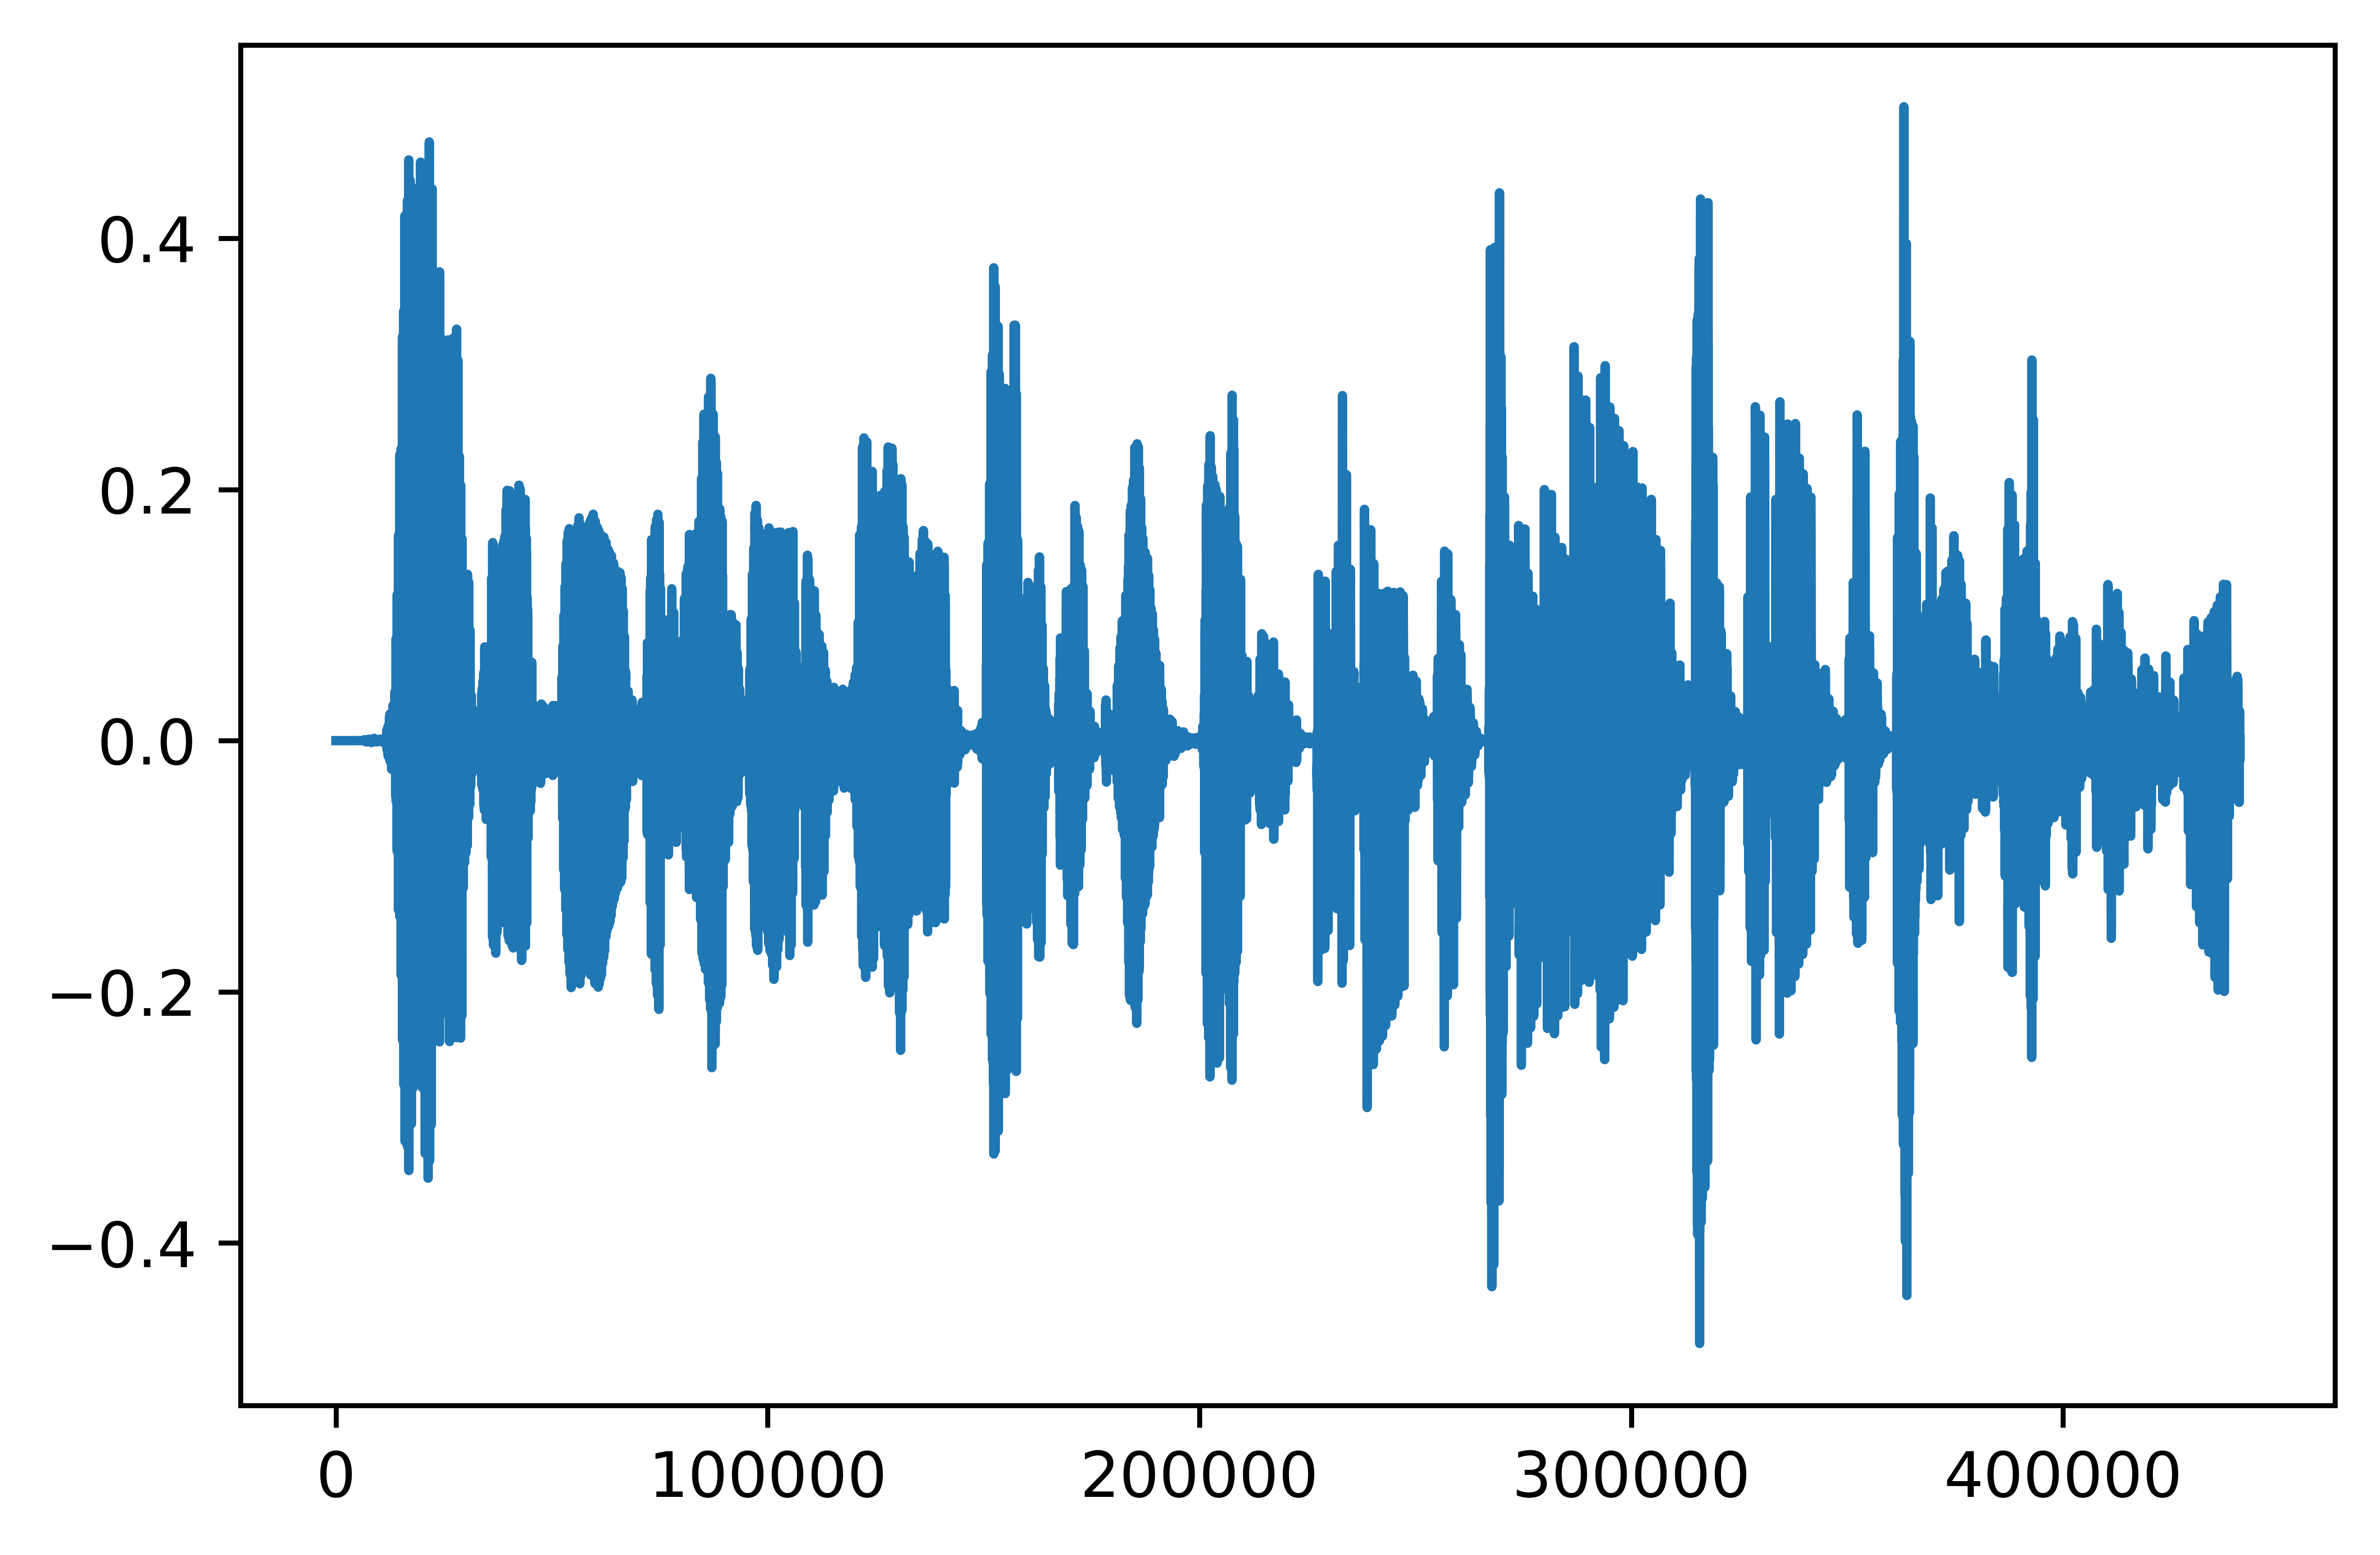

In [9]:
plt.figure(dpi=1000)
plt.plot(data[:441000,0])
plt.show()

In [47]:
x = [x+1 for x in range(20)]
y = [np.exp((x-20)/10) for x in x]

In [41]:
import matplotlib.pyplot as plt
import numpy as np

In [82]:
epochs = 20

In [83]:
x = [x for x in range(epochs)]
y = [np.exp((epoch - epochs + 1) / (epochs/4)) for epoch in x]

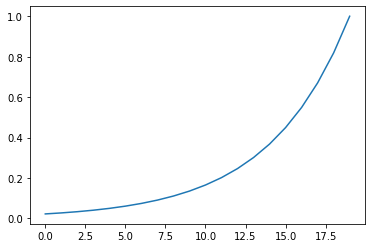

In [84]:
plt.plot(x, y)

In [100]:
epochs = 20

In [101]:
epoch_list = [x for x in range(epochs)]

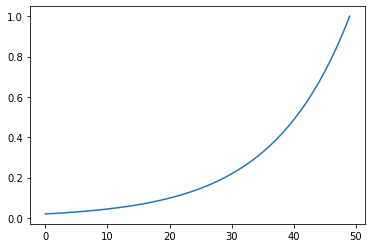

In [97]:
plt.plot(epoch_list, [np.exp((epoch - epochs + 1) / (epochs / 4)) for epoch in epoch_list])

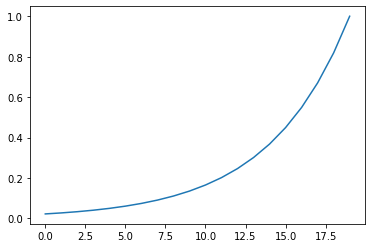

In [102]:
plt.plot(epoch_list, [np.exp((epoch - epochs + 1) / (epochs / 4)) for epoch in epoch_list])

In [85]:
y

[0.0223707718561656,
 0.02732372244729256,
 0.03337326996032608,
 0.04076220397836621,
 0.049787068367863944,
 0.06081006262521797,
 0.07427357821433388,
 0.09071795328941251,
 0.11080315836233387,
 0.1353352832366127,
 0.16529888822158653,
 0.20189651799465538,
 0.2465969639416065,
 0.30119421191220214,
 0.36787944117144233,
 0.44932896411722156,
 0.5488116360940264,
 0.6703200460356393,
 0.8187307530779818,
 1.0]

In [43]:
x = [x+1 for x in range(20)]
y = [np.exp((x-20)/5) for x in x]

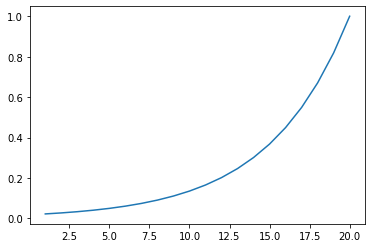

In [44]:
plt.plot(x, y)

In [3]:
import tensorflow as tf
test = tf.keras.models.load_model('/home/euiseokjeong/Desktop/IMLAB/2022_ABAW_imlab/NAS/2022/result/2022_3_20_15_41_54/weight/epoch(7)model_gen_1')

2022-03-20 15:45:58.701681: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


2022-03-20 15:45:58.718740: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 15:45:58.718845: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 15:45:58.719378: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-20 15:45:58.719919: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so retur

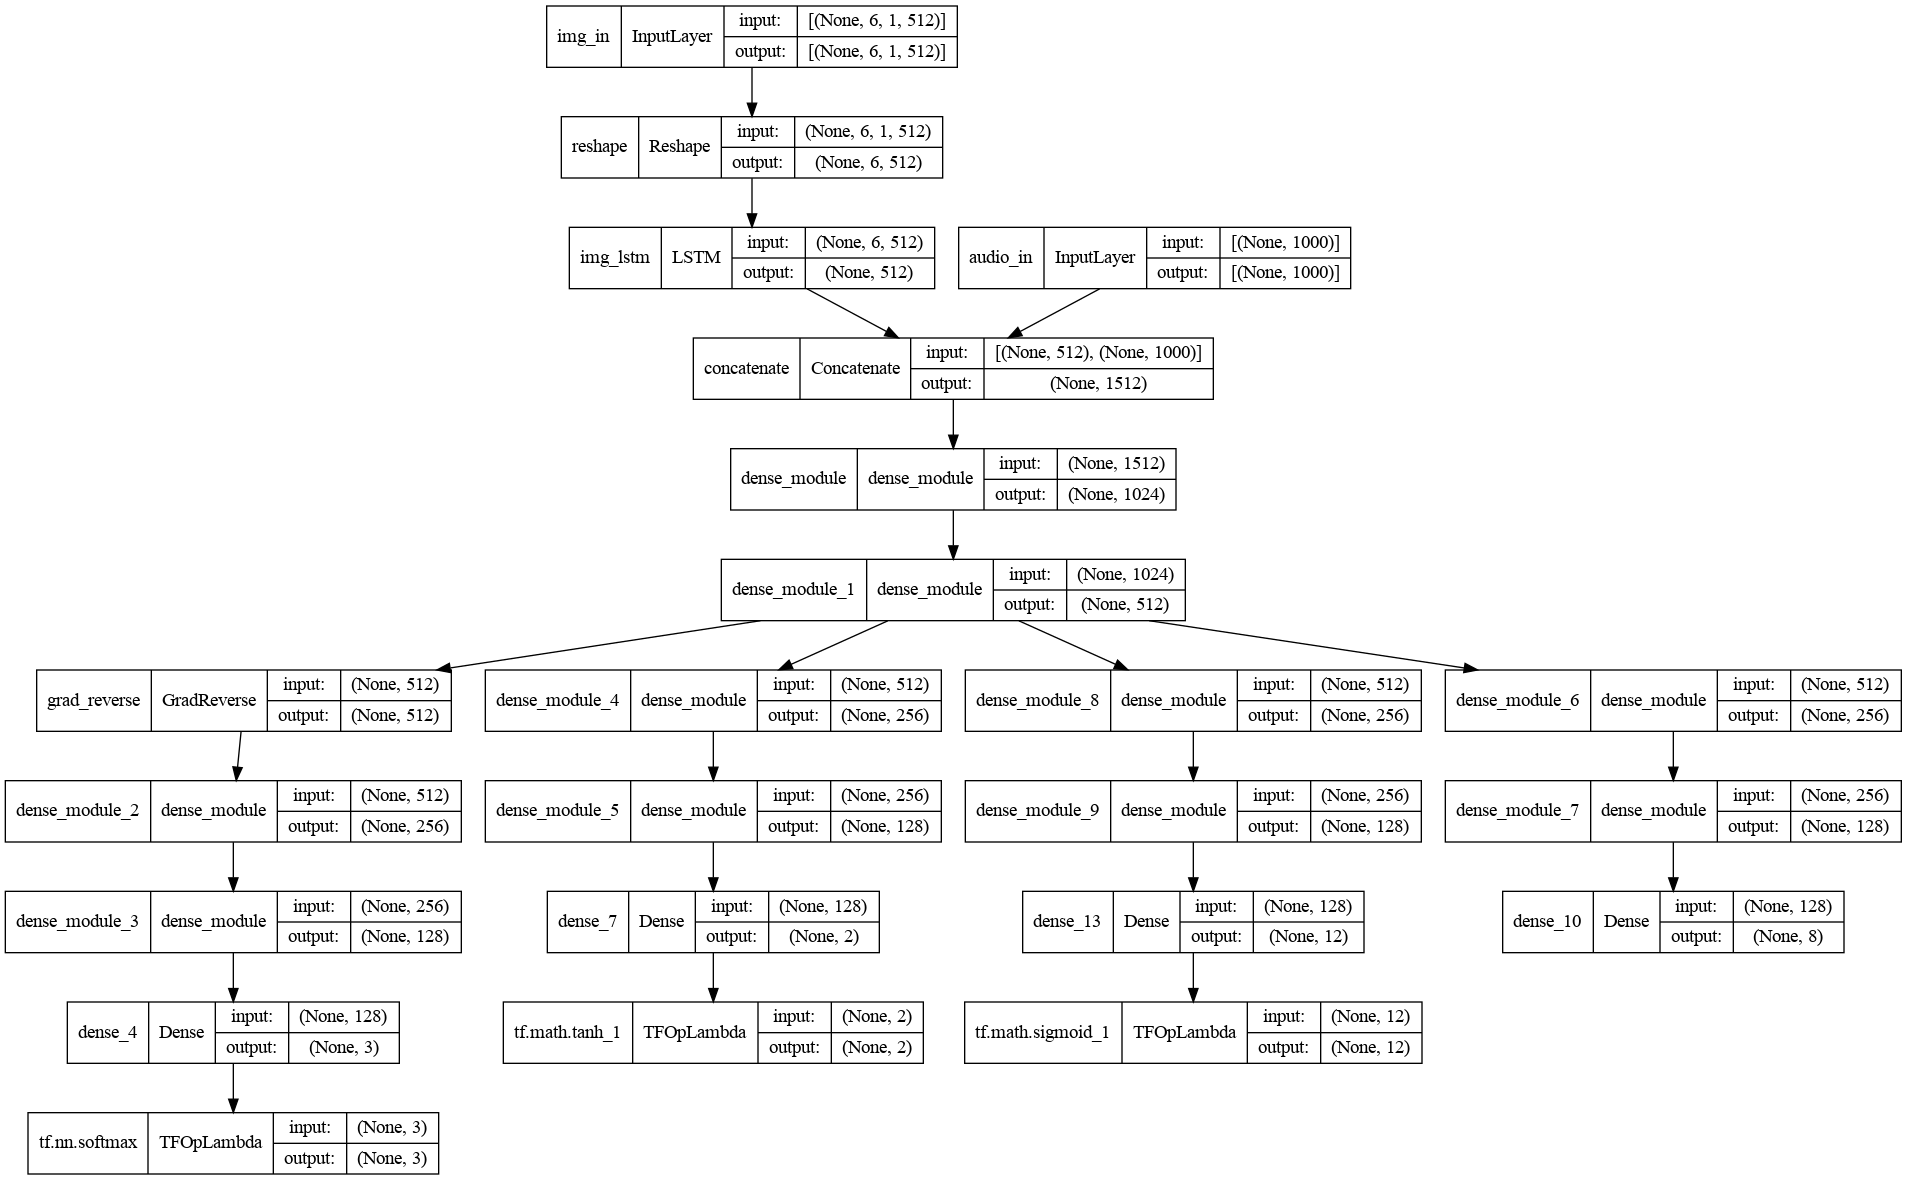

In [6]:
tf.keras.utils.plot_model(test, show_shapes=True)

# get % of feaure/frame_num

In [2]:
import numpy as np
import cv2
import os
import gzip
import pickle
import pandas as pd

In [3]:
data_path = '/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022'
vid_path = os.path.join(data_path, 'video')

In [26]:
img_feature_path = os.path.join(data_path, 'features', 'image_t(2)_s(10)')
img_feature_list = os.listdir(img_feature_path)

aud_feature_path = os.path.join(data_path, 'features','audio')


In [5]:
with gzip.open('/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/idx/idx_train_vid(2)_str(10).pickle','rb') as f:
    train_idx = pickle.load(f)
with gzip.open('/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/idx/idx_valid_vid(2)_str(10).pickle','rb') as f:
    valid_idx = pickle.load(f)

In [29]:
result_df = pd.DataFrame(columns=['video', '%', 'frame','feature'])
for img_name in img_feature_list:
    cnt = 0
    vid_name = img_name.replace('_right','').replace('_left','')
    tmp_vid_path = os.path.join(vid_path, vid_name +'.mp4') if os.path.isfile(os.path.join(vid_path, vid_name +'.mp4')) else os.path.join(vid_path, vid_name +'.avi')
    cap = cv2.VideoCapture(tmp_vid_path)
    frame_num = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#     print(img_name, frame_num)
    tmp_img_feature_path = os.path.join(img_feature_path, img_name)
    tmp_aud_feature_path = os.path.join(aud_feature_path, vid_name)
    for idx in range(frame_num):
        if not os.path.isfile(os.path.join(tmp_img_feature_path, f"{idx}.npy")):
            continue
        if not os.path.isfile(os.path.join(tmp_aud_feature_path, f"{idx}.npy")):
            continue
        cnt += 1
        
    
    # get img_feature num
    
#     img_num = len([x for x in os.listdir(tmp_img_feature_path) if 'npy' in x.split('.')])
    
#     tmp_img_feature_path = os.path.join(img_feature_path, img_name)
#     img_num = len([x for x in os.listdir(tmp_img_feature_path) if 'npy' in x.split('.')])
    
    
#     if not os.path.isdir(tmp_aud_feature_path):
#         aud_num = 0
#     else:
#         aud_num = len([x for x in os.listdir(tmp_aud_feature_path) if 'npy' in x.split('.')])
    # get audio_feature num
#     print(img_num)
#     print(img_name, frame_num, cnt)
    print(f"percentage: {cnt/frame_num*100:.1f}%({cnt}/{frame_num}), video: {img_name}")
    tmp_result_df = pd.DataFrame([[img_name, cnt/frame_num*100, frame_num, cnt]], columns=['video', '%', 'frame','feature'])
    result_df = pd.concat([result_df, tmp_result_df])

percentage: 94.8%(4336/4576), video: 119
percentage: 96.1%(7478/7785), video: video44
percentage: 79.7%(4452/5583), video: 138
percentage: 90.4%(4517/4995), video: 86-24-1920x1080
percentage: 87.4%(2222/2542), video: video48
percentage: 91.4%(5414/5925), video: 204
percentage: 71.1%(738/1038), video: video45_4
percentage: 93.3%(7404/7934), video: 162
percentage: 94.3%(4965/5265), video: 423
percentage: 0.0%(0/294), video: video45_3
percentage: 0.0%(0/6121), video: video49_right
percentage: 89.7%(2613/2913), video: 66-25-1080x1920
percentage: 97.3%(10720/11020), video: video26
percentage: 0.0%(0/73), video: 107-30-640x480
percentage: 91.4%(3180/3480), video: 378
percentage: 90.6%(4894/5402), video: 82-25-854x480
percentage: 89.1%(1820/2042), video: 372
percentage: 88.8%(4577/5153), video: 101-30-1080x1920
percentage: 98.0%(14738/15041), video: 120-30-1280x720
percentage: 81.4%(3930/4830), video: 18-24-1920x1080
percentage: 84.0%(2986/3555), video: 321
percentage: 83.7%(1759/2101), video

percentage: 76.5%(1118/1462), video: 225
percentage: 97.0%(11698/12065), video: 122-60-1920x1080-5
percentage: 92.9%(3570/3841), video: 267
percentage: 93.5%(4319/4619), video: 273
percentage: 90.7%(1963/2165), video: 403
percentage: 93.9%(5390/5743), video: 25-25-600x480
percentage: 90.7%(3996/4404), video: 187
percentage: 92.9%(4564/4912), video: 362
percentage: 78.4%(1935/2468), video: video5_right
percentage: 93.0%(7312/7862), video: 122-60-1920x1080-1
percentage: 24.2%(96/396), video: 28-30-1280x720-2
percentage: 69.7%(474/680), video: 371
percentage: 84.8%(6890/8123), video: 127
percentage: 84.4%(2004/2375), video: 380
percentage: 92.1%(3760/4081), video: 117-25-1920x1080
percentage: 95.3%(6114/6415), video: 176
percentage: 93.8%(4459/4753), video: 262
percentage: 91.6%(3267/3567), video: video35
percentage: 75.7%(5310/7010), video: 242
percentage: 93.2%(4158/4459), video: 32-60-1920x1080
percentage: 84.3%(1612/1912), video: 24-30-1920x1080-1
percentage: 85.5%(5263/6153), video: 

percentage: 88.4%(2115/2393), video: 259
percentage: 47.8%(220/460), video: 133
percentage: 92.6%(3752/4052), video: 185
percentage: 89.7%(2425/2704), video: 373
percentage: 94.2%(4968/5274), video: 20-24-1920x1080
percentage: 94.4%(4313/4568), video: 330
percentage: 92.4%(3815/4127), video: 122
percentage: 90.4%(2867/3172), video: video46
percentage: 87.3%(2939/3366), video: 97-29-1920x1080
percentage: 89.5%(2556/2856), video: 353
percentage: 92.1%(3490/3790), video: 184
percentage: 94.6%(7611/8046), video: video96
percentage: 91.8%(2684/2924), video: 347
percentage: 96.3%(7863/8163), video: 92-24-1920x1080
percentage: 95.8%(7267/7585), video: video14
percentage: 96.1%(7457/7757), video: 34-25-1920x1080
percentage: 88.8%(3442/3875), video: 134-30-1280x720
percentage: 56.5%(473/837), video: 160
percentage: 96.7%(11476/11868), video: video70
percentage: 93.1%(4065/4365), video: 125
percentage: 66.5%(1373/2064), video: video2
percentage: 91.7%(4209/4590), video: 39-25-424x240
percentage:

percentage: 94.0%(4623/4916), video: 393
percentage: 94.4%(4374/4632), video: 339
percentage: 92.0%(2770/3012), video: 238
percentage: 90.1%(3578/3970), video: 230
percentage: 0.0%(0/179), video: video45_7
percentage: 79.2%(2140/2702), video: video83
percentage: 94.7%(4335/4578), video: 305
percentage: 62.4%(512/820), video: video47
percentage: 92.9%(4093/4405), video: 141
percentage: 92.9%(3100/3336), video: 256
percentage: 88.1%(2217/2517), video: 116


In [31]:
result_df.to_csv('./frame_feature_num.csv')

In [9]:
pd.DataFrame([['12212', 212]])

0    1
0  12212  212

In [15]:
result_df = pd.DataFrame([['21323', 2/100*100, 3, 7]], columns=['video', '%', 'frame','feature'])

In [10]:
result_df = pd.DataFrame(columns=['video', '%', 'frame','feature'])

In [23]:
result_df = pd.concat([result_df, result_df])

In [24]:
result_df

video    %  frame  feature
0  21323  2.0      3        7
0  21323  2.0      3        7
0  21323  2.0      3        7
0  21323  2.0      3        7

In [3]:
video_path = os.path.join(data_path, 'video')
video_list = os.listdir(video_path)

In [4]:
video_list

['232.mp4',
 'video87.mp4',
 '157.avi',
 '250.mp4',
 '276.mp4',
 '76-30-640x280.mp4',
 'video45_5.mp4',
 '403.mp4',
 '155.avi',
 'video73.mp4',
 '122.avi',
 '322.mp4',
 '204.mp4',
 '4-30-1920x1080.mp4',
 'video22.mp4',
 '120.avi',
 '286.mp4',
 'video45_1.mp4',
 '270.mp4',
 'video41.mp4',
 '72-30-1280x720.mp4',
 'video13.mp4',
 '408.mp4',
 '57-25-426x240.mp4',
 '287.mp4',
 'video36.mp4',
 '267.mp4',
 '303.mp4',
 '376.mp4',
 '312.mp4',
 'video14.mp4',
 '269.mp4',
 '412.mp4',
 '247.mp4',
 '406.mp4',
 '129.avi',
 'video10_1.mp4',
 '244.mp4',
 '69-25-854x480.mp4',
 '224.mp4',
 '433.mp4',
 '136.avi',
 '107.avi',
 '140.avi',
 '383.mp4',
 '194.avi',
 'video53.mp4',
 'video59.mp4',
 '166.avi',
 '11-24-1920x1080.mp4',
 '314.mp4',
 '28-30-1280x720-3.mp4',
 '275.mp4',
 'video86_3.mp4',
 'video66.mp4',
 '141.avi',
 '34-25-1920x1080.mp4',
 'video57.mp4',
 '32-60-1920x1080.mp4',
 '373.mp4',
 '409.mp4',
 '108.avi',
 '158.avi',
 '450.mp4',
 '126-30-1080x1920.mp4',
 '14-30-1920x1080.mp4',
 '209.mp4',
 '

In [5]:
test = 1

In [8]:
x = 1 if test == 1

SyntaxError: invalid syntax (3770833543.py, line 1)

In [7]:
x

1

In [6]:
test_path = '/home/euiseokjeong/Desktop/munus_test'

In [34]:
def minus_name(path, extension, minus_num = -1):
    file_list = os.listdir(path)
    file_list = [int(x.replace(f'.{extension}','')) for x in file_list if extension in x.split('.')]
    file_list.sort()
    for file in file_list:
#         file_name = int(file.split('.')[0])
        source = os.path.join(path, f'{file}.{extension}')
        dest = os.path.join(path, f'{file+minus_num}.{extension}')
        os.rename(source, dest)
minus_name(test_path, 'npy')

In [37]:
from glob import glob
cropped_aligned_path = '/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned'
dir_list = glob(os.path.join(cropped_aligned_path, '*'))
for i, dir in enumerate(dir_list):
    print(i, dir)
    minus_name(dir, 'jpg')

/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/119
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video44
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/138
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/86-24-1920x1080
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video48
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/204
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video45_4
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/162
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/423
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video45_3
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video49_right
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/66-25-1080x1920
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video26
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_al

In [24]:
import numpy as np
_8033 = np.load('/home/euiseokjeong/Desktop/munus_test/8033.npy')
_8034 = np.load('/home/euiseokjeong/Desktop/munus_test/8034.npy')

In [30]:
_8033_ = np.load('/home/euiseokjeong/Desktop/munus_test/8033.npy')

In [31]:
_8033_ == _8034

array([[[ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True]]])

In [1]:
import cv2
import tensorflow as tf
import numpy as np
from utils import get_metric, get_loss, update_dict, check_dir, save_pickle, check_and_limit_gpu, check_weight
from models import get_model
import time
from dataloader import dataloader
# from config import configs
import os
import shutil
import warnings
from silence_tensorflow import silence_tensorflow
import sys

In [2]:
from config import configs

In [17]:
configs['classifier_layers'] = [256,128]
configs['feature_extractor_layers'] = [1024,512]

In [18]:
model = get_model(configs)
tmp= model(np.zeros((1,6,1,512)), np.zeros((1,1000)))
model.load_weights('/home/euiseokjeong/Desktop/IMLAB/ABAW/result/keep/teacher_test/2022_2_25_20_22_44/weight/best_weight_gen_0.h5')

In [19]:
from dataloader import dataloader
from trainer import Trainer
trainer = Trainer(configs)
silence_tensorflow()
warnings.filterwarnings(action='ignore')
trainer.valid(trainer.valid_dataloader, model, 1)

[INFO] Load existing idx pickle file in /home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/idx/idx_train_vid(2)_str(10).pickle
[INFO] Load existing idx pickle file in /home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/idx/idx_valid_vid(2)_str(10).pickle

       (01466/03203) Validation gen_0 model || valid_metric(VA/EXPR/AU): 0.11/0.50/0.18 time: 258.54sec     (00601/03203) Validation gen_0 model || valid_metric(VA/EXPR/AU): 0.10/0.66/0.20 time: 98.56sec      (01250/03203) Validation gen_0 model || valid_metric(VA/EXPR/AU): 0.11/0.52/0.20 time: 216.16sec

KeyboardInterrupt: 

In [5]:
img_input = tf.keras.Input(shape=(6, 1, 512))
audio_input = tf.keras.Input(shape=(1000))
tmp_model =  tf.keras.Model(inputs=[img_input, audio_input], outputs=model.call(img_input, audio_input))


In [6]:
tmp_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 1, 512)]  0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 feature_extractor_1 (feature_e  (None, 256)         5697024     ['input_1[0][0]',                
 xtractor)                                                        'input_2[0][0]']                
                                                                                                  
 classifier_3 (classifier)      (None, 2)            50690       ['feature_extractor_1[0][0]

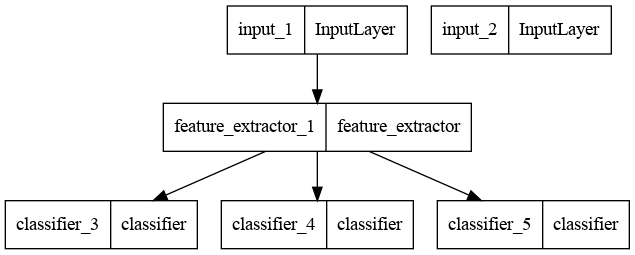

In [7]:
tf.keras.utils.plot_model(tmp_model)

In [8]:
tmp_model.save(os.path.join(os.getcwd(), 'tmp_model.h5'))

NotImplementedError: 